In [27]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from time import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pylab as pl
import seaborn as sn
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

In [12]:
%cd C:\Users\Lenovo\Desktop\analytics

C:\Users\Lenovo\Desktop\analytics


In [108]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
print(train.shape, test.shape)

(200000, 201) (200000, 200)


In [6]:
train.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
ID_code                                                                      
train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

           var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
ID_code                                                                       
train_0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
train_1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
train_2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
train_3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
train_4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

          var_15   var_16   var_17   var_18   var_19   var_20   var_21  \
ID_code                                                                  
train_0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   
train_1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   
train_2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   
train_3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   
train_4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608   

          var_22  var_23   var_24   var_25   var_26  var_27  var_28  var_29  \
ID_code                                                                       
train_0   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965   
train_1   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481   
train_2   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439   
train_3   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407   
train_4  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352   

          var_30   var_31  var_32   var_33   var_34   var_35  var_36  var_37  \
ID_code                                                                        
train_0  -0.3085  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   
train_1  -9.2987   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434   
train_2 -11.1025  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346   
train_3 -15.2398  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   
train_4  -3.1582   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184   

          var_38  var_39   var_40   var_41   var_42   var_43   var_44  \
ID_code                                                                 
train_0   4.6667  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418   
train_1  10.8160  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444   
train_2  10.8917  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006   
train_3   9.1738  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485   
train_4  19.3038  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087   

          var_45   var_46   var_47   var_48   var_49   var_50   var_51  \
ID_code                                                                  
train_0  -7.0170   5.9226 -14.2136  16.0283   5.3253  12.9194  29.0460   
train_1 -47.3797   7.3718   0.1948  34.4014  25.7037  11.8343  13.2256   
train_2  -7.9078  11.1405  -5.7864  20.7477   6.8874  12.9143  19.5856   
train_3 -24.6840  12.7404 -35.1659   0.7613   8.3838  12.6832   9.5503   
train_4 -65.4863  13.8657   0.0444  -0.1346  14.4268  13.3273  10.4857   

         var_52  var_53  var_54   var_55   var_56  var_57  var_58   var_59  \
ID_code                                                                      
train_0 -0.6940  5.1736 -0.7474  14.8322  11.2668  5.3822  2.0183  10.1166   
train_1 -

## Test the difference between the number of unique values in the columns of the two datasets

In [7]:
train_bar = train.nunique()[1:]
test_bar = test.nunique()

### Unstacked bar plots for the paired varaibles in training and test datasets

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 16.79it/s]


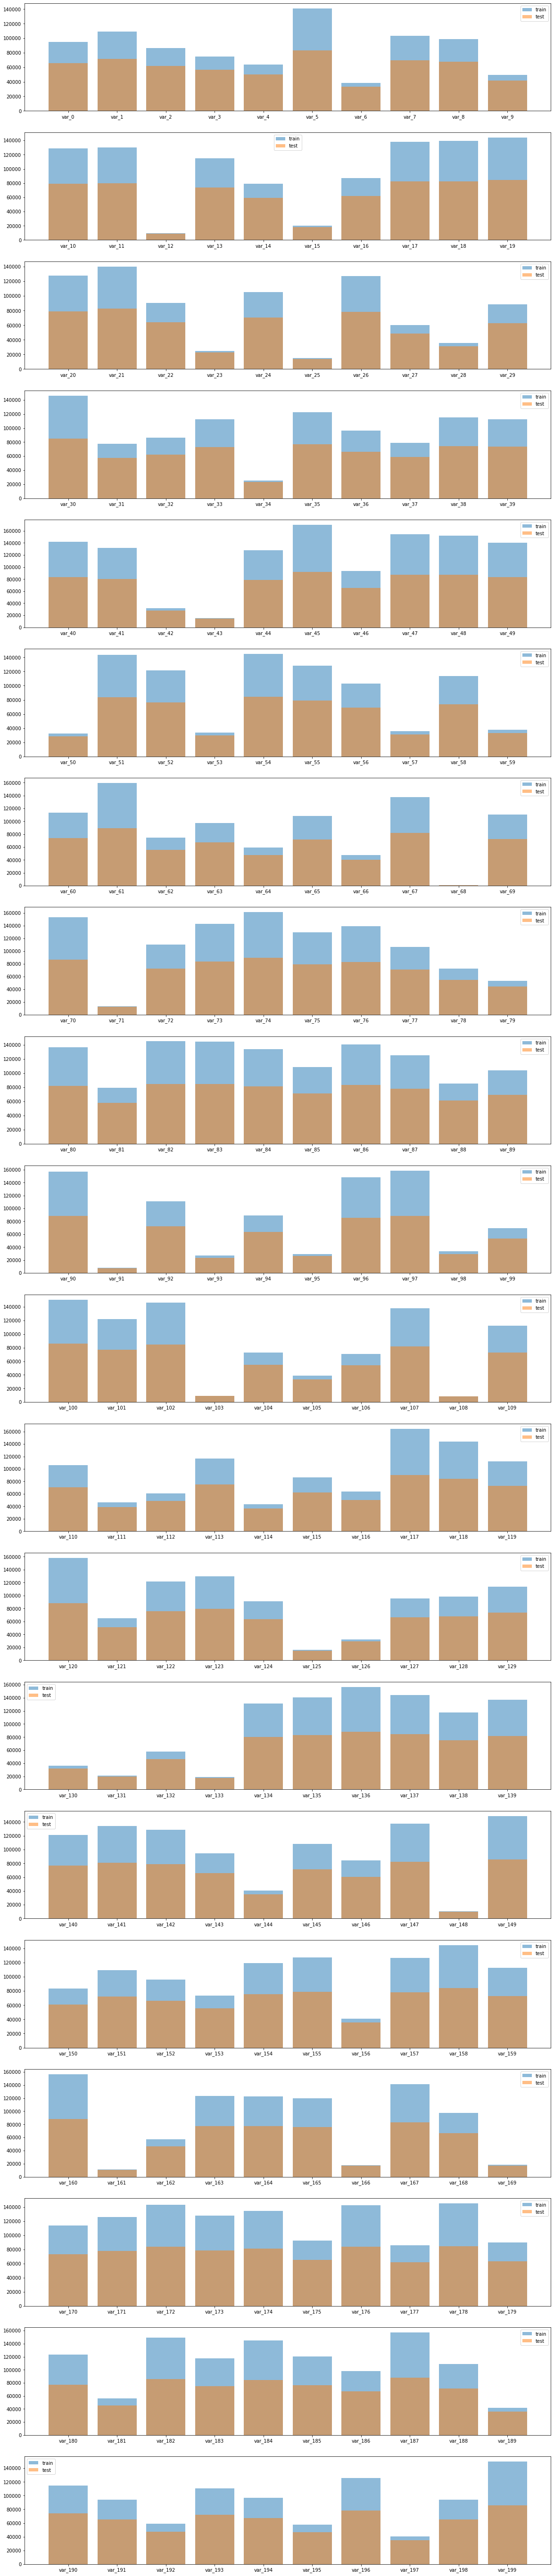

In [8]:
increment = 10
num_col = 0
plt.figure(figsize=(20, 100))
for i in tqdm(range(20)):
    plt.subplot(20, 1, i+1)
    p1 = plt.bar(x = train.columns.values[num_col+1: num_col+increment+1], height = train_bar[num_col: num_col+increment], alpha=0.5)
    p2 = plt.bar(x = train.columns.values[num_col+1: num_col+increment+1], height = test_bar[num_col: num_col+increment], alpha=0.5)
    plt.xticks(train.columns.values[num_col+1: num_col+increment+1])
    plt.legend([p1[0], p2[0]], ['train', 'test'])
    
    num_col += increment   
plt.show()

### Area plot for the unique values in the variables of the two datasets

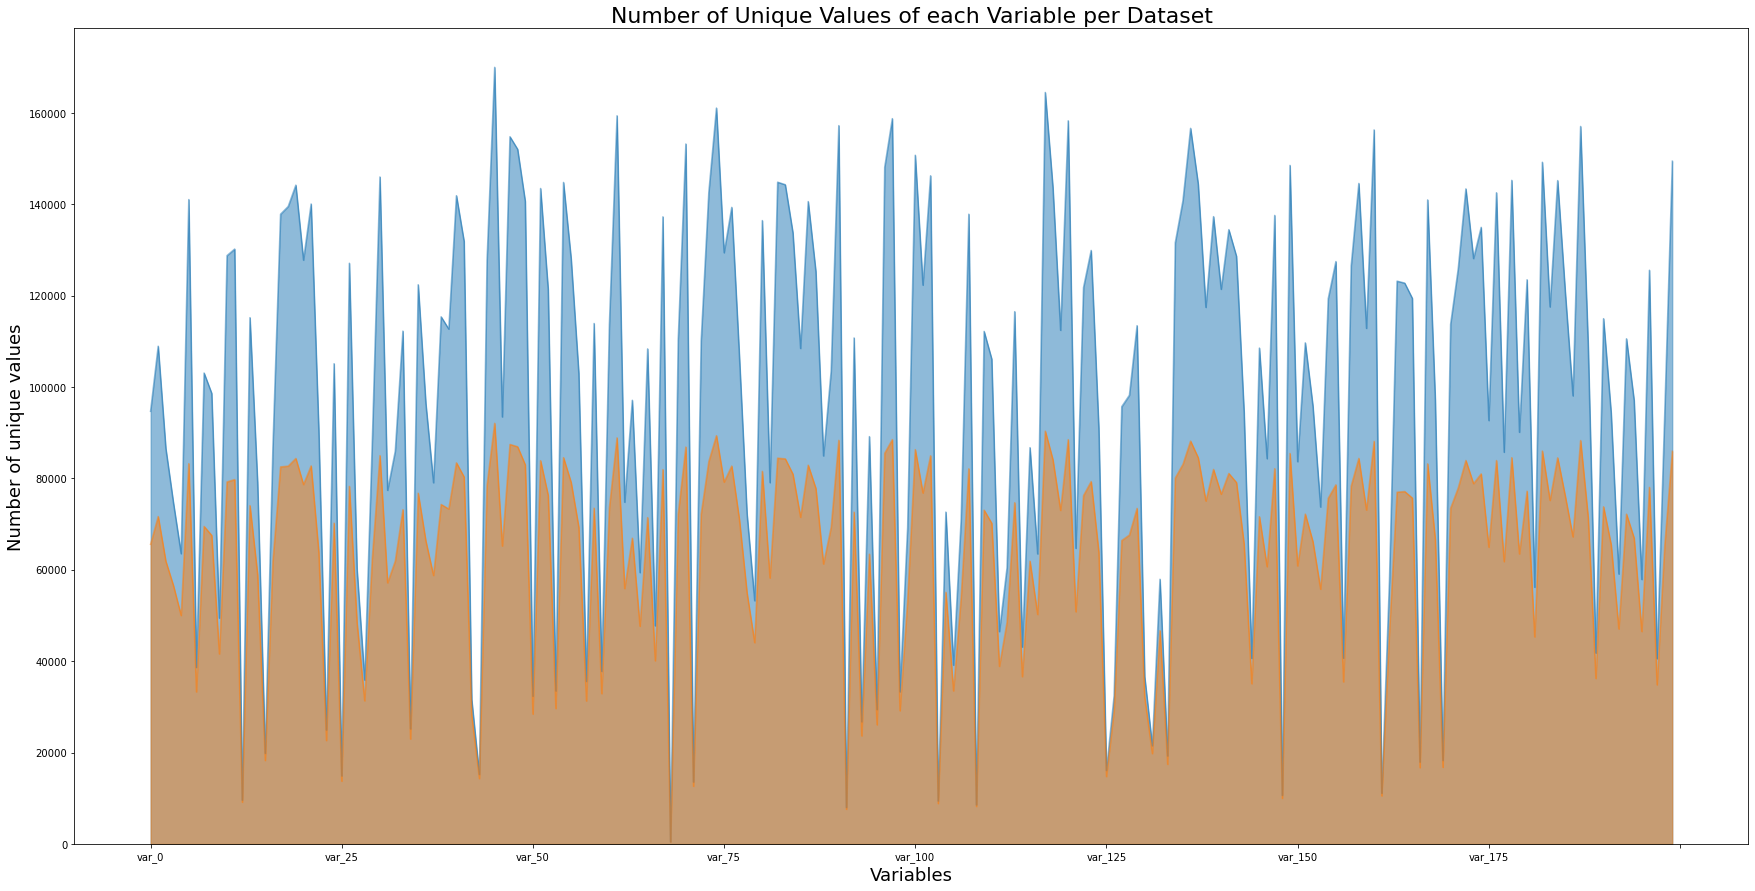

In [9]:
train_bar.plot(kind='area', figsize=(30,15), stacked=False, alpha=0.5)
test_bar.plot(kind='area', figsize=(30,15), stacked=False, alpha=0.5)
plt.title('Number of Unique Values of each Variable per Dataset', fontsize=22)
plt.xlabel('Variables', fontsize=18)
plt.ylabel('Number of unique values', fontsize=18)
plt.show()

### Histograms, probability plots and normality tests

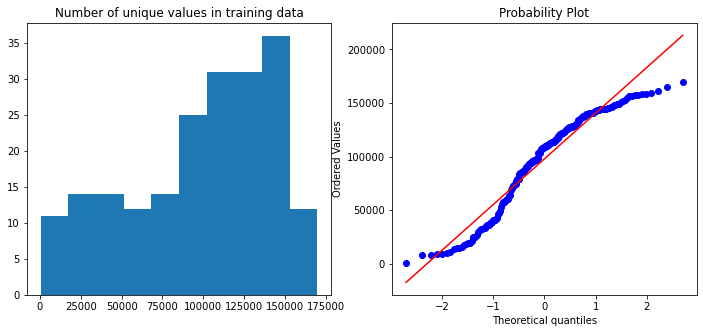

p-values are:
 
Omnibus               6.65615e-06
Shapiro-Wilk          9.73631e-08
Lilliefors                  0.001
Kolmogorov-Smirnov     0.00957474
dtype: object


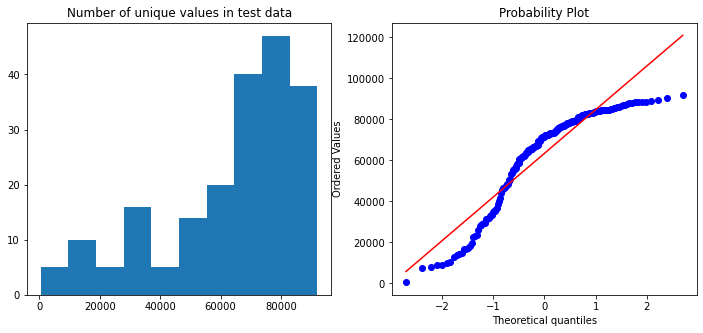

p-values are:
 
Omnibus                1.1044e-06
Shapiro-Wilk          5.93394e-12
Lilliefors                  0.001
Kolmogorov-Smirnov     8.8728e-05
dtype: object


In [10]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

# training data 
# histogram and probability plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(train_bar)
plt.title('Number of unique values in training data')
plt.subplot(1, 2, 2)
_ = stats.probplot(train_bar, plot=plt)
plt.show()

# p-values for normality tests
pVals = pd.Series('float64')

_, pVals['Omnibus']    = stats.normaltest(train_bar)


# Shapiro-Wilk test
_, pVals['Shapiro-Wilk']    = stats.shapiro(train_bar)


# Or you can check for normality with Lilliefors-test
_, pVals['Lilliefors']    = lilliefors(train_bar)


# Alternatively with original Kolmogorov-Smirnov test
_, pVals['Kolmogorov-Smirnov']    = stats.kstest((train_bar-np.mean(train_bar))/np.std(train_bar,ddof=1), 'norm')


print('p-values are:\n ')
print(pVals[1:])

#-------------------------------------------------------------------------------------------------------
# test data 
# histogram and probability plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(test_bar)
plt.title('Number of unique values in test data')
plt.subplot(1, 2, 2)
_ = stats.probplot(test_bar, plot=plt)

plt.show()


# p-values for normality tests
pVals = pd.Series('float64')

_, pVals['Omnibus']    = stats.normaltest(test_bar)


# Shapiro-Wilk test
_, pVals['Shapiro-Wilk']    = stats.shapiro(test_bar)


# Or you can check for normality with Lilliefors-test
_, pVals['Lilliefors']    = lilliefors(test_bar)


# Alternatively with original Kolmogorov-Smirnov test
_, pVals['Kolmogorov-Smirnov']    = stats.kstest((test_bar-np.mean(test_bar))/np.std(test_bar,ddof=1), 'norm')


print('p-values are:\n ')
print(pVals[1:])

#### Conclusion:
As the two data groups are not normally distributed, we use the Wilcoxon signed-rank test to assess if the population mean ranks significantly differ from one another.

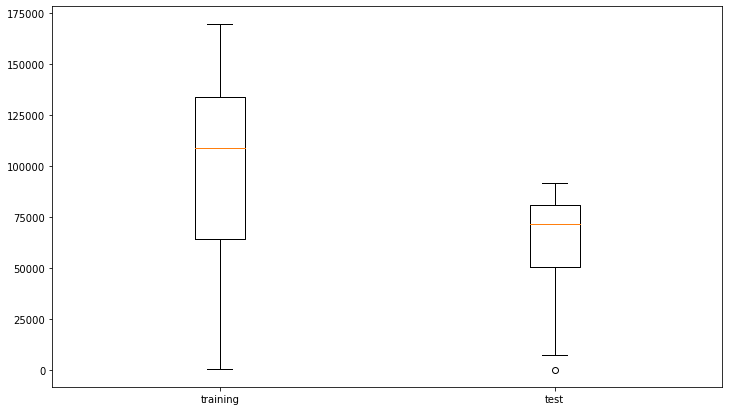

--------------------------------------------------------------------------------------------------
p-value of the Wilcoxon-Signed-Rank-Sum test is:  1.4361464127613523e-34


In [11]:
# boxpltos and Wilcoxon signed-rank test

plt.figure(figsize=(12, 7))
plt.boxplot([train_bar, test_bar])
plt.xticks([1, 2], ['training', 'test'])
plt.show()
print('--------------------------------------------------------------------------------------------------')
rankSum, p_value = stats.wilcoxon(train_bar - test_bar)
print("p-value of the Wilcoxon-Signed-Rank-Sum test is: ", p_value)

#### Conclusion:
As the p-value is much smaller than 0.05, then we infer that there is a significant difference between the ranks of the means of the two groups. And hence, the number of unique values in the variables of the training and test datasets also differ significantly. <br><br>
From this, we can say that many of the samples in the test data are synthetic (fake) and not real. They might have been randomly sampled out from the training data. So, we need first to detect these data entries to remove them before building and testing our model.

## Remove fake data  from the test dataset

In [12]:
te_ = pd.read_csv('test.csv').drop(['ID_code'], axis=1).values

unique_samples = []
unique_count = np.zeros_like(te_)

In [13]:
for feature in tqdm(range(te_.shape[1])):
    _, index_, count_ = np.unique(te_[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 29.82it/s]


In [14]:
# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

In [28]:
# read training and test data again removing the fake test data
 
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")#.drop(synthetic_samples_indexes)

In [29]:
X_train = train.iloc[:, 2:]
y_train = train.iloc[:, 1]
target= train.iloc[:, 1]

X_test = test.iloc[:, 1:]

X = pd.concat([X_train, X_test], axis=0)
print(X.shape)
X.head()

(400000, 200)


var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  var_10   var_11   var_12   var_13  var_14   var_15   var_16  \
0  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989  14.5691   5.7487   
1  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345  13.7003  13.8275   
2  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244  14.6472   7.6782   
3  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569  14.8372  10.7430   
4  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894  15.0553   8.4871   

    var_17   var_18   var_19   var_20   var_21   var_22  var_23   var_24  \
0  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791  2.4716  14.3831   
1 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524  3.3716   6.9779   
2  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145  3.5137   5.6777   
3  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202  2.7229  12.1354   
4  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102  2.7142  14.2080   

    var_25   var_26  var_27  var_28  var_29   var_30   var_31  var_32  \
0  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085  12.9041 -3.8766   
1  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   7.8755  1.2859   
2  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025  12.4858 -2.2871   
3  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398  10.4407 -2.5731   
4  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   9.4668 -0.0083   

    var_33   var_34   var_35  var_36  var_37   var_38  var_39   var_40  \
0  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667  3.8743  -5.2387   
1  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160  3.6783 -11.1147   
2  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917  0.9003 -13.5174   
3   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738  0.6665  -3.8294   
4  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038  1.4450  -5.5963   

    var_41   var_42   var_43   var_44   var_45   var_46   var_47   var_48  \
0   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226 -14.2136  16.0283   
1   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   0.1948  34.4014   
2   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405  -5.7864  20.7477   
3  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404 -35.1659   0.7613   
4  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   0.0444  -0.1346   

    var_49   var_50   var_51  var_52  var_53  var_54   var_55   var_56  \
0   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474  14.8322  11.2668   
1  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946  18.5995  19.3219   
2   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   6.2846  15.6372   
3   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913  12.3972  14.4698   
4  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414  14.1482  16.9840   

   var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  var_65  \
0  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771 -0.2154  8.6748  9.5319   
1  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944 -1.3147  8.1042  1.5365   
2  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748  5.8042  3.7163 -1.1016   
3  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418 -4.3923  8.6464  6.3072   
4  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952 -1.7839  5.2670 -4.3205   

   var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73   var_74  \
0  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663  5.1999   8.8600  43.1127   
1  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134  3.1701  20.1068   7.7841   
2  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520  6.3577  12.1719  19.7312   
3  5.6221  23.6143 

In [17]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Data preprocessing

### Handling missing values

In [18]:
X.isnull().sum().sum()

0

#### Conclusion:
There are no null values.

### Outlier detection

In [30]:
columns = X.columns.values

200it [00:09, 20.48it/s]


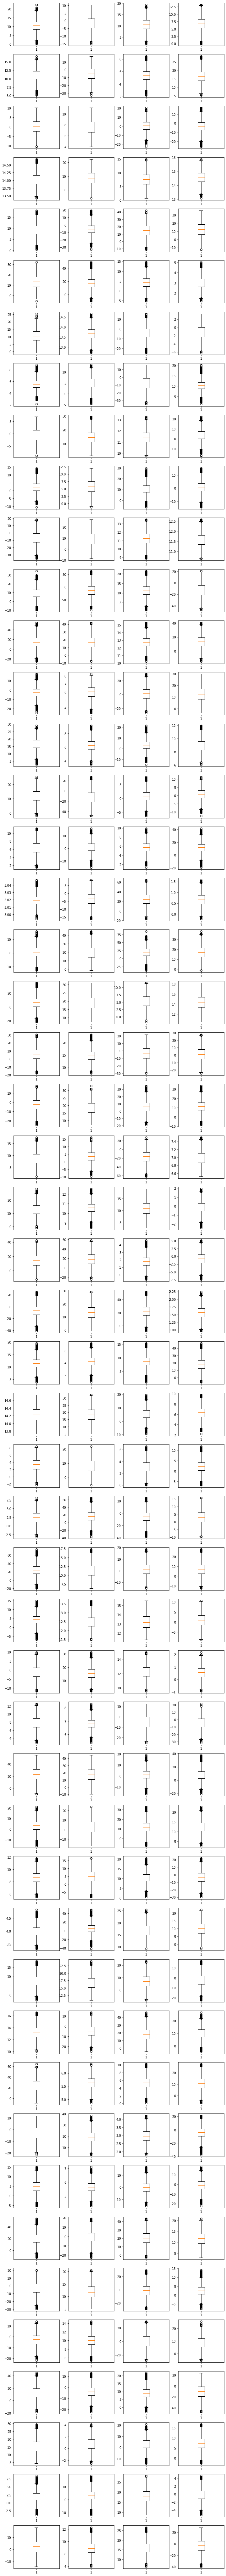

In [20]:
# boxplots for outlier detection



plt.figure(figsize=(12, (len(columns)/4)*3))
for i, column in tqdm(enumerate(columns)):
    plt.subplot(50, 4, i+1)
    plt.boxplot(X[column])
    
plt.show()

#### Conclusion:
We can conclude from the boxplots that there are almost no outliers, and whenever they exist, they are so close to the whisker edges. So, there is no need to remove them.

### Standardization

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])
X.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0 -0.573930 -1.275655  0.453774 -0.829761  0.236655 -0.537163 -0.338885   
1  0.273590 -0.623288  1.193406 -0.685231  0.793204  1.538372  0.241141   
2 -0.677998 -0.276809  0.519141  0.537312 -0.305510 -0.511776  1.768200   
3  0.128711 -0.129996 -0.666993  0.196935  0.930505  0.409577  0.497595   
4 -0.273969  0.035234  0.820234 -0.075620  0.740728  0.954270  0.610458   

      var_7     var_8     var_9    var_10    var_11    var_12    var_13  \
0  0.610620 -1.560352 -1.476589  0.461851  1.079340 -0.050612 -1.717922   
1 -0.001080  0.859932  0.418964 -0.142793  1.896726  0.003053 -0.026338   
2 -0.561777 -1.560142 -1.309985 -0.128569 -1.342262  0.892220 -0.263945   
3 -0.471313 -1.842650  0.548599  0.349384  1.017001 -0.931361  0.741208   
4  0.793242  1.795606  0.089243 -1.785491 -1.489282 -0.921891 -0.139412   

     var_14    var_15    var_16    var_17    var_18    var_19    var_20  \
0  0.561270 -0.010482 -1.402806 -0.228650 -1.397715  2.285141 -0.469311   
1 -0.932968 -2.121009  1.763925 -1.468794 -0.949769  2.017102 -1.677817   
2 -0.004776  0.179242 -0.646480  0.588612 -1.344576  1.004584  0.758683   
3 -0.478888  0.640798  0.554861  0.783217  0.087615  0.159895  1.191506   
4  0.112919  1.170617 -0.329407  0.391199 -1.112041 -0.141672  1.382587   

     var_21    var_22    var_23    var_24    var_25    var_26    var_27  \
0 -0.125044 -0.605456 -1.039062  1.008747 -0.822199 -0.190318  0.476579   
1 -1.769110  1.493395  0.667354 -0.953338  0.783788 -1.305830 -0.934811   
2  0.108982 -1.084939  0.936778 -1.297840 -1.574579 -0.669781 -1.160694   
3 -0.571630  0.884748 -0.562593  0.413195  0.243322  0.814428  0.149466   
4  0.209382  2.040762 -0.579088  0.962353 -0.434100  1.212144 -1.448968   

     var_28    var_29    var_30    var_31    var_32    var_33    var_34  \
0 -0.766378  0.362012  0.926064  1.160792 -1.297294  0.490905 -0.448076   
1 -0.618767 -1.723095 -0.202172 -1.169302  0.697285  1.064423 -0.118884   
2  0.400873  0.418422 -0.428542  0.966965 -0.683177  0.988382 -0.719816   
3  0.478248 -0.845715 -0.947758  0.019330 -0.793675 -1.986304 -1.524508   
4  0.471237  1.103954  0.568437 -0.431944  0.197259  1.053530  1.794012   

     var_35    var_36    var_37    var_38    var_39    var_40    var_41  \
0  1.298949 -0.488361  0.894228 -1.400108  0.787117  0.180007 -0.321593   
1 -0.602195  0.192043 -0.012680  0.040056  0.739003 -0.528882 -1.247599   
2  0.048769  0.800276  0.471549  0.057784  0.057070 -0.818747 -1.185170   
3 -1.888297  1.913900 -1.340092 -0.344547 -0.000322  0.350026 -1.737397   
4 -0.622871  0.189703 -0.023774  2.027895  0.190781  0.136865  0.805096   

     var_42    var_43    var_44    var_45    var_46    var_47    var_48  \
0  0.509995  1.533872  0.455614  0.264714 -1.884311 -0.165755  0.117113   
1 -1.933456  0.693229 -1.304535 -1.621062 -1.377728  1.199009  1.731144   
2  0.440396  1.520959 -0.821016  0.223095 -0.060339  0.632470  0.531700   
3  0.798027 -0.923490 -0.152686 -0.560701  0.498923 -2.150356 -1.224055   
4  0.999491 -0.188412 -0.345640 -2.467016  0.892283  1.184763 -1.302758   

     var_49    var_50    var_51    var_52    var_53    var_54    var_55  \
0 -1.444060  0.254791  1.909094  0.367414 -1.096510 -0.223684  0.365380   
1  1.146495 -1.315420 -0.022553 -0.318504  0.884857 -1.096658  1.026892   
2 -1.245482  0.247411  0.753993  0.652846  0.515239  0.971594 -1.135519   
3 -1.055256 -0.087006 -0.471302  0.866338 -1.050079  0.826506 -0.062189   
4 -0.287054  0.845049 -0.357091  0.218209 -0.335432 -1.149746  0.245275   

     var_56    var_57    var_58    var_59    var_60    var_61    var_62  \
0 -1.509251 -1.117969 -0.271058  1.390123  0.954203  1.454307  0.591192   
1  0.763114  0.927791 -0.293685 -0.071892 -0.983580  0.405037  0.451776   
2 -0.276349 -0.568365 -0.484607  0.299584  0.103745  0.135708 -0.001729   
3 -0.605676  0.391997  0.030812  0.625621  0.859162 -1.124101  1.264201   
4  0.103586 -0.114924 -

### Normality tests for the variables

In [22]:
# as number of sample > 300, use Kolmogorove-Smirnov test
pVals = pd.Series(index=['var_{}'.format(i) for i in range(200)])
for i in range(200):
    data = X.iloc[:, i]
    _, pVals[i] = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
    
pVals

var_0      4.341023e-204
var_1      1.370015e-272
var_2       0.000000e+00
var_3      7.360701e-233
var_4      8.539907e-135
var_5       0.000000e+00
var_6      1.092950e-207
var_7       0.000000e+00
var_8       0.000000e+00
var_9       0.000000e+00
var_10     1.039979e-106
var_11      1.087533e-58
var_12     1.217855e-155
var_13      0.000000e+00
var_14      0.000000e+00
var_15     4.366008e-217
var_16     4.461328e-185
var_17      7.441959e-95
var_18     8.975836e-315
var_19     1.082143e-298
var_20      0.000000e+00
var_21      5.157996e-43
var_22     6.262569e-188
var_23     4.438793e-134
var_24      0.000000e+00
var_25     2.595506e-172
var_26      2.084540e-95
var_27     6.817039e-287
var_28      3.565017e-65
var_29     8.499379e-115
var_30      0.000000e+00
var_31      1.582519e-39
var_32     2.147708e-297
var_33      0.000000e+00
var_34     5.929069e-223
var_35      2.251147e-70
var_36     7.340129e-106
var_37      0.000000e+00
var_38      1.385826e-59
var_39     3.670088e-121


#### Conclusion:
As the features are not normally distributed, we use either the Spearman or Kendall method to find the correlaions between the variables. (Kendall is more accurate, however it is computationally massive)

In [23]:
# Spearman correlation

spearman_corr = X.corr(method = 'spearman')
spearman_corr

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
var_0    1.000000  0.001308  0.003888  0.002054 -0.002086  0.001678  0.003664   
var_1    0.001308  1.000000  0.003568 -0.000943  0.000837  0.000111  0.003312   
var_2    0.003888  0.003568  1.000000 -0.002899  0.001722 -0.000310 -0.000820   
var_3    0.002054 -0.000943 -0.002899  1.000000 -0.000680  0.002327 -0.002468   
var_4   -0.002086  0.000837  0.001722 -0.000680  1.000000  0.001879 -0.001690   
var_5    0.001678  0.000111 -0.000310  0.002327  0.001879  1.000000 -0.000409   
var_6    0.003664  0.003312 -0.000820 -0.002468 -0.001690 -0.000409  1.000000   
var_7   -0.001149  0.002487 -0.000441  0.002072  0.001702  0.000752 -0.000493   
var_8    0.000566  0.002202  0.002122  0.000980  0.001621  0.000608 -0.000029   
var_9    0.000279 -0.001272 -0.000399 -0.000662 -0.000184 -0.001706 -0.003169   
var_10   0.002542  0.000669  0.001768 -0.001365 -0.002382  0.000786  0.003410   
var_11   0.003163  0.004496  0.005554  0.000250  0.000255 -0.001557  0.000566   
var_12  -0.002636 -0.003365 -0.001845  0.000371  0.001644  0.001306 -0.001969   
var_13  -0.000206 -0.001031 -0.002308 -0.005961  0.000996 -0.003482 -0.004462   
var_14  -0.000790 -0.000218 -0.001396  0.001634 -0.000790 -0.002408 -0.002049   
var_15  -0.001031  0.003699  0.001855  0.003044  0.001300  0.002988  0.000851   
var_16   0.001088 -0.001147  0.000562  0.002340  0.001694  0.000778  0.003567   
var_17  -0.002797 -0.001549  0.000045  0.000721  0.000413 -0.002119 -0.000502   
var_18   0.002384  0.000253  0.001963  0.000244  0.000128 -0.000113 -0.000110   
var_19   0.000038  0.002915 -0.001467 -0.000193 -0.000371  0.001457  0.000551   
var_20  -0.000523 -0.000398  0.002360  0.000874 -0.000374  0.001335 -0.000741   
var_21  -0.001452  0.000962 -0.001921 -0.001004 -0.000582 -0.003926 -0.004305   
var_22   0.001992  0.002913  0.000201 -0.001105 -0.001792  0.002056  0.001960   
var_23  -0.002013  0.001325  0.000503  0.000392  0.001570  0.001105 -0.003855   
var_24   0.003044  0.002037  0.000122  0.000665  0.002566  0.000750  0.001615   
var_25  -0.001107  0.001721 -0.000171 -0.001637 -0.000022 -0.001259  0.000042   
var_26   0.002363  0.004426  0.005689  0.000006  0.000682  0.000627  0.002696   
var_27  -0.001458 -0.002647  0.000570  0.000804 -0.001077  0.000277  0.001483   
var_28   0.000227 -0.002365 -0.000732 -0.001522  0.000527  0.001966  0.002908   
var_29  -0.000154  0.002690  0.002360 -0.000172 -0.000066  0.003339 -0.000802   
var_30   0.001189 -0.002722  0.001411  0.001787  0.000083 -0.000834 -0.000610   
var_31  -0.001541 -0.002965  0.000252 -0.001164  0.001123  0.001897 -0.001135   
var_32   0.000777  0.000183  0.003588  0.002144  0.000058 -0.000859  0.000104   
var_33  -0.004415  0.000471  0.000445  0.000382  0.000250 -0.002395 -0.000970   
var_34  -0.001884 -0.002706 -0.002633 -0.002004  0.001377 -0.002602 -0.001113   
var_35   0.002627  0.002287  0.005517  0.001360 -0.001904  0.000988  0.001367   
var_36  -0.000663 -0.002518 -0.000012  0.000716  0.002878 -0.002287  0.000100   
var_37  -0.000814 -0.000593 -0.001317  0.001706 -0.001519  0.001591  0.000067   
var_38   0.000237  0.000326  0.001704 -0.002731  0.001476  0.000505 -0.002725   
var_39   0.000517 -0.001510  0.000919 -0.001237 -0.002366  0.000522  0.000613   
var_40   0.003978 -0.000842  0.000696  0.003166  0.000551  0.003454  0.001091   
var_41   0.001430 -0.000316  0.000212 -0.000044  0.000788  0.003845  0.000973   
var_42   0.000446 -0.000720 -0.002149 -0.002532 -0.003148  0.001137  0.002586   
var_43   0.001172 -0.000613 -0.003330  0.000466  0.002924  0.002336 -0.002650   
var_44  -0.001103 -0.006657 -0.000219 -0.000688  0.000598  0.000166 -0.003445   
var_45  -0.000810 -0.002081 -0.000016  0.001269 -0.001667 -0.001064 -0.000217   
var_46   0.002315 -0.000966  0.000375  0.001556 -0.002326  0.002376 -0.000260   
var_47  -0.000210  0.002416  0.000841 -0.000525 -0.000071  0.002130  0.000199   
var_48  -0.000510 -0.000595 -0.000015  0.00

<AxesSubplot:>

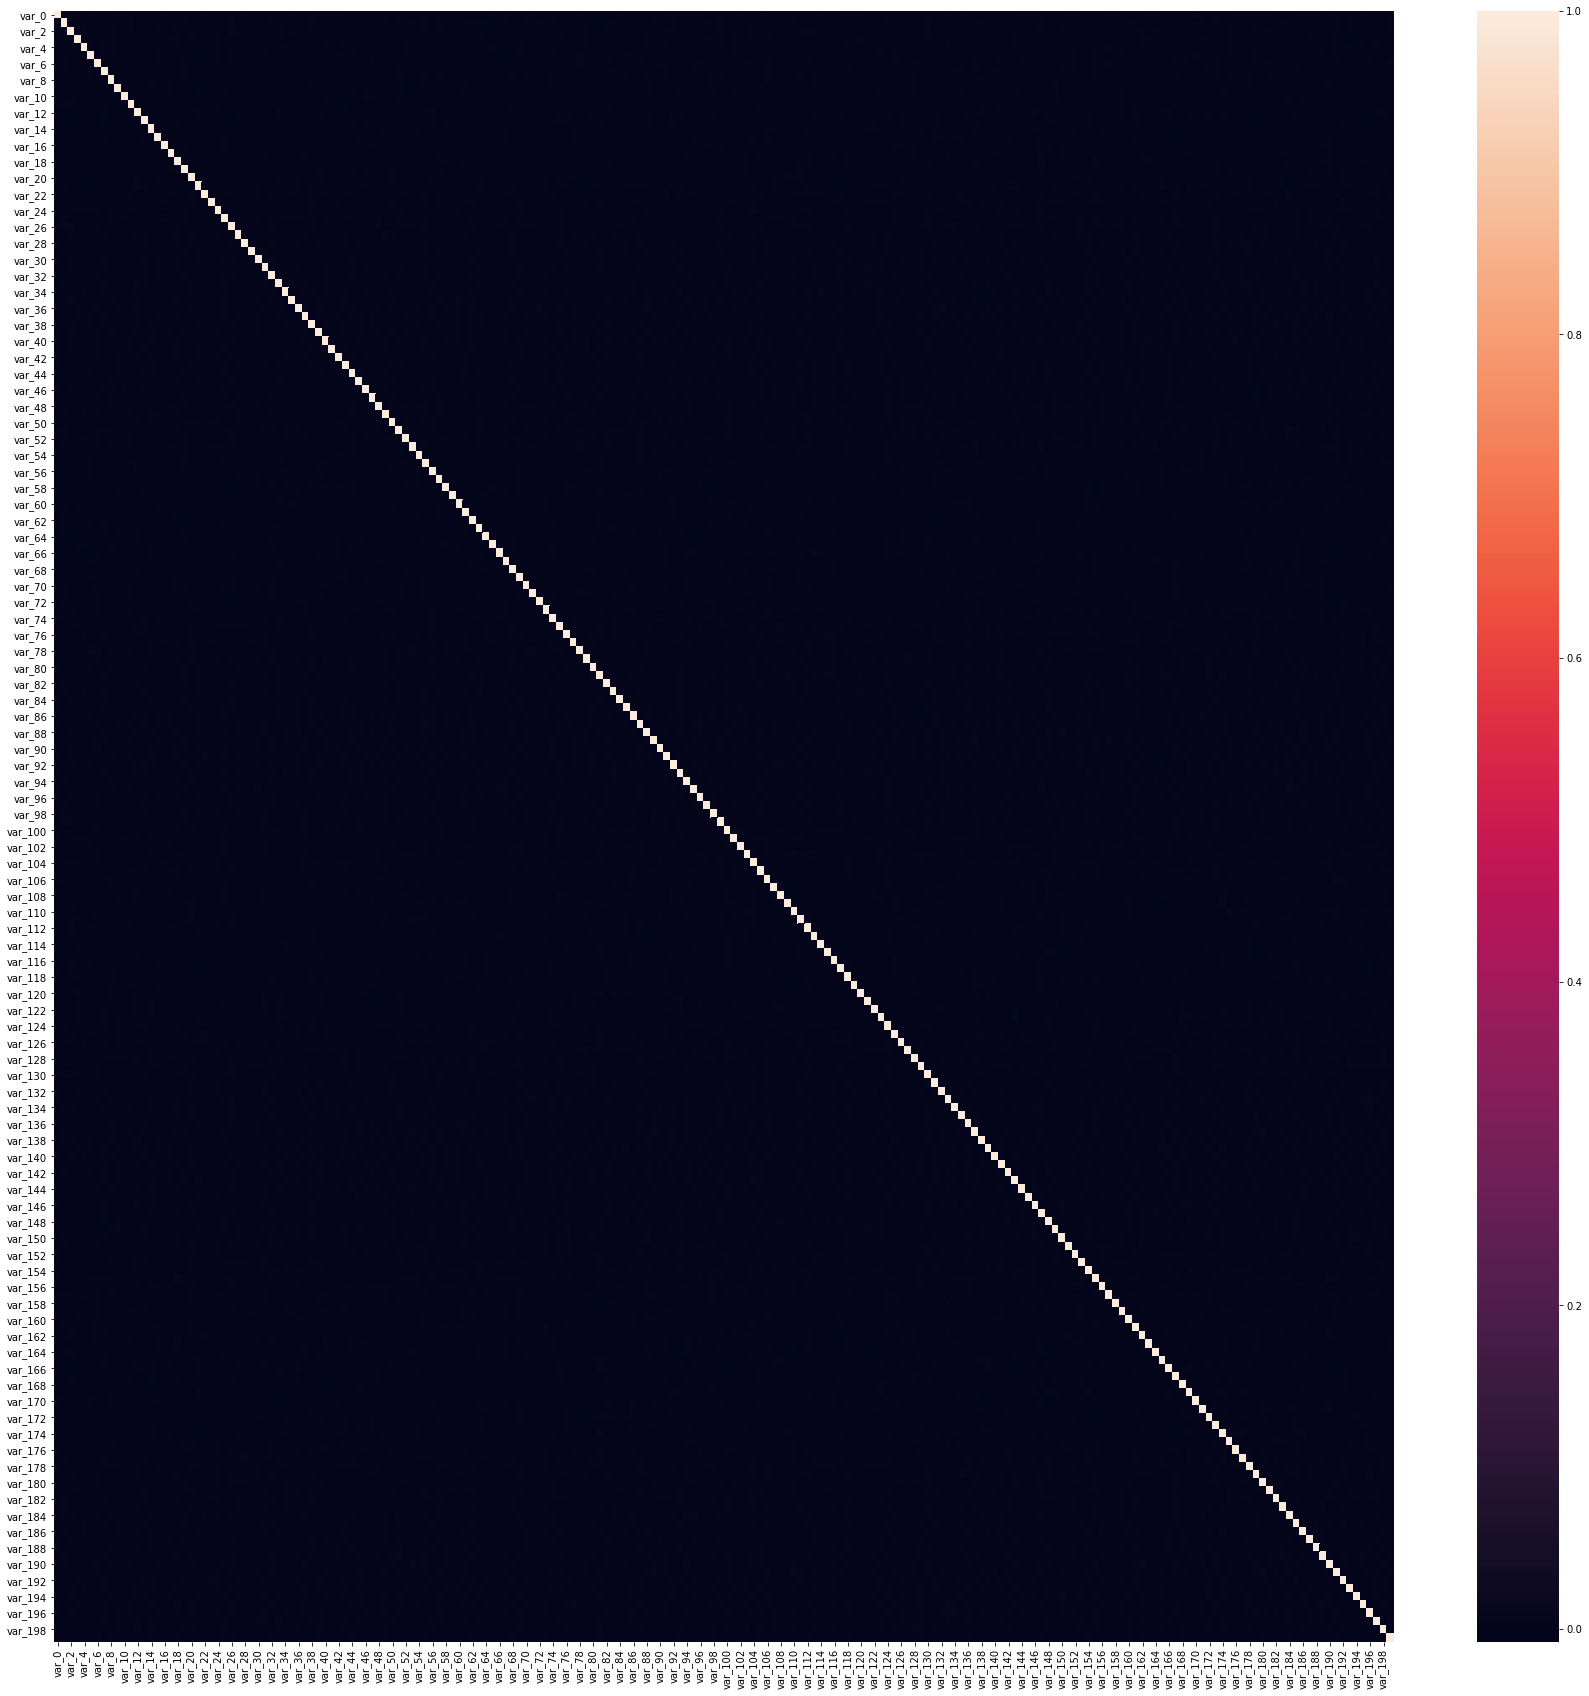

In [24]:
plt.figure(figsize=(30, 30))
sns.heatmap(spearman_corr)

### PCA

In [25]:
# percent of variance retained = 99%

x = X.values
m = x.shape[0] # number of rows
Sigma = (1/m) * np.matmul(np.transpose(x), x) # compute the covariance matrix


u, s, vh = np.linalg.svd(Sigma, full_matrices=True) # find the eigencivtors and S-matrix of the covariance matrix

# find best k (number of principal components)
retained_var = 0
k = 1
goal_retained_var = 0.99

while retained_var < goal_retained_var:
    retained_var = np.sum(s[:k]) / np.sum(s)
    
    if retained_var >= goal_retained_var:
        print ('k =', k)
        print ('Percentage of variance retained =', '{0:.5f}%'.format(retained_var*100))
        
    k += 1
    
    if k == len(s):
        print('The goal retained variance is not attainable')
        print ('k =', k)
        break

k = 198
Percentage of variance retained = 99.04380%


In [26]:
# percent of variance retained = 95%

Sigma = (1/m) * np.matmul(np.transpose(x), x) # compute the covariance matrix


u, s, vh = np.linalg.svd(Sigma, full_matrices=True) # find the eigencivtors and S-matrix of the covariance matrix

# find best k (number of principal components)
retained_var = 0
k = 1
goal_retained_var = 0.95

while retained_var < goal_retained_var:
    retained_var = np.sum(s[:k]) / np.sum(s)
    
    if retained_var >= goal_retained_var:
        print ('k =', k)
        print ('Percentage of variance retained =', '{0:.5f}%'.format(retained_var*100))
        
    k += 1
    
    if k == len(s):
        print('The goal retained variance is not attainable')
        print ('k =', k)
        break

k = 190
Percentage of variance retained = 95.20043%


In [27]:
# percent of variance retained = 90%

Sigma = (1/m) * np.matmul(np.transpose(x), x) # compute the covariance matrix


u, s, vh = np.linalg.svd(Sigma, full_matrices=True) # find the eigencivtors and S-matrix of the covariance matrix

# find best k (number of principal components)
retained_var = 0
k = 1
goal_retained_var = 0.90

while retained_var < goal_retained_var:
    retained_var = np.sum(s[:k]) / np.sum(s)
    
    if retained_var >= goal_retained_var:
        print ('k =', k)
        print ('Percentage of variance retained =', '{0:.5f}%'.format(retained_var*100))
        
    k += 1
    
    if k == len(s):
        print('The goal retained variance is not attainable')
        print ('k =', k)
        break

k = 180
Percentage of variance retained = 90.37049%


In [28]:
# percent of variance retained = 85%

Sigma = (1/m) * np.matmul(np.transpose(x), x) # compute the covariance matrix


u, s, vh = np.linalg.svd(Sigma, full_matrices=True) # find the eigencivtors and S-matrix of the covariance matrix

# find best k (number of principal components)
retained_var = 0
k = 1
goal_retained_var = 0.85

while retained_var < goal_retained_var:
    retained_var = np.sum(s[:k]) / np.sum(s)
    
    if retained_var >= goal_retained_var:
        print ('k =', k)
        print ('Percentage of variance retained =', '{0:.5f}%'.format(retained_var*100))
        
    k += 1
    
    if k == len(s):
        print('The goal retained variance is not attainable')
        print ('k =', k)
        break

k = 169
Percentage of variance retained = 85.02880%


# Model development

### Importing libraries

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
import warnings
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
warnings.simplefilter(action='ignore', category=FutureWarning)

### Function for evaluation metrics

In [33]:
def comp_metrics(y_pred, y_true):
    cnf_matrix=confusion_matrix(y_true, y_pred)
    print(cnf_matrix)
    print()
    plt.figure(figsize=(10,7))
    sn.heatmap(cnf_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()
    FP = cnf_matrix[0,1]  
    FN = cnf_matrix[1,0]
    TP = cnf_matrix[1,1]
    TN = cnf_matrix[0,0]
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    # Sensitivity, recall, or true positive rate
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    Precision=TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1=f1_score(y_true, y_pred, average='weighted')
    F2=fbeta_score(y_true, y_pred, average='weighted', beta=2)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    all_scores=[ACC, TPR, FPR, Precision, Recall, F1, F2]
    Score_table = pd.Series(all_scores, index=['Accuracy','TPR', 'FPR', 'Precision', 'Recall','F1_Score' , 'F2_Score'])
    print(Score_table)
    return Score_table

In [34]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(X_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y_train.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [35]:
columns = X.columns.values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])

X.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0 -0.573930 -1.275655  0.453774 -0.829761  0.236655 -0.537163 -0.338885   
1  0.273590 -0.623288  1.193406 -0.685231  0.793204  1.538372  0.241141   
2 -0.677998 -0.276809  0.519141  0.537312 -0.305510 -0.511776  1.768200   
3  0.128711 -0.129996 -0.666993  0.196935  0.930505  0.409577  0.497595   
4 -0.273969  0.035234  0.820234 -0.075620  0.740728  0.954270  0.610458   

      var_7     var_8     var_9    var_10    var_11    var_12    var_13  \
0  0.610620 -1.560352 -1.476589  0.461851  1.079340 -0.050612 -1.717922   
1 -0.001080  0.859932  0.418964 -0.142793  1.896726  0.003053 -0.026338   
2 -0.561777 -1.560142 -1.309985 -0.128569 -1.342262  0.892220 -0.263945   
3 -0.471313 -1.842650  0.548599  0.349384  1.017001 -0.931361  0.741208   
4  0.793242  1.795606  0.089243 -1.785491 -1.489282 -0.921891 -0.139412   

     var_14    var_15    var_16    var_17    var_18    var_19    var_20  \
0  0.561270 -0.010482 -1.402806 -0.228650 -1.397715  2.285141 -0.469311   
1 -0.932968 -2.121009  1.763925 -1.468794 -0.949769  2.017102 -1.677817   
2 -0.004776  0.179242 -0.646480  0.588612 -1.344576  1.004584  0.758683   
3 -0.478888  0.640798  0.554861  0.783217  0.087615  0.159895  1.191506   
4  0.112919  1.170617 -0.329407  0.391199 -1.112041 -0.141672  1.382587   

     var_21    var_22    var_23    var_24    var_25    var_26    var_27  \
0 -0.125044 -0.605456 -1.039062  1.008747 -0.822199 -0.190318  0.476579   
1 -1.769110  1.493395  0.667354 -0.953338  0.783788 -1.305830 -0.934811   
2  0.108982 -1.084939  0.936778 -1.297840 -1.574579 -0.669781 -1.160694   
3 -0.571630  0.884748 -0.562593  0.413195  0.243322  0.814428  0.149466   
4  0.209382  2.040762 -0.579088  0.962353 -0.434100  1.212144 -1.448968   

     var_28    var_29    var_30    var_31    var_32    var_33    var_34  \
0 -0.766378  0.362012  0.926064  1.160792 -1.297294  0.490905 -0.448076   
1 -0.618767 -1.723095 -0.202172 -1.169302  0.697285  1.064423 -0.118884   
2  0.400873  0.418422 -0.428542  0.966965 -0.683177  0.988382 -0.719816   
3  0.478248 -0.845715 -0.947758  0.019330 -0.793675 -1.986304 -1.524508   
4  0.471237  1.103954  0.568437 -0.431944  0.197259  1.053530  1.794012   

     var_35    var_36    var_37    var_38    var_39    var_40    var_41  \
0  1.298949 -0.488361  0.894228 -1.400108  0.787117  0.180007 -0.321593   
1 -0.602195  0.192043 -0.012680  0.040056  0.739003 -0.528882 -1.247599   
2  0.048769  0.800276  0.471549  0.057784  0.057070 -0.818747 -1.185170   
3 -1.888297  1.913900 -1.340092 -0.344547 -0.000322  0.350026 -1.737397   
4 -0.622871  0.189703 -0.023774  2.027895  0.190781  0.136865  0.805096   

     var_42    var_43    var_44    var_45    var_46    var_47    var_48  \
0  0.509995  1.533872  0.455614  0.264714 -1.884311 -0.165755  0.117113   
1 -1.933456  0.693229 -1.304535 -1.621062 -1.377728  1.199009  1.731144   
2  0.440396  1.520959 -0.821016  0.223095 -0.060339  0.632470  0.531700   
3  0.798027 -0.923490 -0.152686 -0.560701  0.498923 -2.150356 -1.224055   
4  0.999491 -0.188412 -0.345640 -2.467016  0.892283  1.184763 -1.302758   

     var_49    var_50    var_51    var_52    var_53    var_54    var_55  \
0 -1.444060  0.254791  1.909094  0.367414 -1.096510 -0.223684  0.365380   
1  1.146495 -1.315420 -0.022553 -0.318504  0.884857 -1.096658  1.026892   
2 -1.245482  0.247411  0.753993  0.652846  0.515239  0.971594 -1.135519   
3 -1.055256 -0.087006 -0.471302  0.866338 -1.050079  0.826506 -0.062189   
4 -0.287054  0.845049 -0.357091  0.218209 -0.335432 -1.149746  0.245275   

     var_56    var_57    var_58    var_59    var_60    var_61    var_62  \
0 -1.509251 -1.117969 -0.271058  1.390123  0.954203  1.454307  0.591192   
1  0.763114  0.927791 -0.293685 -0.071892 -0.983580  0.405037  0.451776   
2 -0.276349 -0.568365 -0.484607  0.299584  0.103745  0.135708 -0.001729   
3 -0.605676  0.391997  0.030812  0.625621  0.859162 -1.124101  1.264201   
4  0.103586 -0.114924 -

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_train.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0 -0.577102 -1.273737  0.451707 -0.833709  0.235571 -0.536430 -0.334926   
1  0.269959 -0.622138  1.190360 -0.688846  0.790975  1.539900  0.244461   
2 -0.681113 -0.276066  0.516988  0.536516 -0.305477 -0.511033  1.769839   
3  0.125158 -0.129426 -0.667575  0.195355  0.927992  0.410672  0.500633   
4 -0.277303  0.035610  0.817683 -0.077829  0.738607  0.955574  0.613372   

      var_7     var_8     var_9    var_10    var_11    var_12    var_13  \
0  0.608751 -1.561580 -1.473796  0.460091  1.076623 -0.054077 -1.714773   
1 -0.003525  0.858974  0.419300 -0.144987  1.893408 -0.000409 -0.025160   
2 -0.564749 -1.561370 -1.307408 -0.130752 -1.343197  0.888789 -0.262491   
3 -0.474201 -1.843910  0.548767  0.347543  1.014331 -0.934857  0.741492   
4  0.791544  1.794753  0.090006 -1.788863 -1.490109 -0.925386 -0.138103   

     var_14    var_15    var_16    var_17    var_18    var_19    var_20  \
0  0.561098 -0.009778 -1.401636 -0.229802 -1.395940  2.285292 -0.468989   
1 -0.935586 -2.120000  1.757336 -1.473077 -0.948119  2.017368 -1.678317   
2 -0.005875  0.179918 -0.647163  0.589523 -1.342815  1.005285  0.759841   
3 -0.480762  0.641408  0.551235  0.784619  0.088977  0.160959  1.192958   
4  0.112013  1.171149 -0.330867  0.391612 -1.110346 -0.140479  1.384169   

     var_21    var_22    var_23    var_24    var_25    var_26    var_27  \
0 -0.126734 -0.606166 -1.039947  1.005683 -0.823003 -0.184673  0.479492   
1 -1.771135  1.491237  0.668183 -0.954799  0.782756 -1.302434 -0.932390   
2  0.107340 -1.085317  0.937877 -1.299019 -1.575276 -0.665103 -1.158352   
3 -0.573410  0.883010 -0.562999  0.410618  0.242366  0.822099  0.152265   
4  0.207760  2.038227 -0.579511  0.959326 -0.434959  1.220617 -1.446727   

     var_28    var_29    var_30    var_31    var_32    var_33    var_34  \
0 -0.768964  0.360340  0.926437  1.162587 -1.299824  0.489773 -0.447275   
1 -0.621140 -1.722433 -0.202250 -1.165592  0.695096  1.063517 -0.118257   
2  0.399967  0.416687 -0.428711  0.968919 -0.685601  0.987446 -0.718871   
3  0.477453 -0.846035 -0.948135  0.022063 -0.796119 -1.988413 -1.523135   
4  0.470432  1.101452  0.568668 -0.428840  0.194985  1.052620  1.793625   

     var_35    var_36    var_37    var_38    var_39    var_40    var_41  \
0  1.300500 -0.484245  0.897088 -1.396490  0.789254  0.179582 -0.324223   
1 -0.599010  0.196242 -0.011334  0.040634  0.741083 -0.530145 -1.250719   
2  0.051395  0.804550  0.473703  0.058326  0.058332 -0.820353 -1.188257   
3 -1.884007  1.918310 -1.340964 -0.343157  0.000871  0.349803 -1.740777   
4 -0.619668  0.193903 -0.022447  2.024278  0.192203  0.136390  0.803062   

     var_42    var_43    var_44    var_45    var_46    var_47    var_48  \
0  0.509123  1.533101  0.456291  0.265485 -1.889139 -0.164640  0.116264   
1 -1.932294  0.692012 -1.305067 -1.620194 -1.382515  1.197234  1.730162   
2  0.439581  1.520181 -0.821217  0.223868 -0.065019  0.631894  0.530817   
3  0.796914 -0.925566 -0.152428 -0.559888  0.494288 -2.145039 -1.224793   
4  0.998211 -0.190097 -0.345514 -2.466105  0.887680  1.183018 -1.303489   

     var_49    var_50    var_51    var_52    var_53    var_54    var_55  \
0 -1.445719  0.257933  1.907481  0.368029 -1.091818 -0.223968  0.366666   
1  1.148358 -1.310794 -0.024833 -0.316814  0.889088 -1.097157  1.028750   
2 -1.246871  0.250560  0.751982  0.653014  0.519556  0.971603 -1.135534   
3 -1.056386 -0.083541 -0.473736  0.866172 -1.045397  0.826480 -0.061274   
4 -0.287140  0.847633 -0.359486  0.219058 -0.330917 -1.150257  0.246456   

     var_56    var_57    var_58    var_59    var_60    var_61    var_62  \
0 -1.514722 -1.119228 -0.269821  1.386852  0.953771  1.454518  0.593678   
1  0.760624  0.930521 -0.292466 -0.073613 -0.981607  0.404807  0.454158   
2 -0.280203 -0.568553 -0.483544  0.297470  0.104368  0.135366  0.000311   
3 -0.609962  0.393682  0.032296  0.623161  0.858848 -1.124972  1.267194   
4  0.100231 -0.114227 -

In [37]:
X_test[columns] = scaler.fit_transform(X_test[columns])
X_test.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0  0.133982  2.327446  0.852790  1.286580  0.220422  0.339302  0.502075   
1 -0.700870  0.712423  0.226756 -0.780630 -1.162422  0.132014  0.699025   
2 -1.704490 -2.161579 -0.215177  0.126508 -0.503324  1.887818 -0.601566   
3 -0.698565  0.074754  0.499091 -0.103918 -1.379935  1.045199 -0.549870   
4  0.344802  0.369148  1.299241  0.468835 -1.220512 -0.449119  1.670363   

      var_7     var_8     var_9    var_10    var_11    var_12    var_13  \
0  0.507628  0.556964  1.007087 -0.434977 -0.182313 -0.279168 -1.770491   
1  0.613951 -1.407056 -1.295199 -0.318088  0.492760  0.474764 -1.290680   
2  1.087629  0.373846  0.628960 -0.921648  0.037969 -1.828597 -1.020280   
3  1.178826  0.929500 -0.090601 -0.065685 -0.301496  0.157513  1.071603   
4 -1.730001  0.813551 -0.345580  0.858861 -0.002373  0.413734  0.092105   

     var_14    var_15    var_16    var_17    var_18    var_19    var_20  \
0  0.003590 -0.178828 -0.636134 -1.984372  0.040120  0.465547 -1.629717   
1 -0.901852 -0.943665 -0.904598  1.535750  1.770764 -1.547684 -0.195697   
2  1.472473 -0.877337  0.220850  1.238957  0.758551  1.046288 -0.141366   
3  0.546856  0.392371  0.281600 -1.429842 -1.674339  1.129319  0.210524   
4 -1.243809  0.017970  0.998026  1.312165  0.350049  0.168205 -1.987657   

     var_21    var_22    var_23    var_24    var_25    var_26    var_27  \
0  0.192174 -0.952565  0.086548 -1.091630  1.584252 -0.926106 -0.696610   
1 -1.718530  0.337125 -1.130613  1.495323 -0.576872 -0.210295 -1.662728   
2 -0.592815  0.157626 -0.428273 -1.418331 -0.350215 -1.924182  0.632254   
3 -0.570485 -0.467055  2.311003  0.851787  1.659921  0.839212 -0.143212   
4 -0.112770  0.877769  1.101986  0.819250  0.748739  2.120226 -0.744945   

     var_28    var_29    var_30    var_31    var_32    var_33    var_34  \
0  0.229175 -0.483070  0.738826 -0.528874  1.000709 -0.459435 -0.187529   
1  0.225738 -0.785705 -0.349280  0.504972 -0.170422  0.134501 -1.476348   
2  2.205458 -0.619235 -0.183541 -0.312069  1.402649  1.744200  0.969320   
3 -0.348333  0.591498  1.744175 -0.394617  1.115478 -1.051915 -1.164725   
4 -0.388429  0.754482 -1.004622  0.101553 -1.638885  0.643134  0.798353   

     var_35    var_36    var_37    var_38    var_39    var_40    var_41  \
0  0.826997 -0.728780 -1.037532 -0.203578  1.983492 -1.071774  1.615989   
1 -0.575084  1.451451 -1.565170  0.521026 -0.545843  2.020406 -1.032405   
2  1.171115  0.595035 -0.390589 -0.605778  0.050933 -1.487930 -0.680220   
3 -1.243362  1.236498 -1.157945  1.388326  2.000924  0.229353 -1.398856   
4 -0.165306  0.654124  0.392097 -1.099910 -0.074331 -0.927886 -0.695024   

     var_42    var_43    var_44    var_45    var_46    var_47    var_48  \
0  0.093070  0.862229  0.746962 -0.902832  0.306847  2.014905  0.220998   
1 -0.931930  0.637014 -1.146031 -1.332840  0.780333 -0.467758 -0.729636   
2 -2.337311  1.971846 -0.100840  1.298114 -0.422119 -0.796853 -0.527991   
3  1.660360 -0.467441 -0.382476 -0.014484  0.850975  1.658340  1.467763   
4  0.592761  1.499799  1.694153  1.153151  1.716191  0.973802 -1.192033   

     var_49    var_50    var_51    var_52    var_53    var_54    var_55  \
0  0.020759  0.445739  0.123911 -0.469942  1.708503 -0.197088  0.680647   
1 -0.524100 -1.530965  1.464842  0.823871  1.089438  0.902973  0.643348   
2 -1.086452 -1.234756 -0.330141  0.376979 -0.476668  0.978926  2.302884   
3 -1.375100 -0.199112 -1.461451 -0.322252  0.311684  0.034739  0.137849   
4 -0.410568  0.067837 -1.100248  0.475392 -0.439514 -0.037092  1.119128   

     var_56    var_57    var_58    var_59    var_60    var_61    var_62  \
0  0.760453  0.174689 -1.994790  0.467593 -0.054743  0.720473 -0.814598   
1  1.437186  0.828223 -0.353735  0.699721 -1.620097 -0.580458  0.224591   
2  0.920057 -0.989921 -1.677760 -0.483074 -0.756043  0.541073  0.950713   
3 -0.336802  0.755052 -0.335193  1.305128  0.741646  0.672092 -0.044175   
4 -1.111608  0.207892  

### Naive Bayes

Fold number 1

[[29503   481]
 [ 2129  1221]]



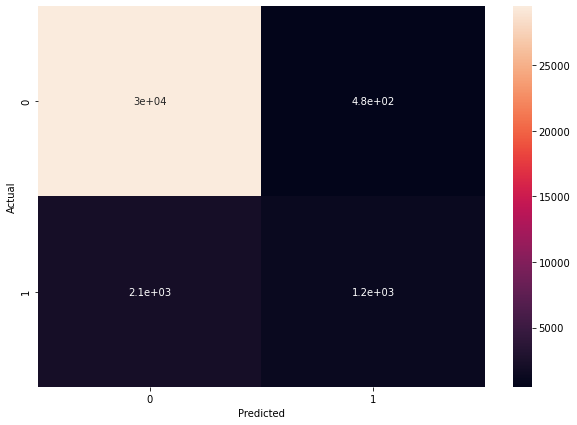


Accuracy     0.921702
TPR          0.364478
FPR          0.016042
Precision    0.717391
Recall       0.364478
F1_Score     0.909978
F2_Score     0.916075
dtype: float64
[[29503   481]
 [ 2129  1221]]



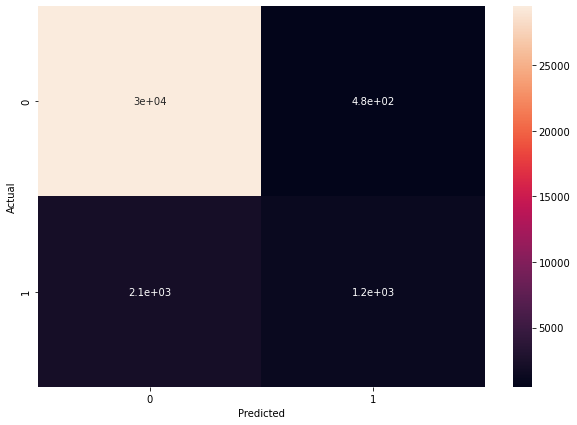


Accuracy     0.921702
TPR          0.364478
FPR          0.016042
Precision    0.717391
Recall       0.364478
F1_Score     0.909978
F2_Score     0.916075
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[29476   508]
 [ 2159  1191]]



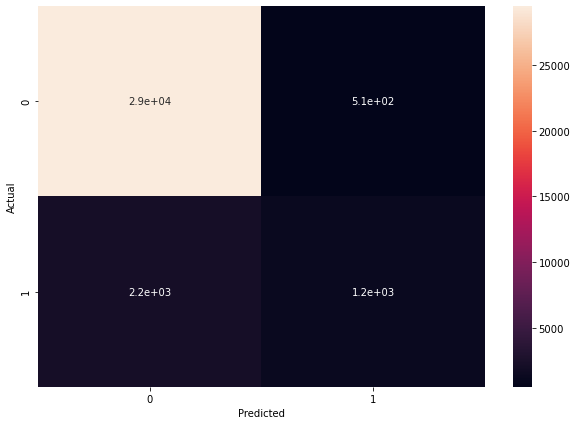


Accuracy     0.919992
TPR          0.355522
FPR          0.016942
Precision    0.701001
Recall       0.355522
F1_Score     0.907982
F2_Score     0.914267
dtype: float64
[[29476   508]
 [ 2159  1191]]



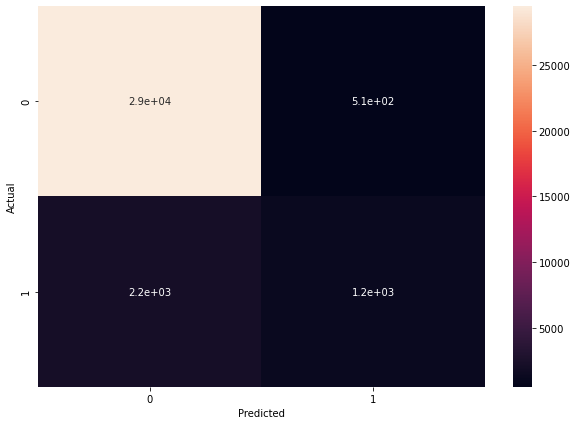


Accuracy     0.919992
TPR          0.355522
FPR          0.016942
Precision    0.701001
Recall       0.355522
F1_Score     0.907982
F2_Score     0.914267
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[29509   475]
 [ 2168  1181]]



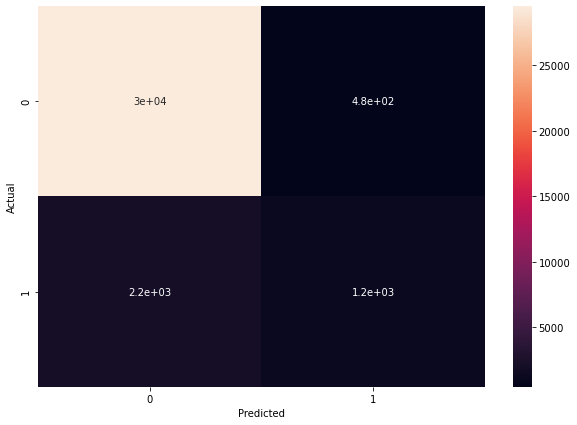


Accuracy     0.920709
TPR          0.352643
FPR          0.015842
Precision    0.713164
Recall       0.352643
F1_Score     0.908387
F2_Score     0.914809
dtype: float64
[[29509   475]
 [ 2168  1181]]



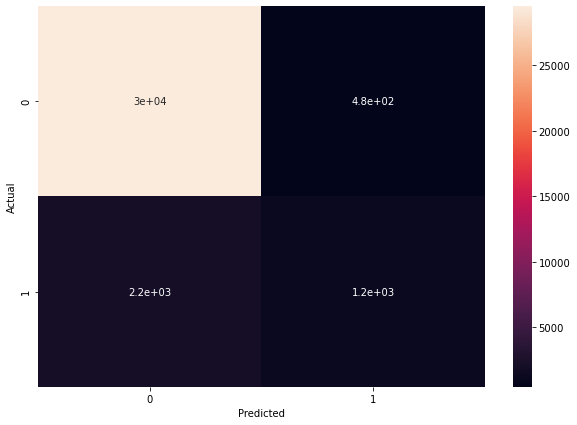


Accuracy     0.920709
TPR          0.352643
FPR          0.015842
Precision    0.713164
Recall       0.352643
F1_Score     0.908387
F2_Score     0.914809
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[29488   496]
 [ 2104  1245]]



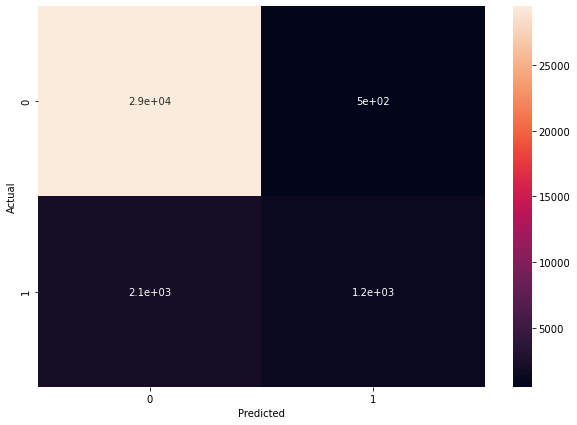


Accuracy     0.921999
TPR          0.371753
FPR          0.016542
Precision    0.715106
Recall       0.371753
F1_Score     0.910697
F2_Score     0.916579
dtype: float64
[[29488   496]
 [ 2104  1245]]



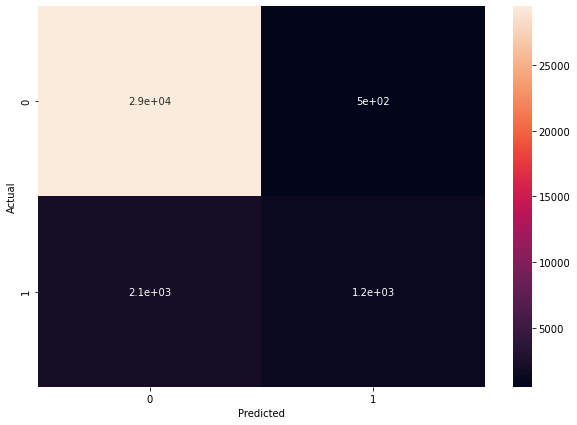


Accuracy     0.921999
TPR          0.371753
FPR          0.016542
Precision    0.715106
Recall       0.371753
F1_Score     0.910697
F2_Score     0.916579
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[29481   502]
 [ 2142  1208]]



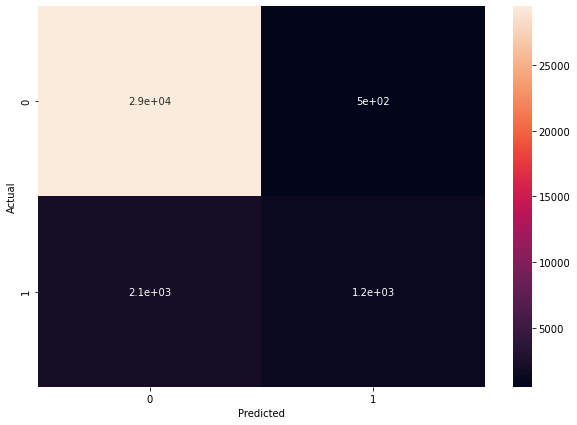


Accuracy     0.920679
TPR          0.360597
FPR          0.016743
Precision    0.706433
Recall       0.360597
F1_Score     0.908881
F2_Score     0.915042
dtype: float64
[[29481   502]
 [ 2142  1208]]



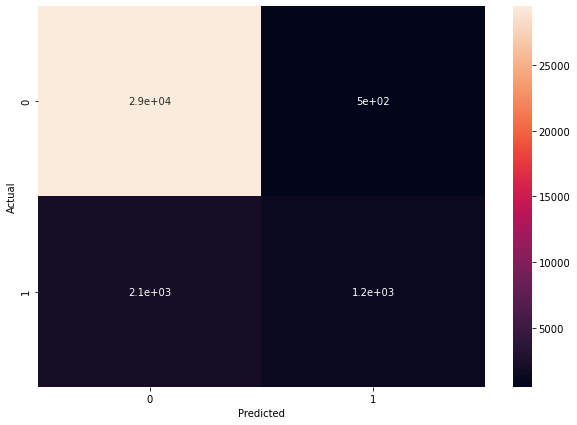


Accuracy     0.920679
TPR          0.360597
FPR          0.016743
Precision    0.706433
Recall       0.360597
F1_Score     0.908881
F2_Score     0.915042
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[29499   484]
 [ 2091  1259]]



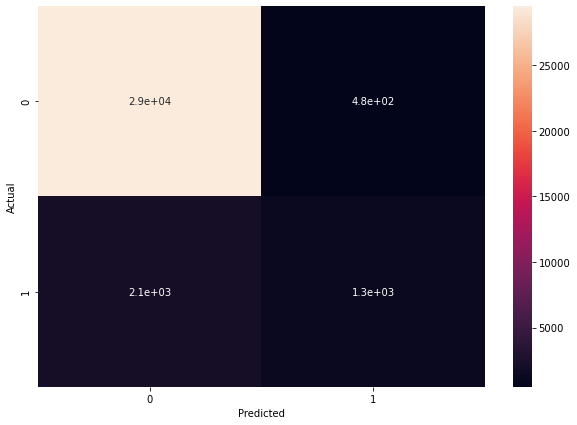


Accuracy     0.922749
TPR          0.375821
FPR          0.016142
Precision    0.722318
Recall       0.375821
F1_Score     0.911570
F2_Score     0.917372
dtype: float64
[[29499   484]
 [ 2091  1259]]



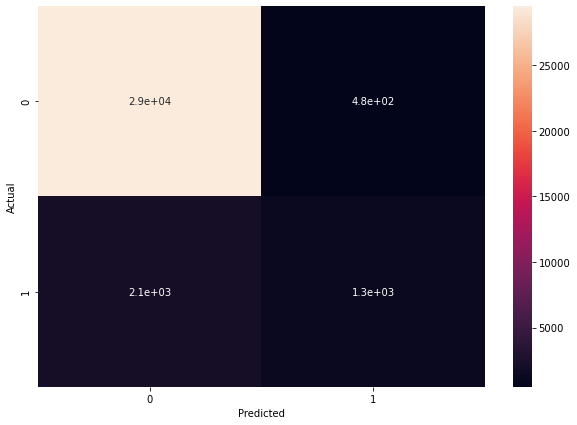


Accuracy     0.922749
TPR          0.375821
FPR          0.016142
Precision    0.722318
Recall       0.375821
F1_Score     0.911570
F2_Score     0.917372
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.67355 
Your CV score is 0.6735467098146409


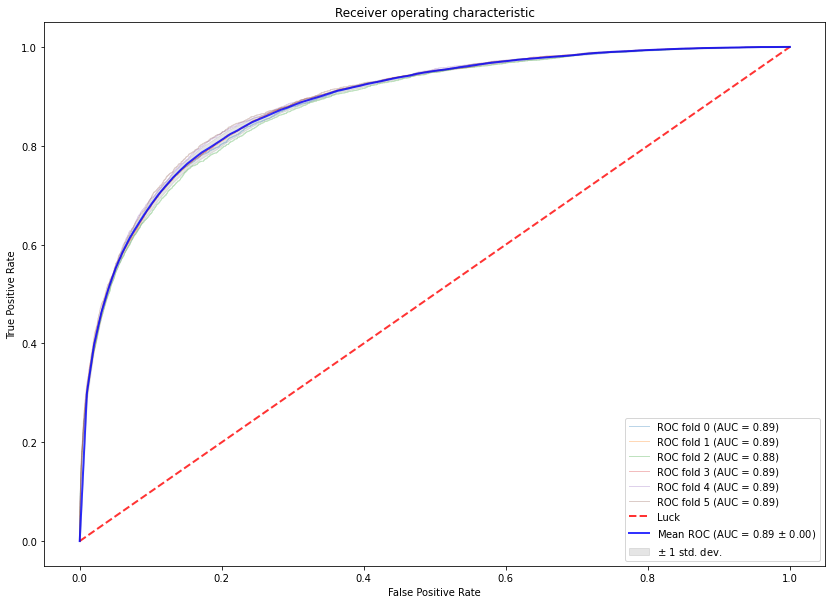

In [18]:
gnb = GaussianNB()
folds = StratifiedKFold(n_splits=6, shuffle=False)
fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_nb = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        gnb.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = gnb.predict(X_train.iloc[val_idx])
        probs[val_idx] = gnb.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_nb += gnb.predict_proba(X_test)[:,1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(gnb, val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    
sub_preds = (oof)

print('Your CV score is', roc_auc_score(y_train, oof))
plot_roc_curve(fprs, tprs)
 
sub_preds_test = predictions_nb
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission1.csv', index=False)

In [35]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.921702  0.919992  0.920709  0.921999  0.920679  0.922749   
TPR        0.364478  0.355522  0.352643  0.371753  0.360597  0.375821   
FPR        0.016042  0.016942  0.015842  0.016542  0.016743  0.016142   
Precision  0.717391  0.701001  0.713164  0.715106  0.706433  0.722318   
Recall     0.364478  0.355522  0.352643  0.371753  0.360597  0.375821   
F1_Score   0.909978  0.907982  0.908387  0.910697  0.908881  0.911570   
F2_Score   0.916075  0.914267  0.914809  0.916579  0.915042  0.917372   

               mean  
Accuracy   0.921305  
TPR        0.363469  
FPR        0.016376  
Precision  0.712569  
Recall     0.363469  
F1_Score   0.909582  
F2_Score   0.915691

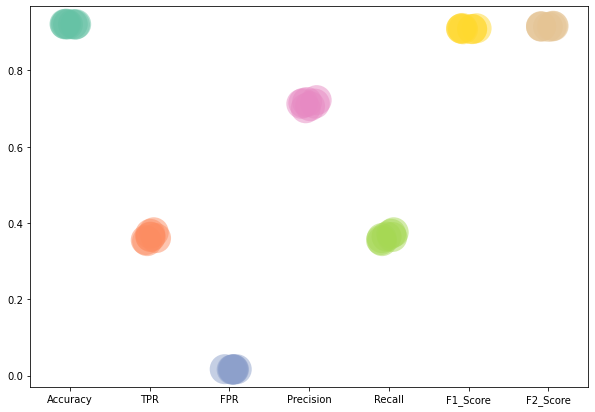

In [36]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [37]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.67355


In [38]:
print('Kaggle accuracy =', 0.88847)

Kaggle accuracy = 0.88847


### Logisitc regression

Fold number 1

[[29538   446]
 [ 2449   901]]



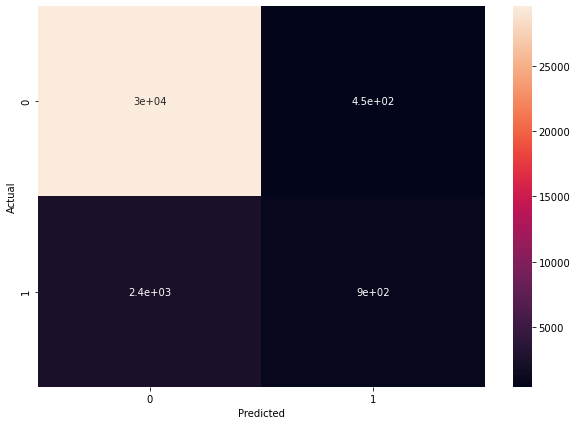


Accuracy     0.913152
TPR          0.268955
FPR          0.014875
Precision    0.668894
Recall       0.268955
F1_Score     0.896037
F2_Score     0.905140
dtype: float64
[[29538   446]
 [ 2449   901]]



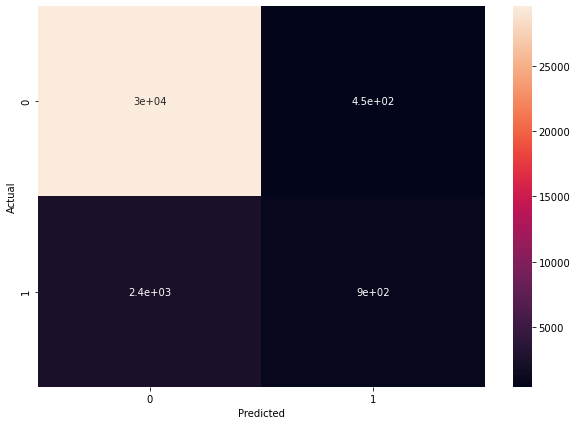


Accuracy     0.913152
TPR          0.268955
FPR          0.014875
Precision    0.668894
Recall       0.268955
F1_Score     0.896037
F2_Score     0.905140
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[29561   423]
 [ 2439   911]]



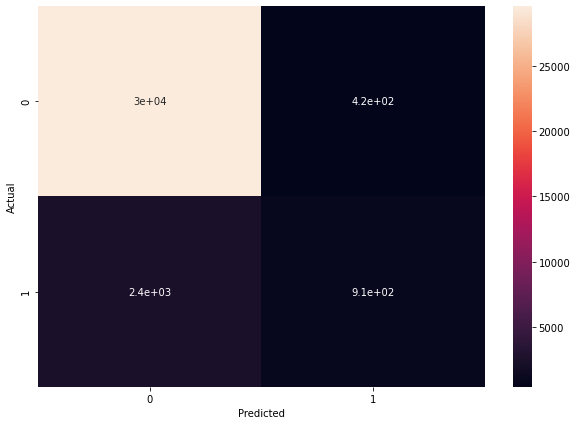


Accuracy     0.914142
TPR          0.271940
FPR          0.014108
Precision    0.682909
Recall       0.271940
F1_Score     0.897061
F2_Score     0.906114
dtype: float64
[[29561   423]
 [ 2439   911]]



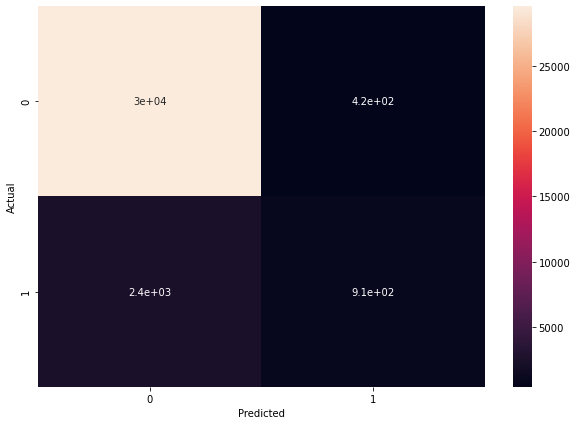


Accuracy     0.914142
TPR          0.271940
FPR          0.014108
Precision    0.682909
Recall       0.271940
F1_Score     0.897061
F2_Score     0.906114
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[29575   409]
 [ 2454   895]]



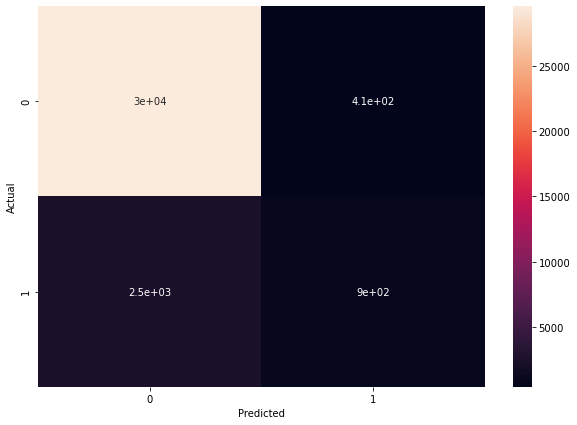


Accuracy     0.914109
TPR          0.267244
FPR          0.013641
Precision    0.686350
Recall       0.267244
F1_Score     0.896651
F2_Score     0.905905
dtype: float64
[[29575   409]
 [ 2454   895]]



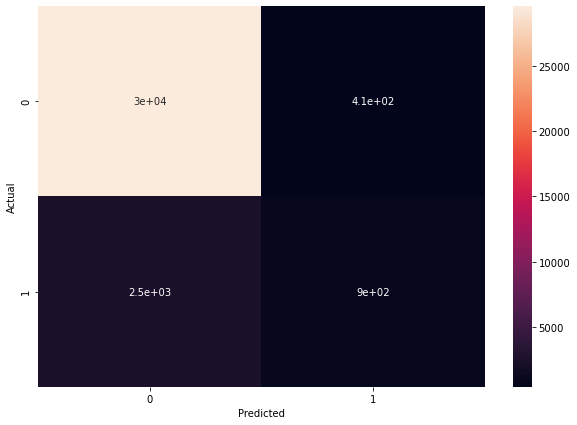


Accuracy     0.914109
TPR          0.267244
FPR          0.013641
Precision    0.686350
Recall       0.267244
F1_Score     0.896651
F2_Score     0.905905
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[29550   434]
 [ 2415   934]]



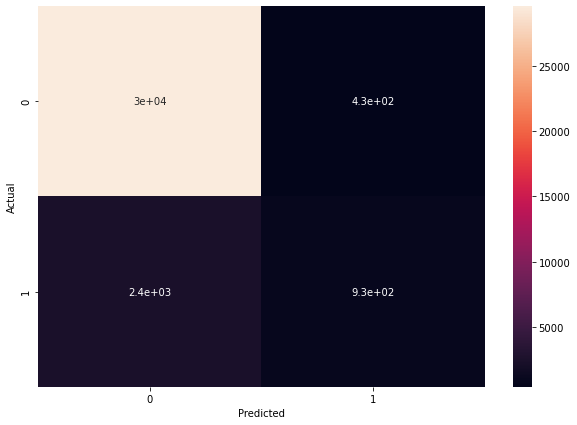


Accuracy     0.914529
TPR          0.278889
FPR          0.014474
Precision    0.682749
Recall       0.278889
F1_Score     0.897948
F2_Score     0.906728
dtype: float64
[[29550   434]
 [ 2415   934]]



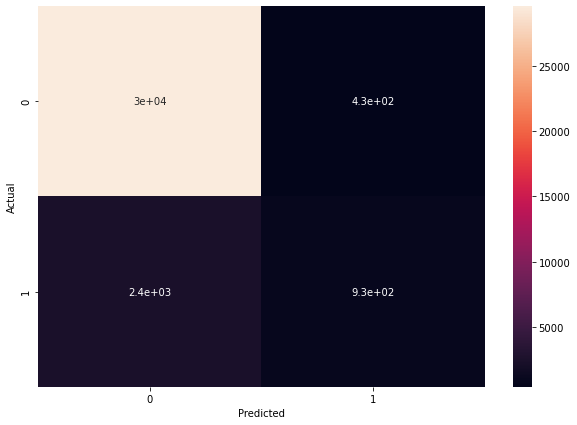


Accuracy     0.914529
TPR          0.278889
FPR          0.014474
Precision    0.682749
Recall       0.278889
F1_Score     0.897948
F2_Score     0.906728
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[29609   374]
 [ 2476   874]]



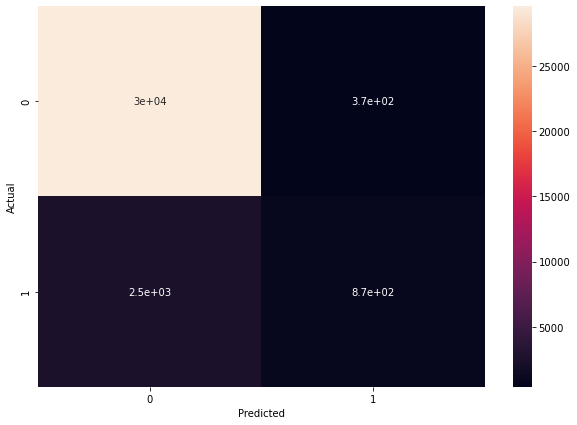


Accuracy     0.914499
TPR          0.260896
FPR          0.012474
Precision    0.700321
Recall       0.260896
F1_Score     0.896403
F2_Score     0.905979
dtype: float64
[[29609   374]
 [ 2476   874]]



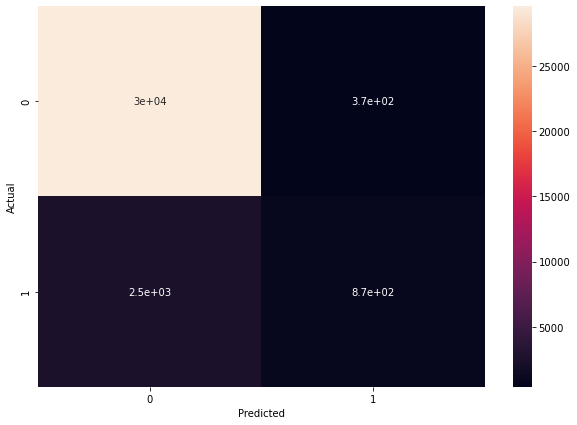


Accuracy     0.914499
TPR          0.260896
FPR          0.012474
Precision    0.700321
Recall       0.260896
F1_Score     0.896403
F2_Score     0.905979
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[29578   405]
 [ 2430   920]]



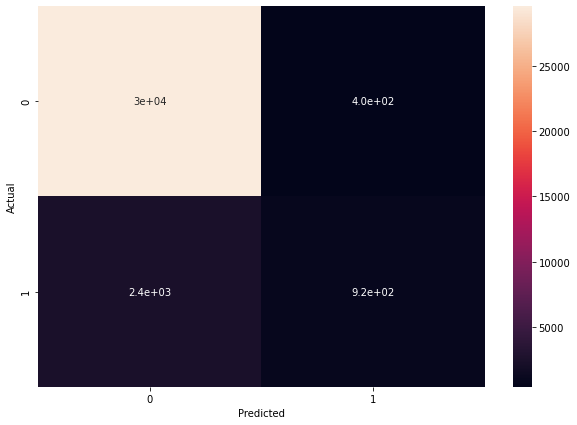


Accuracy     0.914949
TPR          0.274627
FPR          0.013508
Precision    0.694340
Recall       0.274627
F1_Score     0.897918
F2_Score     0.906919
dtype: float64
[[29578   405]
 [ 2430   920]]



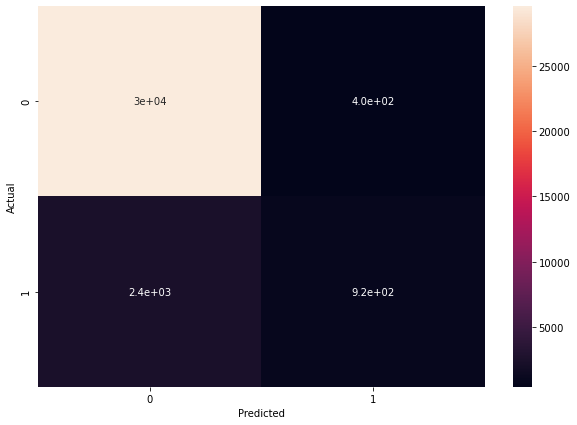


Accuracy     0.914949
TPR          0.274627
FPR          0.013508
Precision    0.694340
Recall       0.274627
F1_Score     0.897918
F2_Score     0.906919
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.62829 
Your CV score is 0.6282892452014313


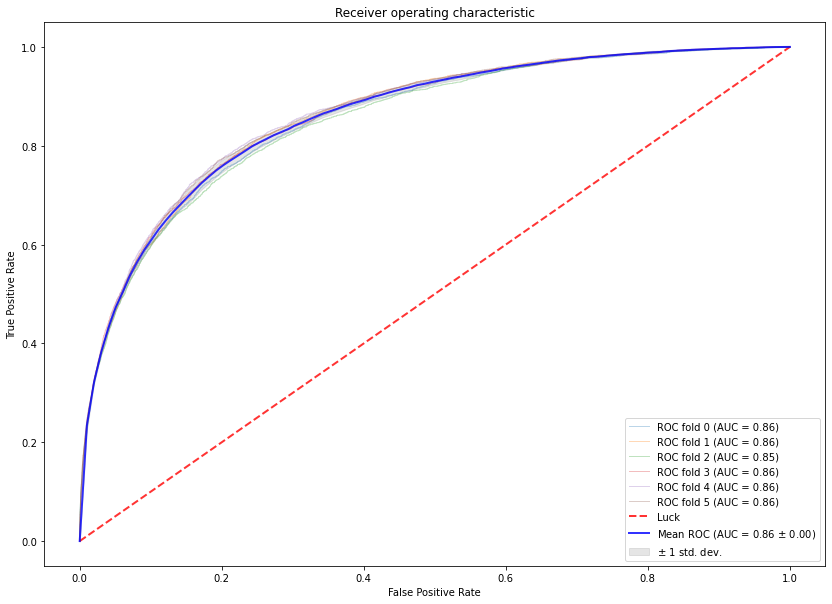

In [19]:
lr = LogisticRegression(random_state=0)
folds = StratifiedKFold(n_splits=6, shuffle=False)

fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_lr = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        lr.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = lr.predict(X_train.iloc[val_idx])
        probs[val_idx] = lr.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_lr += lr.predict_proba(X_test)[:,1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(lr,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
        
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    
sub_preds = (oof)
print('Your CV score is', roc_auc_score(y_train, oof))
plot_roc_curve(fprs, tprs)

sub_preds_test = predictions_lr
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission2.csv', index=False)

In [20]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.913152  0.914142  0.914109  0.914529  0.914499  0.914949   
TPR        0.268955  0.271940  0.267244  0.278889  0.260896  0.274627   
FPR        0.014875  0.014108  0.013641  0.014474  0.012474  0.013508   
Precision  0.668894  0.682909  0.686350  0.682749  0.700321  0.694340   
Recall     0.268955  0.271940  0.267244  0.278889  0.260896  0.274627   
F1_Score   0.896037  0.897061  0.896651  0.897948  0.896403  0.897918   
F2_Score   0.905140  0.906114  0.905905  0.906728  0.905979  0.906919   

               mean  
Accuracy   0.914230  
TPR        0.270425  
FPR        0.013846  
Precision  0.685927  
Recall     0.270425  
F1_Score   0.897003  
F2_Score   0.906131

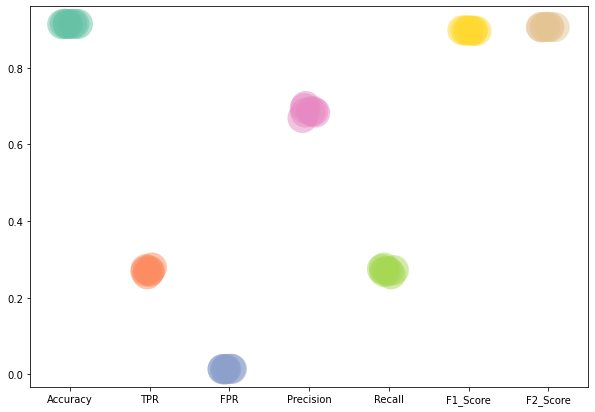

In [21]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [22]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.62829


In [23]:
print('Kaggle accuracy =', 0.86096)

Kaggle accuracy = 0.86096


### Random Forest

#### Note:
Randomized search has been used in a separate notebook to estimate the optimized hyper-paramters fed to the Random Forest Calassifier.

In [25]:
from sklearn.ensemble import RandomForestClassifier
RFclf11 = RandomForestClassifier(
    n_estimators=68,
    criterion='gini',
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)

Fold number 1

[[22595  7389]
 [ 1198  2152]]



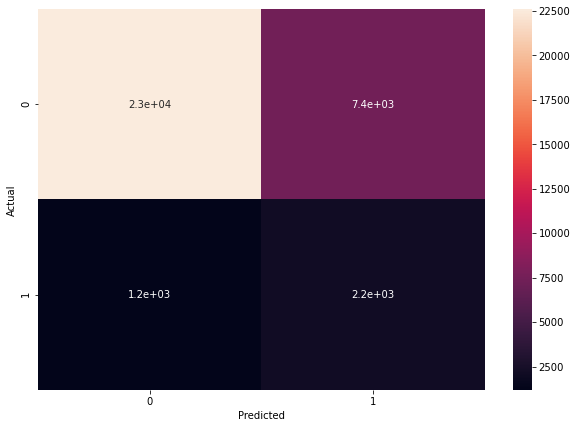


Accuracy     0.742395
TPR          0.642388
FPR          0.246431
Precision    0.225553
Recall       0.642388
F1_Score     0.789425
F2_Score     0.754170
dtype: float64
[[22595  7389]
 [ 1198  2152]]



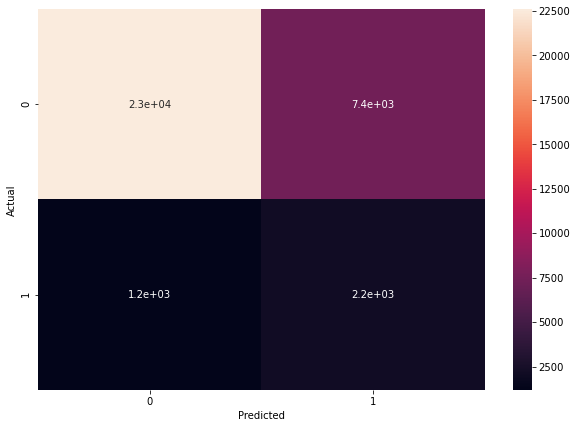


Accuracy     0.742395
TPR          0.642388
FPR          0.246431
Precision    0.225553
Recall       0.642388
F1_Score     0.789425
F2_Score     0.754170
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[22638  7346]
 [ 1232  2118]]



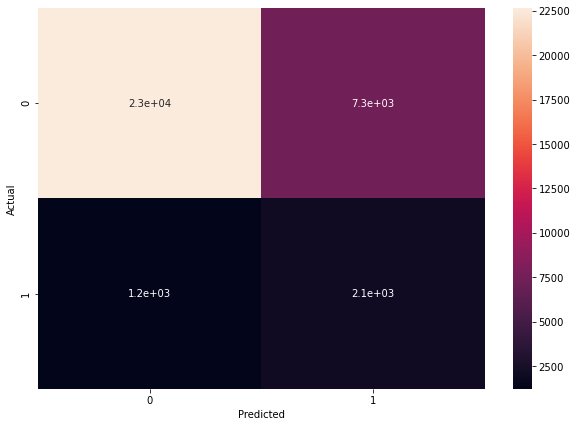


Accuracy     0.742665
TPR          0.632239
FPR          0.244997
Precision    0.223795
Recall       0.632239
F1_Score     0.789449
F2_Score     0.754548
dtype: float64
[[22638  7346]
 [ 1232  2118]]



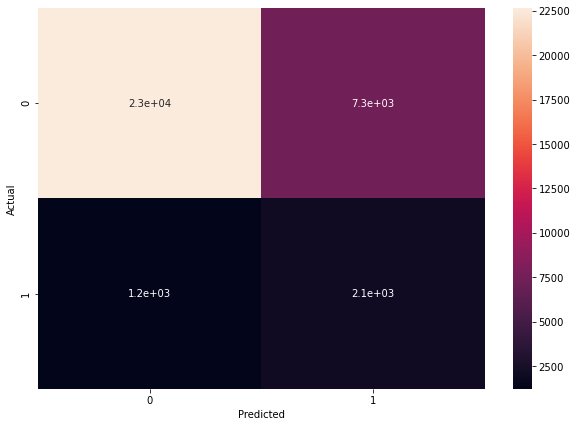


Accuracy     0.742665
TPR          0.632239
FPR          0.244997
Precision    0.223795
Recall       0.632239
F1_Score     0.789449
F2_Score     0.754548
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[22744  7240]
 [ 1217  2132]]



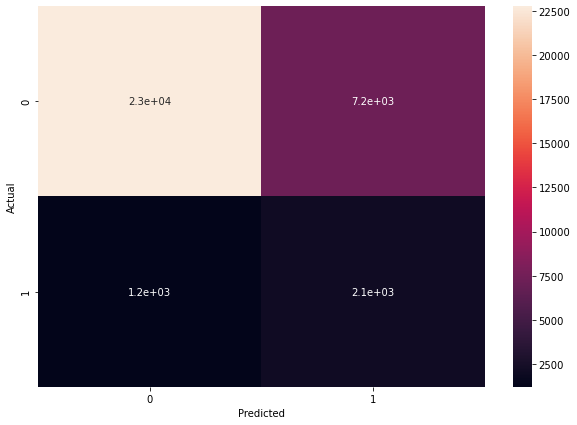


Accuracy     0.746287
TPR          0.636608
FPR          0.241462
Precision    0.227486
Recall       0.636608
F1_Score     0.792186
F2_Score     0.757927
dtype: float64
[[22744  7240]
 [ 1217  2132]]



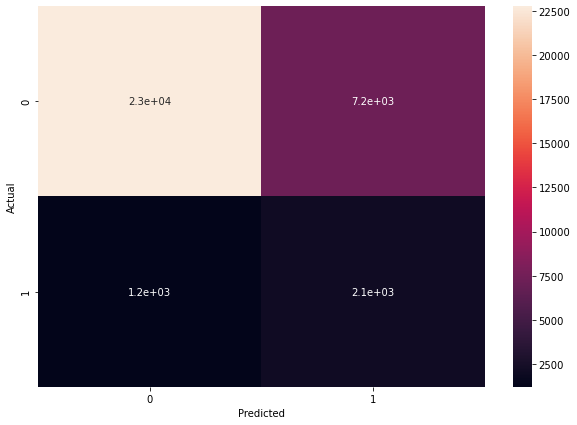


Accuracy     0.746287
TPR          0.636608
FPR          0.241462
Precision    0.227486
Recall       0.636608
F1_Score     0.792186
F2_Score     0.757927
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[22541  7443]
 [ 1173  2176]]



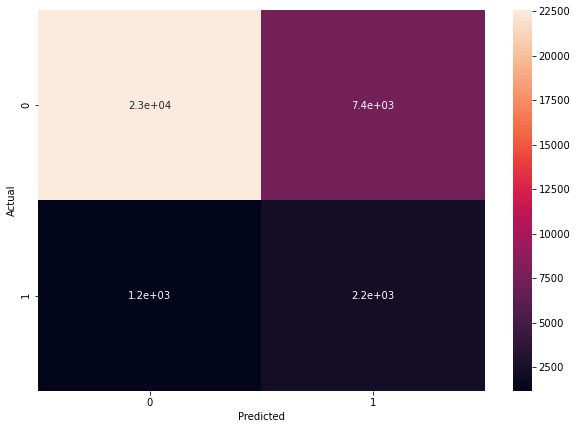


Accuracy     0.741517
TPR          0.649746
FPR          0.248232
Precision    0.226219
Recall       0.649746
F1_Score     0.788915
F2_Score     0.753249
dtype: float64
[[22541  7443]
 [ 1173  2176]]



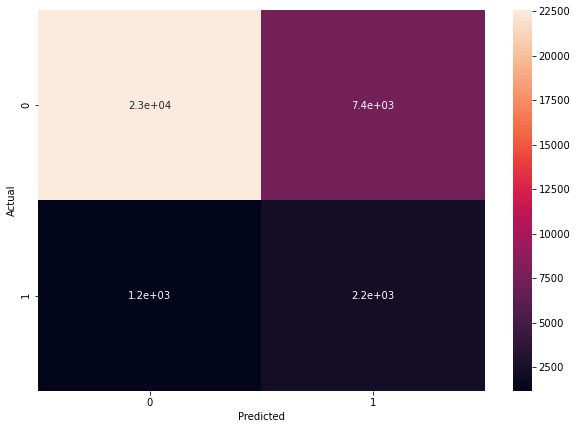


Accuracy     0.741517
TPR          0.649746
FPR          0.248232
Precision    0.226219
Recall       0.649746
F1_Score     0.788915
F2_Score     0.753249
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[22517  7466]
 [ 1173  2177]]



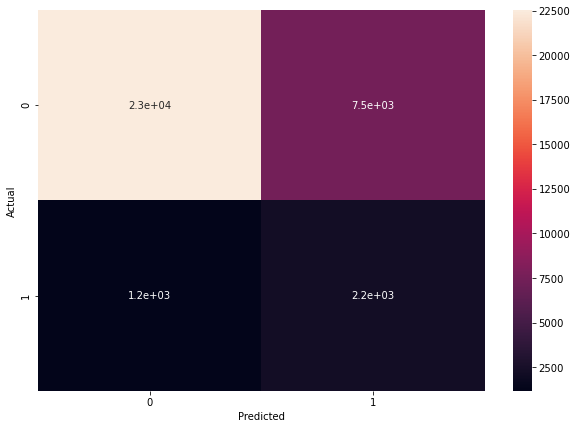


Accuracy     0.740827
TPR          0.649851
FPR          0.249008
Precision    0.225760
Recall       0.649851
F1_Score     0.788397
F2_Score     0.752590
dtype: float64
[[22517  7466]
 [ 1173  2177]]



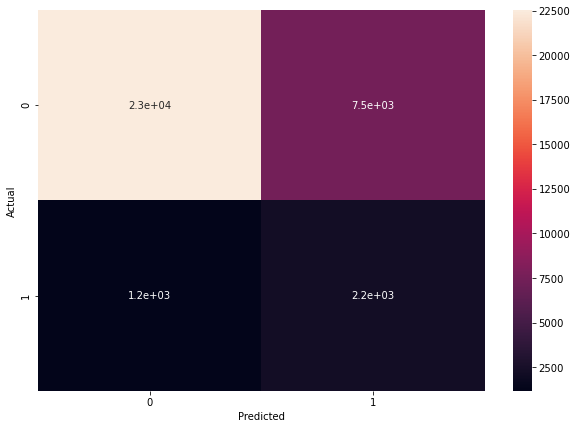


Accuracy     0.740827
TPR          0.649851
FPR          0.249008
Precision    0.225760
Recall       0.649851
F1_Score     0.788397
F2_Score     0.752590
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[22780  7203]
 [ 1127  2223]]



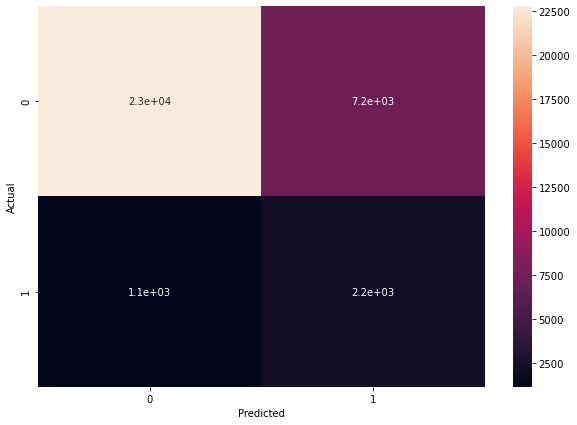


Accuracy     0.750098
TPR          0.663582
FPR          0.240236
Precision    0.235837
Recall       0.663582
F1_Score     0.795434
F2_Score     0.761214
dtype: float64
[[22780  7203]
 [ 1127  2223]]



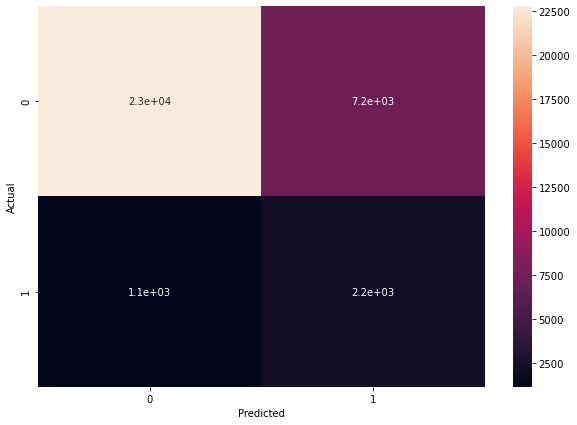


Accuracy     0.750098
TPR          0.663582
FPR          0.240236
Precision    0.235837
Recall       0.663582
F1_Score     0.795434
F2_Score     0.761214
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.70034 
Your CV score is 0.7003373470660792


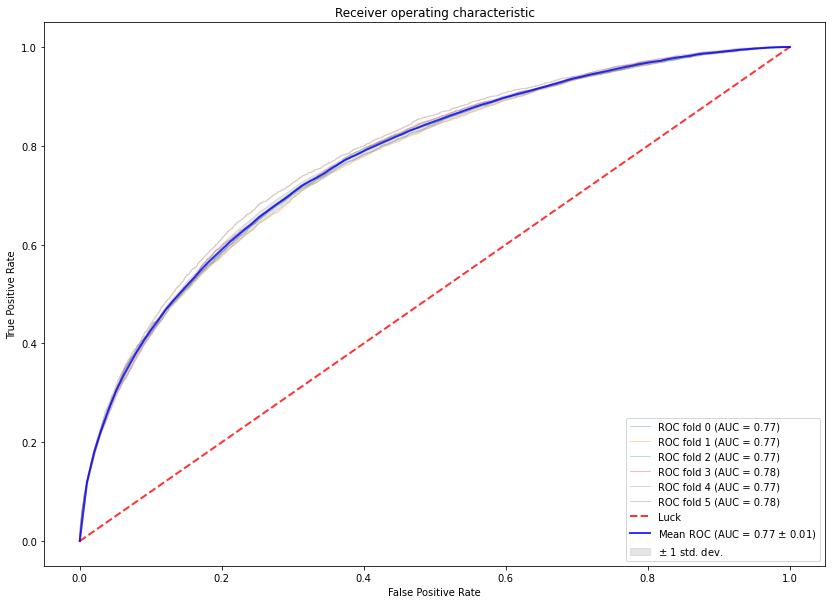

In [26]:
folds = StratifiedKFold(n_splits=6, shuffle=False)


fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_rf = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        RFclf11.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = RFclf11.predict(X_train.iloc[val_idx])
        probs[val_idx] = RFclf11.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_rf += RFclf11.predict_proba(X_test)[:, 1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(RFclf11,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()

        
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    
sub_preds = (oof)
print('Your CV score is', roc_auc_score(y_train, oof))
plot_roc_curve(fprs, tprs)

sub_preds_test = predictions_rf
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission3.csv', index=False)

In [27]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.742395  0.742665  0.746287  0.741517  0.740827  0.750098   
TPR        0.642388  0.632239  0.636608  0.649746  0.649851  0.663582   
FPR        0.246431  0.244997  0.241462  0.248232  0.249008  0.240236   
Precision  0.225553  0.223795  0.227486  0.226219  0.225760  0.235837   
Recall     0.642388  0.632239  0.636608  0.649746  0.649851  0.663582   
F1_Score   0.789425  0.789449  0.792186  0.788915  0.788397  0.795434   
F2_Score   0.754170  0.754548  0.757927  0.753249  0.752590  0.761214   

               mean  
Accuracy   0.743965  
TPR        0.645736  
FPR        0.245061  
Precision  0.227442  
Recall     0.645736  
F1_Score   0.790634  
F2_Score   0.755616

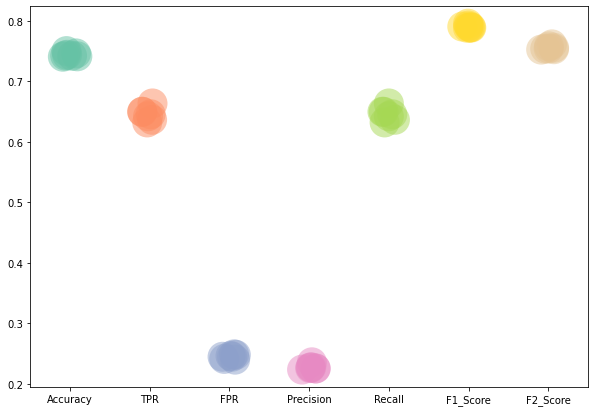

In [28]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [29]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.70034


In [1]:
print('Kaggle accuracy =', 0.78127)

Kaggle accuracy = 0.78127


### Decision Tree

Fold number 1

[[27141  2843]
 [ 2620   730]]



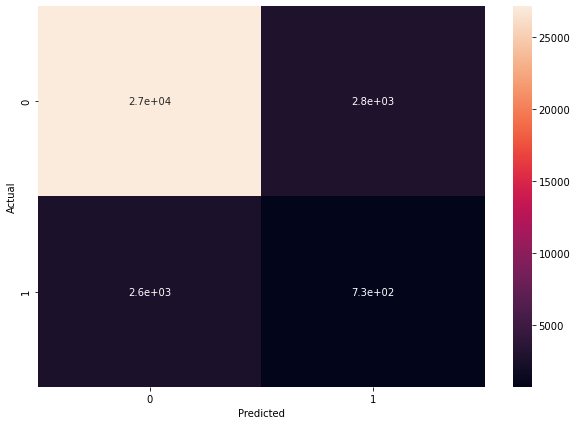


Accuracy     0.836113
TPR          0.217910
FPR          0.094817
Precision    0.204310
Recall       0.217910
F1_Score     0.838447
F2_Score     0.837038
dtype: float64
[[27141  2843]
 [ 2620   730]]



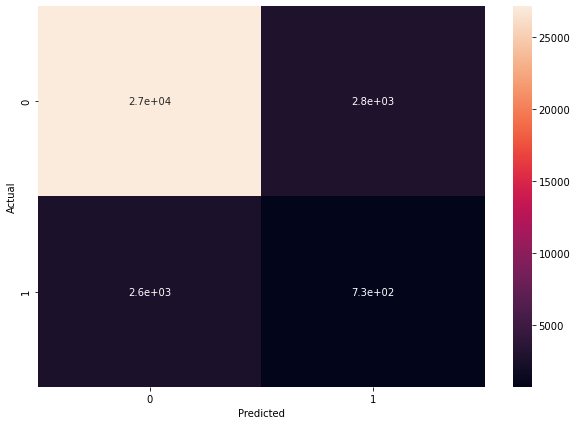


Accuracy     0.836113
TPR          0.217910
FPR          0.094817
Precision    0.204310
Recall       0.217910
F1_Score     0.838447
F2_Score     0.837038
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[27102  2882]
 [ 2637   713]]



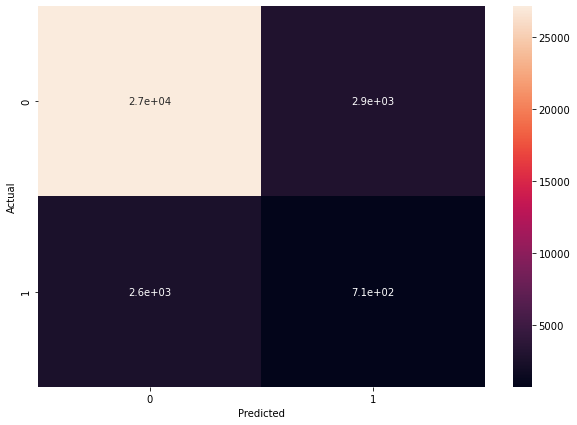


Accuracy     0.834433
TPR          0.212836
FPR          0.096118
Precision    0.198331
Recall       0.212836
F1_Score     0.837014
F2_Score     0.835456
dtype: float64
[[27102  2882]
 [ 2637   713]]



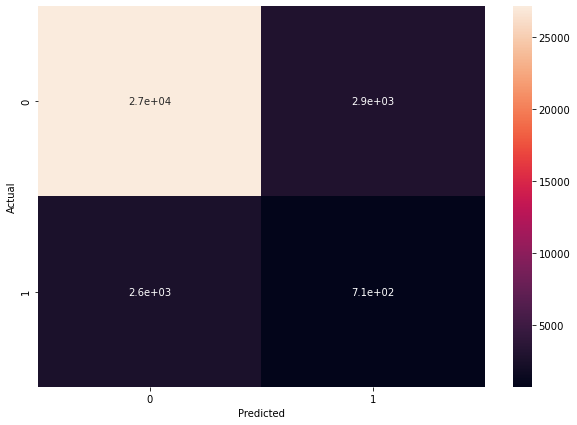


Accuracy     0.834433
TPR          0.212836
FPR          0.096118
Precision    0.198331
Recall       0.212836
F1_Score     0.837014
F2_Score     0.835456
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[27177  2807]
 [ 2641   708]]



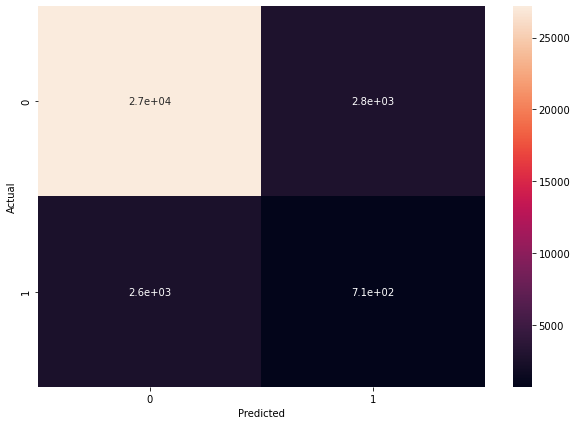


Accuracy     0.836558
TPR          0.211406
FPR          0.093617
Precision    0.201422
Recall       0.211406
F1_Score     0.838308
F2_Score     0.837254
dtype: float64
[[27177  2807]
 [ 2641   708]]



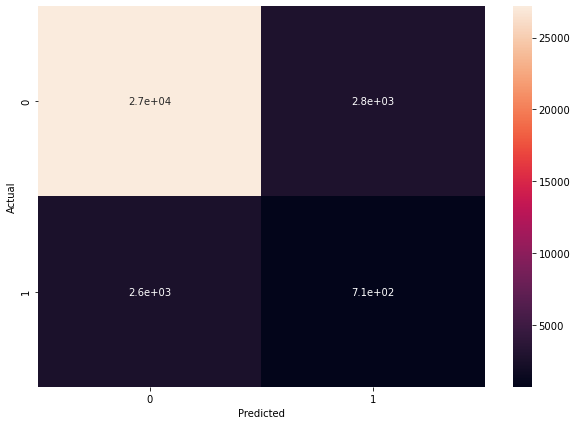


Accuracy     0.836558
TPR          0.211406
FPR          0.093617
Precision    0.201422
Recall       0.211406
F1_Score     0.838308
F2_Score     0.837254
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[27172  2812]
 [ 2604   745]]



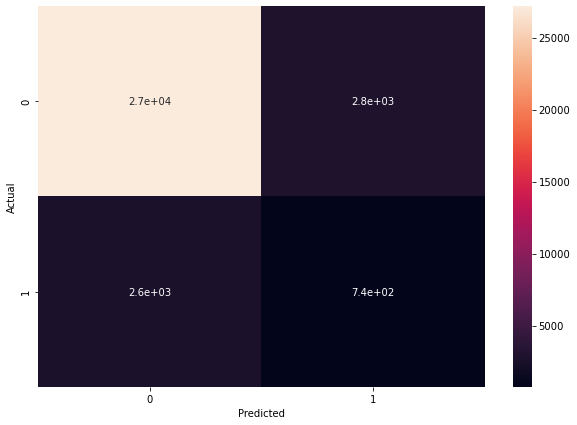


Accuracy     0.837518
TPR          0.222454
FPR          0.093783
Precision    0.209446
Recall       0.222454
F1_Score     0.839682
F2_Score     0.838377
dtype: float64
[[27172  2812]
 [ 2604   745]]



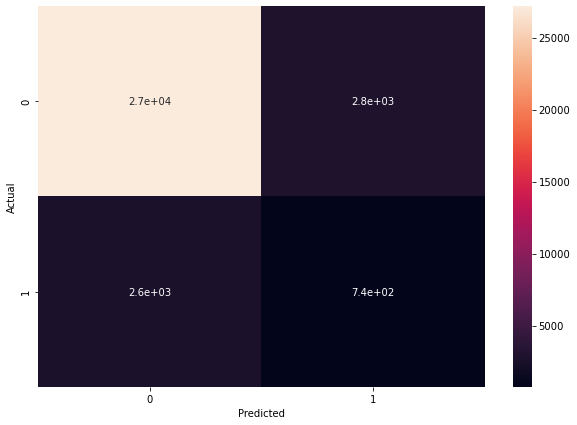


Accuracy     0.837518
TPR          0.222454
FPR          0.093783
Precision    0.209446
Recall       0.222454
F1_Score     0.839682
F2_Score     0.838377
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[27182  2801]
 [ 2626   724]]



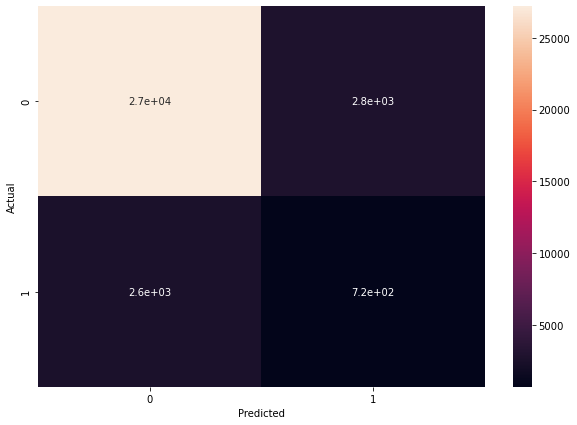


Accuracy     0.837188
TPR          0.216119
FPR          0.093420
Precision    0.205390
Recall       0.216119
F1_Score     0.839022
F2_Score     0.837917
dtype: float64
[[27182  2801]
 [ 2626   724]]



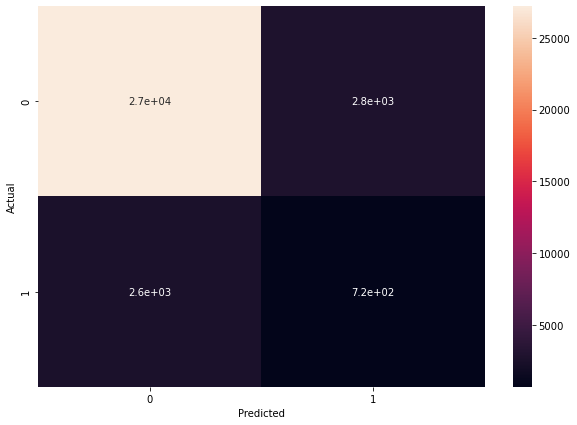


Accuracy     0.837188
TPR          0.216119
FPR          0.093420
Precision    0.205390
Recall       0.216119
F1_Score     0.839022
F2_Score     0.837917
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[27144  2839]
 [ 2660   690]]



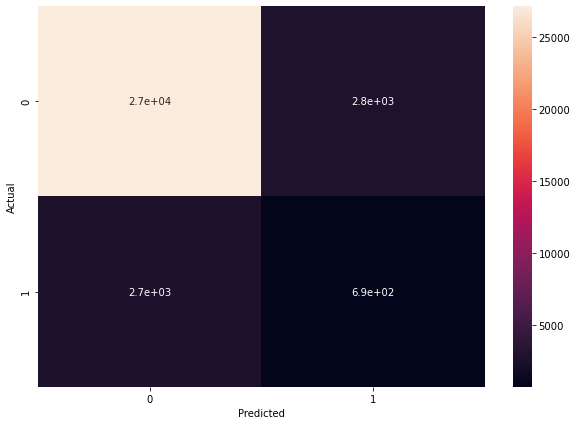


Accuracy     0.835028
TPR          0.205970
FPR          0.094687
Precision    0.195523
Recall       0.205970
F1_Score     0.836928
F2_Score     0.835783
dtype: float64
[[27144  2839]
 [ 2660   690]]



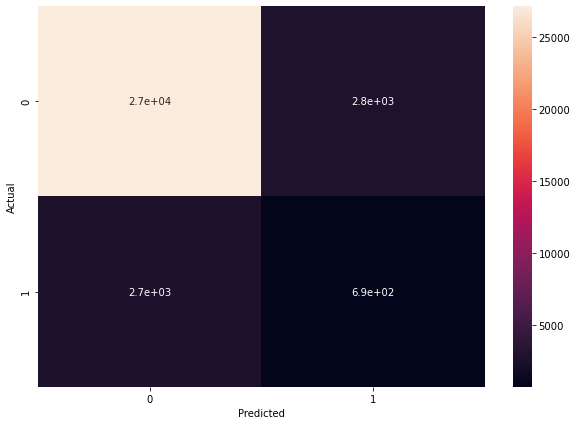


Accuracy     0.835028
TPR          0.205970
FPR          0.094687
Precision    0.195523
Recall       0.205970
F1_Score     0.836928
F2_Score     0.835783
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.56002 
Your CV score is 0.5600211220137998


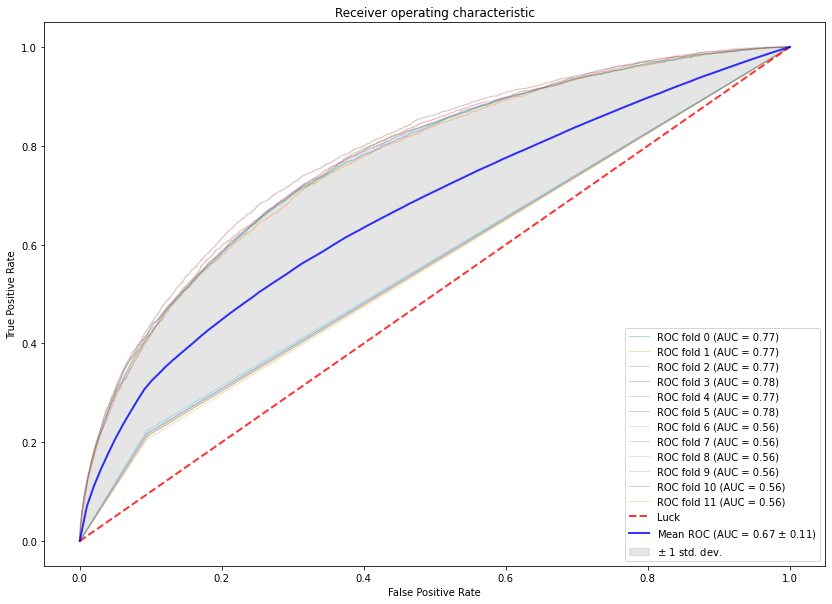

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

folds = StratifiedKFold(n_splits=6, shuffle=False)

auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_dt = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])
    
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        dt.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = dt.predict(X_train.iloc[val_idx])
        probs[val_idx] = dt.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_dt += dt.predict_proba(X_test)[:,1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(dt,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
        
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    


    
sub_preds = (oof)
print('Your CV score is', roc_auc_score(y_train, oof))

plot_roc_curve(fprs, tprs)
sub_preds_test = predictions_dt
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission5.csv', index=False)   

In [32]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.836113  0.834433  0.836558  0.837518  0.837188  0.835028   
TPR        0.217910  0.212836  0.211406  0.222454  0.216119  0.205970   
FPR        0.094817  0.096118  0.093617  0.093783  0.093420  0.094687   
Precision  0.204310  0.198331  0.201422  0.209446  0.205390  0.195523   
Recall     0.217910  0.212836  0.211406  0.222454  0.216119  0.205970   
F1_Score   0.838447  0.837014  0.838308  0.839682  0.839022  0.836928   
F2_Score   0.837038  0.835456  0.837254  0.838377  0.837917  0.835783   

               mean  
Accuracy   0.836140  
TPR        0.214449  
FPR        0.094407  
Precision  0.202404  
Recall     0.214449  
F1_Score   0.838234  
F2_Score   0.836971

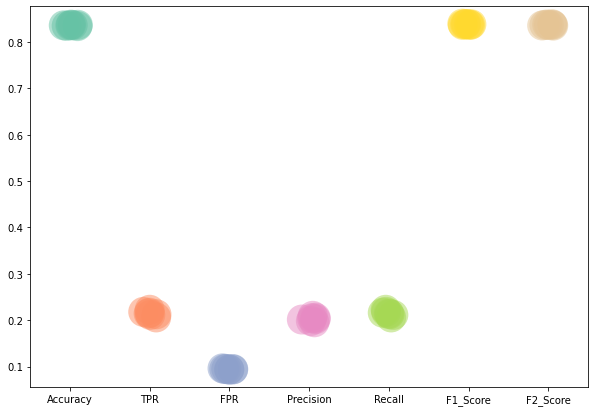

In [33]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [34]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.56002


In [2]:
print('Kaggle accuracy =', 0.68067)

Kaggle accuracy = 0.68067


## SVM 

In [36]:
from sklearn.model_selection import train_test_split
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train, test_size=0.98, random_state=0)

Fold number 1

[[868  35]
 [ 94   3]]



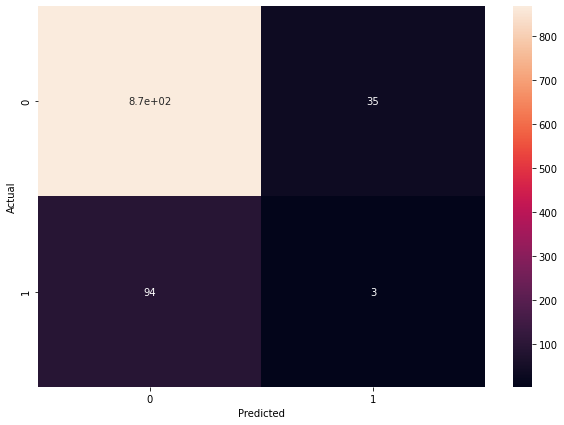


Accuracy     0.871000
TPR          0.030928
FPR          0.038760
Precision    0.078947
Recall       0.030928
F1_Score     0.844852
F2_Score     0.860219
dtype: float64
[[868  35]
 [ 94   3]]



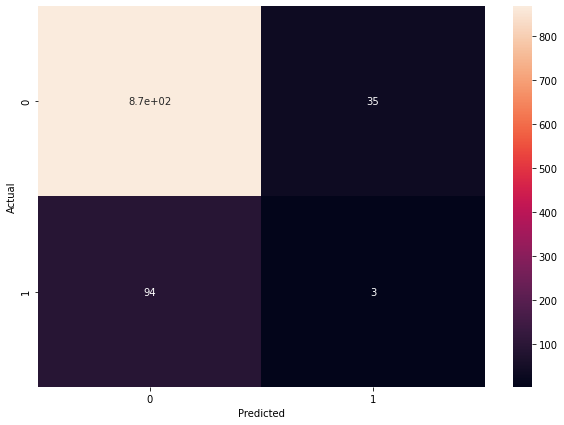


Accuracy     0.871000
TPR          0.030928
FPR          0.038760
Precision    0.078947
Recall       0.030928
F1_Score     0.844852
F2_Score     0.860219
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[857  43]
 [ 99   1]]



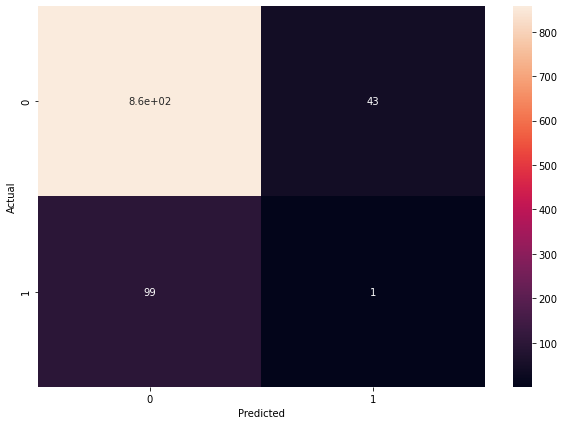


Accuracy     0.858000
TPR          0.010000
FPR          0.047778
Precision    0.022727
Recall       0.010000
F1_Score     0.832531
F2_Score     0.847592
dtype: float64
[[857  43]
 [ 99   1]]



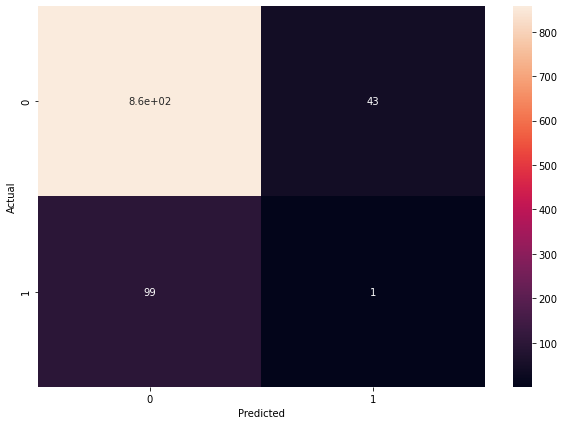


Accuracy     0.858000
TPR          0.010000
FPR          0.047778
Precision    0.022727
Recall       0.010000
F1_Score     0.832531
F2_Score     0.847592
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[854  41]
 [ 97   8]]



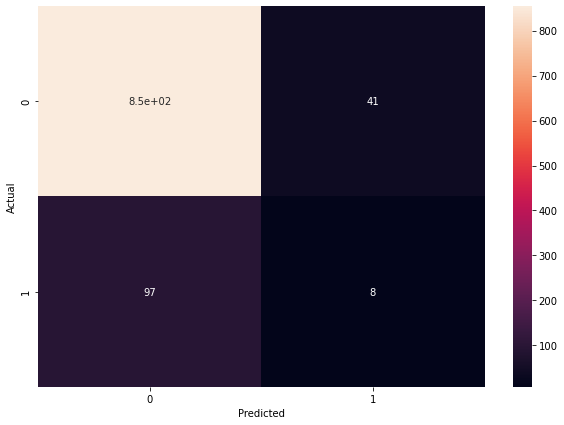


Accuracy     0.862000
TPR          0.076190
FPR          0.045810
Precision    0.163265
Recall       0.076190
F1_Score     0.839002
F2_Score     0.852400
dtype: float64
[[854  41]
 [ 97   8]]



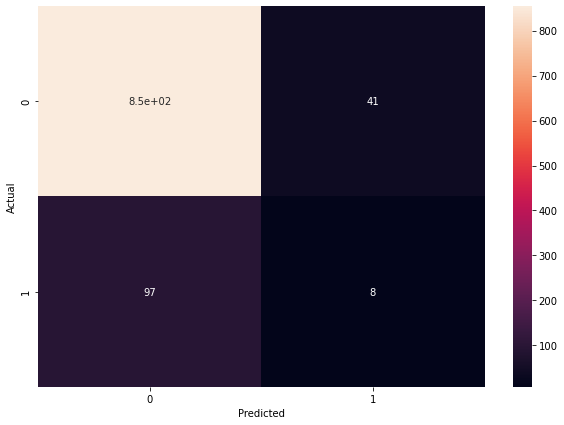


Accuracy     0.862000
TPR          0.076190
FPR          0.045810
Precision    0.163265
Recall       0.076190
F1_Score     0.839002
F2_Score     0.852400
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[854  44]
 [ 98   4]]



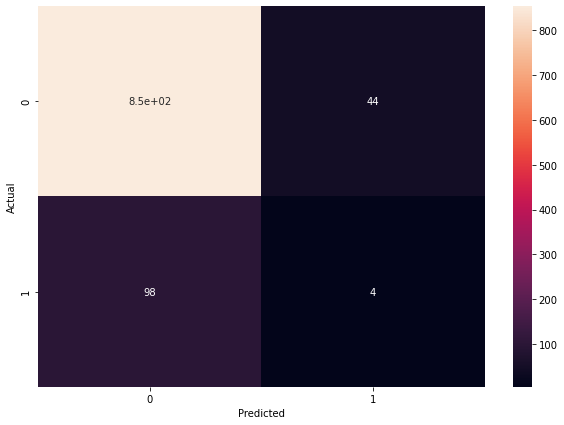


Accuracy     0.858000
TPR          0.039216
FPR          0.048998
Precision    0.083333
Recall       0.039216
F1_Score     0.834512
F2_Score     0.848325
dtype: float64
[[854  44]
 [ 98   4]]



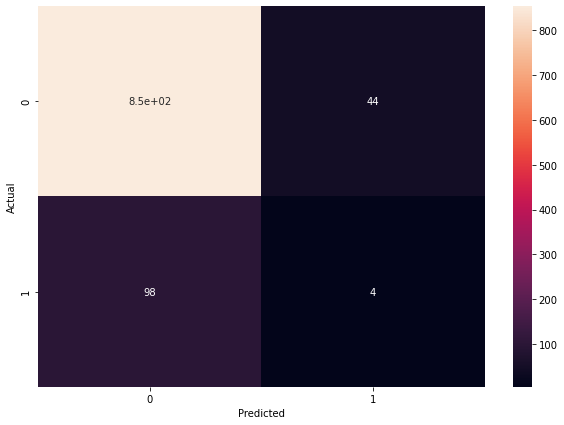


Accuracy     0.858000
TPR          0.039216
FPR          0.048998
Precision    0.083333
Recall       0.039216
F1_Score     0.834512
F2_Score     0.848325
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.60521 


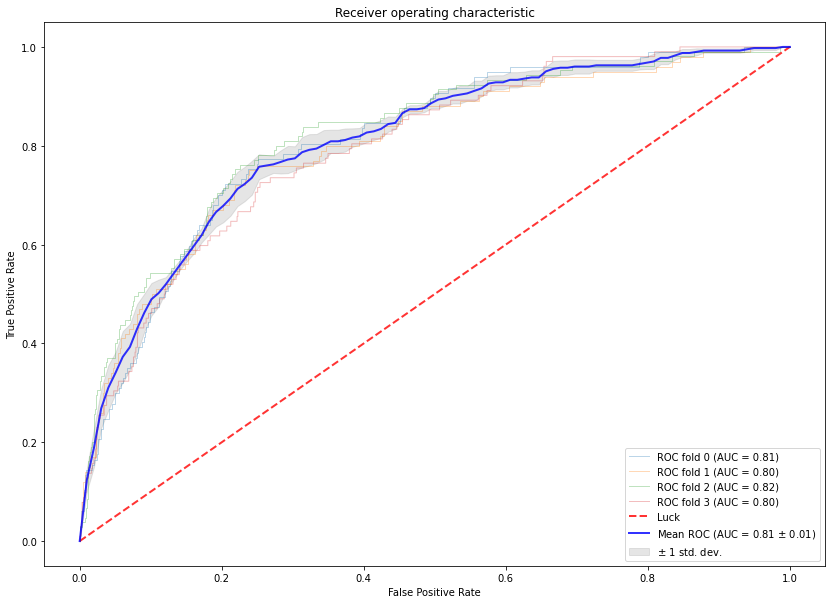

In [37]:
clf_svm = svm.SVC(kernel='linear', C=1, random_state=2319, probability=True)

folds = StratifiedKFold(n_splits=4, shuffle=False)

fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(x_train_s))
probs = np.zeros(len(train))
predictions_svm = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])
    
for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train_s.values, y_train_s.values)):
        print('Fold number {}'.format(fold_ + 1))
        clf_svm.fit(x_train_s.iloc[trn_idx], y_train_s.iloc[trn_idx])
        oof[val_idx] = clf_svm.predict(x_train_s.iloc[val_idx])
        probs[val_idx] = clf_svm.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_svm += clf_svm.predict_proba(X_test)[:, 1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(clf_svm,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()

print("CV score: {:<8.5f}".format(roc_auc_score(y_train_s, oof)))
sub_preds = (oof)

plot_roc_curve(fprs, tprs)
sub_preds_test = predictions_svm
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission6_1.csv', index=False)    

In [38]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4      mean
Accuracy   0.871000  0.858000  0.862000  0.858000  0.862250
TPR        0.030928  0.010000  0.076190  0.039216  0.039083
FPR        0.038760  0.047778  0.045810  0.048998  0.045336
Precision  0.078947  0.022727  0.163265  0.083333  0.087068
Recall     0.030928  0.010000  0.076190  0.039216  0.039083
F1_Score   0.844852  0.832531  0.839002  0.834512  0.837724
F2_Score   0.860219  0.847592  0.852400  0.848325  0.852134

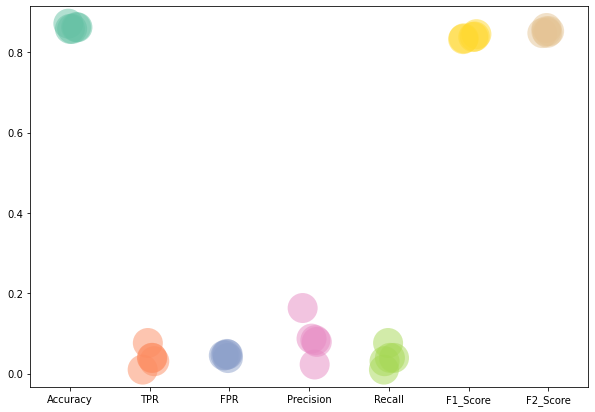

In [39]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [40]:
# Training accuracy and Kaggle accuracy
print('Kaggle accuracy =', 0.82523)

Kaggle accuracy = 0.82523


Fold number 1

[[903   0]
 [ 97   0]]



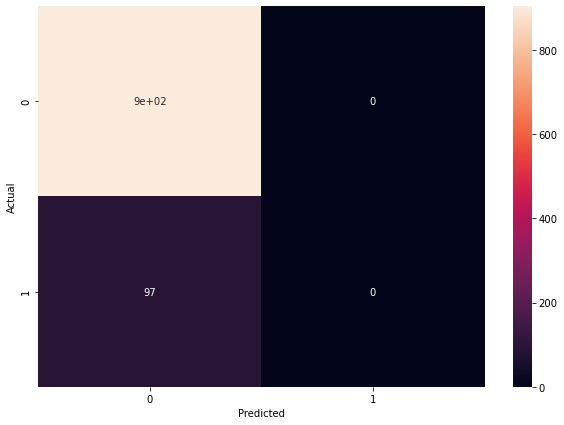


Accuracy     0.903000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.856972
F2_Score     0.884008
dtype: float64
[[903   0]
 [ 97   0]]



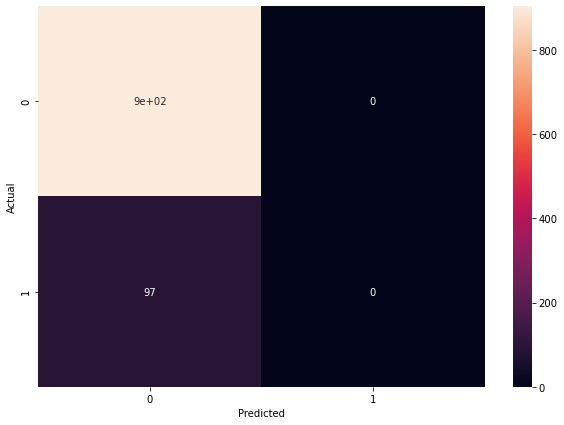


Accuracy     0.903000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.856972
F2_Score     0.884008
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[900   0]
 [100   0]]



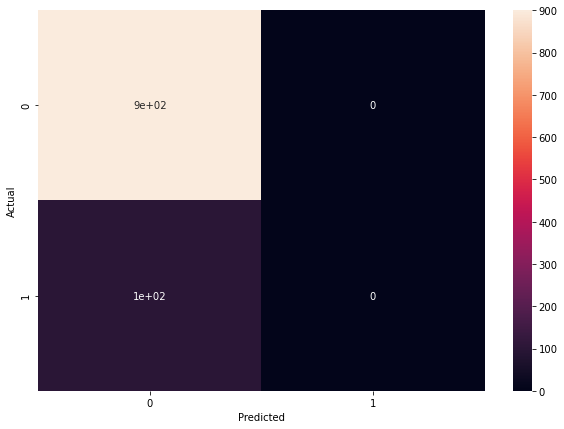


Accuracy     0.900000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.852632
F2_Score     0.880435
dtype: float64
[[900   0]
 [100   0]]



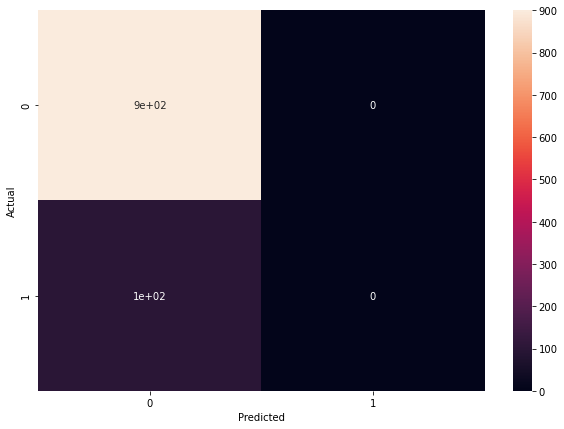


Accuracy     0.900000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.852632
F2_Score     0.880435
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[895   0]
 [105   0]]



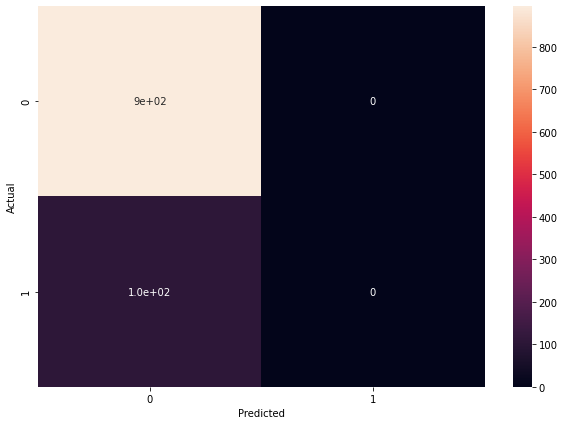


Accuracy     0.895000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.845409
F2_Score     0.874481
dtype: float64
[[895   0]
 [105   0]]



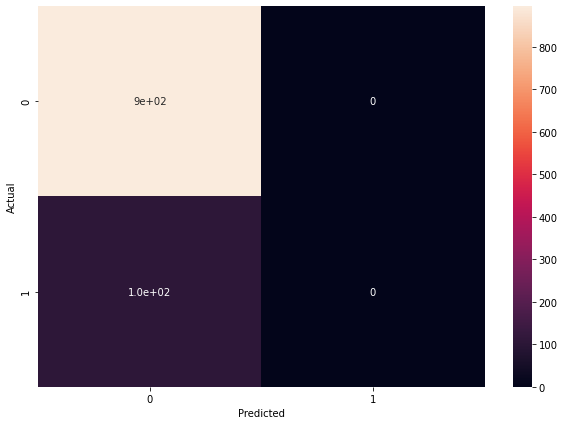


Accuracy     0.895000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.845409
F2_Score     0.874481
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[898   0]
 [102   0]]



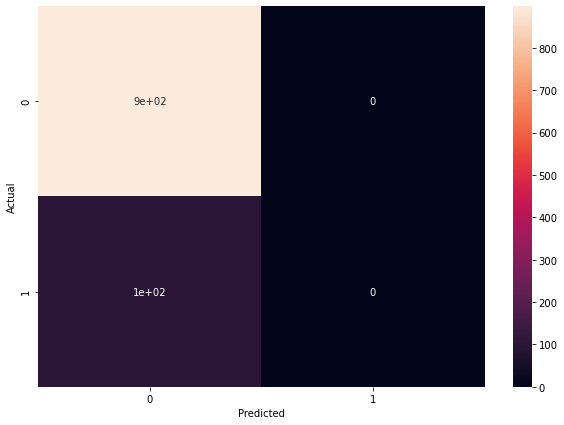


Accuracy     0.898000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.849741
F2_Score     0.878053
dtype: float64
[[898   0]
 [102   0]]



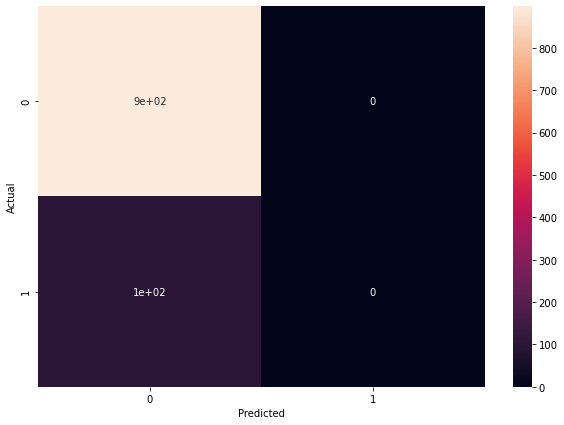


Accuracy     0.898000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.849741
F2_Score     0.878053
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.50000 


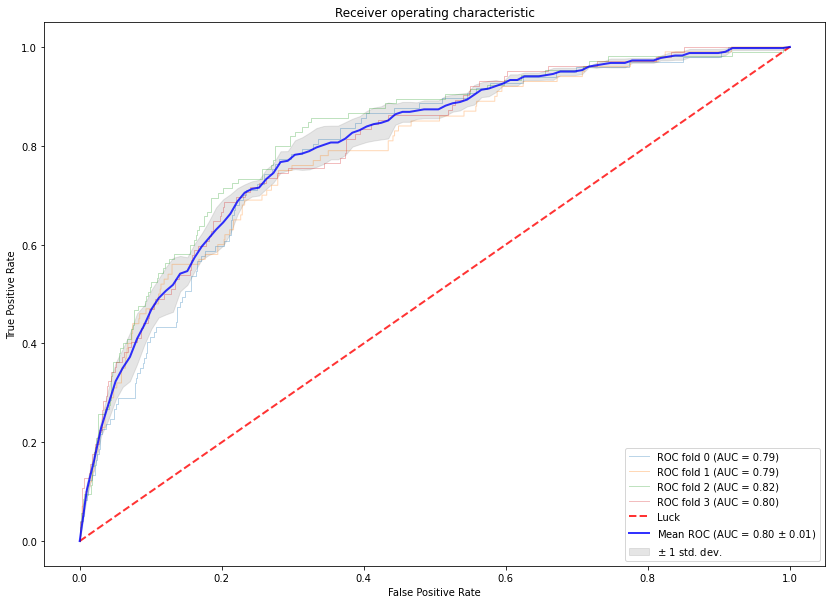

In [41]:
clf_svm = svm.SVC(kernel='sigmoid', C=1, random_state=2319, probability=True)

folds = StratifiedKFold(n_splits=4, shuffle=False)

fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(x_train_s))
probs = np.zeros(len(train))
predictions_svm = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])
    
for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train_s.values, y_train_s.values)):
        print('Fold number {}'.format(fold_ + 1))
        clf_svm.fit(x_train_s.iloc[trn_idx], y_train_s.iloc[trn_idx])
        oof[val_idx] = clf_svm.predict(x_train_s.iloc[val_idx])
        probs[val_idx] = clf_svm.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_svm += clf_svm.predict_proba(X_test)[:, 1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(clf_svm,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()

print("CV score: {:<8.5f}".format(roc_auc_score(y_train_s, oof)))
sub_preds = (oof)

plot_roc_curve(fprs, tprs)
sub_preds_test = predictions_svm
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission6_2.csv', index=False)    

In [42]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4      mean
Accuracy   0.903000  0.900000  0.895000  0.898000  0.899000
TPR        0.000000  0.000000  0.000000  0.000000  0.000000
FPR        0.000000  0.000000  0.000000  0.000000  0.000000
Precision       NaN       NaN       NaN       NaN       NaN
Recall     0.000000  0.000000  0.000000  0.000000  0.000000
F1_Score   0.856972  0.852632  0.845409  0.849741  0.851188
F2_Score   0.884008  0.880435  0.874481  0.878053  0.879244

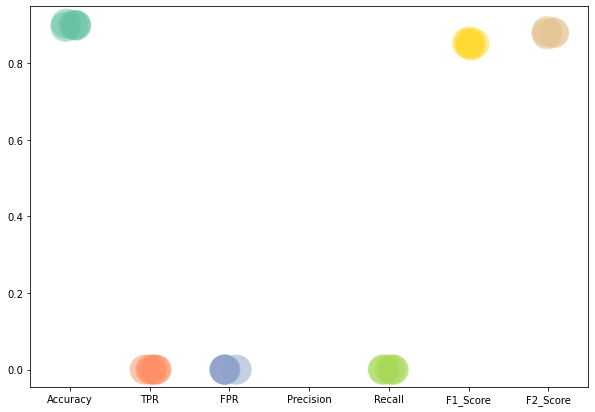

In [43]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [44]:
# Training accuracy and Kaggle accuracy
print('Kaggle accuracy =', 0.82602)

Kaggle accuracy = 0.82602


Fold number 1

[[903   0]
 [ 97   0]]



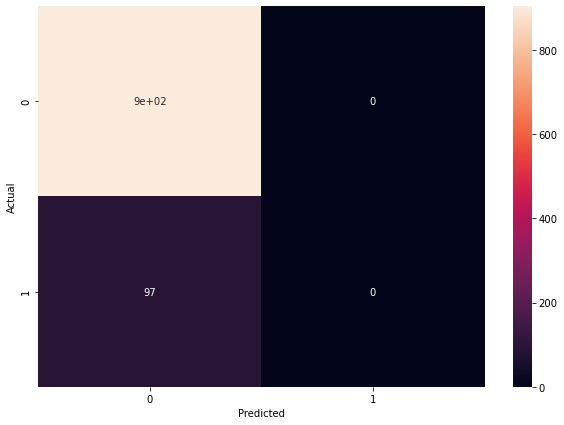


Accuracy     0.903000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.856972
F2_Score     0.884008
dtype: float64
[[903   0]
 [ 97   0]]



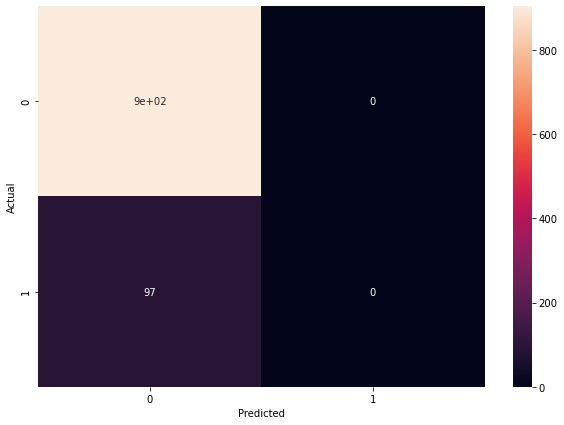


Accuracy     0.903000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.856972
F2_Score     0.884008
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[900   0]
 [100   0]]



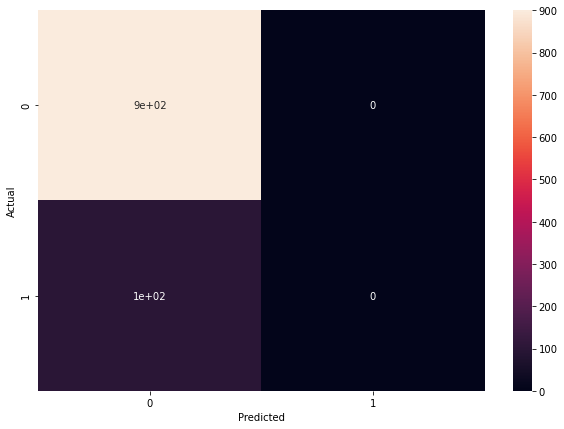


Accuracy     0.900000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.852632
F2_Score     0.880435
dtype: float64
[[900   0]
 [100   0]]



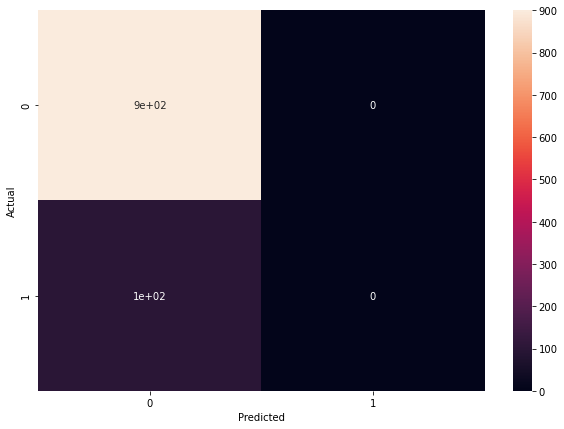


Accuracy     0.900000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.852632
F2_Score     0.880435
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[895   0]
 [105   0]]



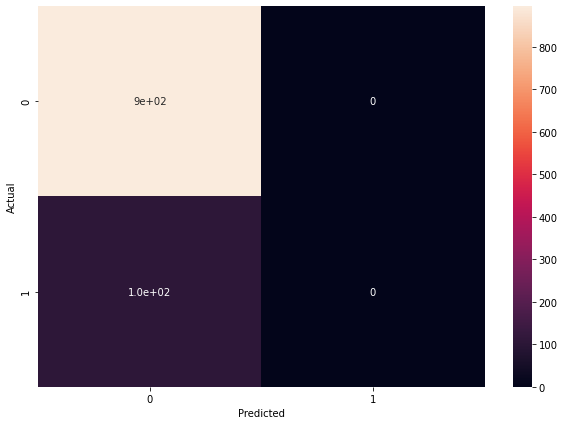


Accuracy     0.895000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.845409
F2_Score     0.874481
dtype: float64
[[895   0]
 [105   0]]



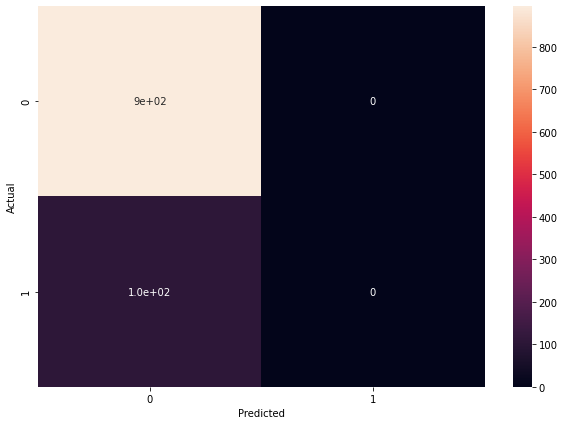


Accuracy     0.895000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.845409
F2_Score     0.874481
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[898   0]
 [102   0]]



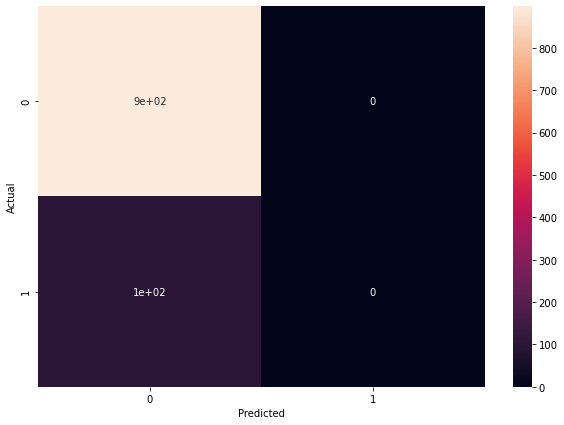


Accuracy     0.898000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.849741
F2_Score     0.878053
dtype: float64
[[898   0]
 [102   0]]



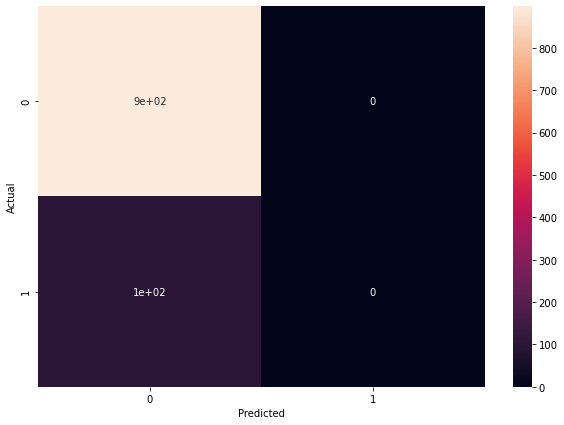


Accuracy     0.898000
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.849741
F2_Score     0.878053
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.50000 


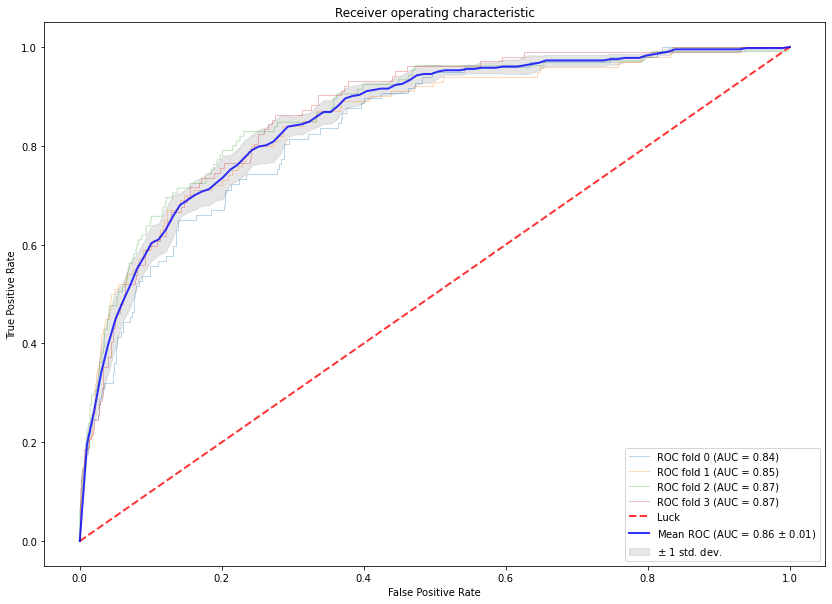

In [45]:
clf_svm = svm.SVC(kernel='rbf', C=1, random_state=2319, probability=True)

folds = StratifiedKFold(n_splits=4, shuffle=False)

fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(x_train_s))
probs = np.zeros(len(train))
predictions_svm = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])
    
for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train_s.values, y_train_s.values)):
        print('Fold number {}'.format(fold_ + 1))
        clf_svm.fit(x_train_s.iloc[trn_idx], y_train_s.iloc[trn_idx])
        oof[val_idx] = clf_svm.predict(x_train_s.iloc[val_idx])
        probs[val_idx] = clf_svm.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_svm += clf_svm.predict_proba(X_test)[:, 1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(clf_svm,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()

print("CV score: {:<8.5f}".format(roc_auc_score(y_train_s, oof)))
sub_preds = (oof)

plot_roc_curve(fprs, tprs)
sub_preds_test = predictions_svm
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission6_3.csv', index=False)    

In [46]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4      mean
Accuracy   0.903000  0.900000  0.895000  0.898000  0.899000
TPR        0.000000  0.000000  0.000000  0.000000  0.000000
FPR        0.000000  0.000000  0.000000  0.000000  0.000000
Precision       NaN       NaN       NaN       NaN       NaN
Recall     0.000000  0.000000  0.000000  0.000000  0.000000
F1_Score   0.856972  0.852632  0.845409  0.849741  0.851188
F2_Score   0.884008  0.880435  0.874481  0.878053  0.879244

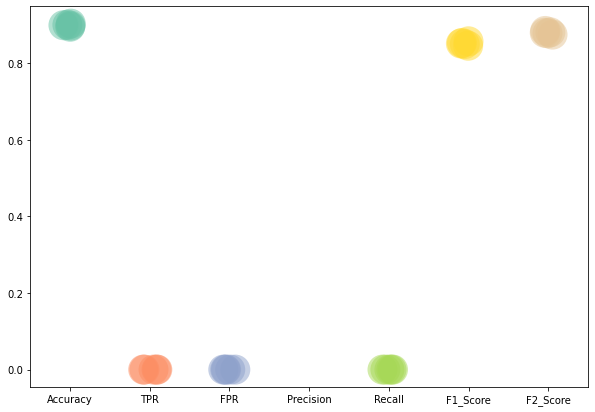

In [47]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [48]:
# Training accuracy and Kaggle accuracy
print('Kaggle accuracy =', 0.85379)

Kaggle accuracy = 0.85379


### Bagging Classifier

In [49]:
cv = StratifiedKFold(n_splits=6, shuffle=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

random_state = 42
leaf_nodes = 5
num_features = 10
num_estimators = 100

In [50]:
base_clf1 = GaussianNB()
base_clf2=DecisionTreeClassifier()
base_clf3= LogisticRegression()
random_state = 42
num_features = 10
num_estimators = 100

In [51]:
# Using Naive Bayes
bclf1 = BaggingClassifier(
  base_clf1,
  n_estimators=200,
  max_samples=1.0,
  max_features=1.0,
  random_state=random_state,
  n_jobs=-1
)

Fold number 1

[[29508   476]
 [ 2137  1213]]



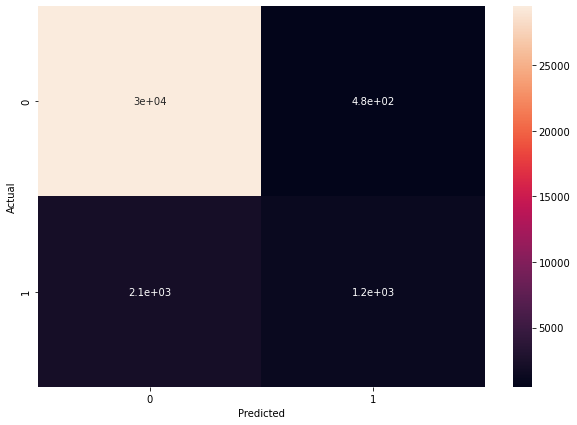


Accuracy     0.921612
TPR          0.362090
FPR          0.015875
Precision    0.718176
Recall       0.362090
F1_Score     0.909748
F2_Score     0.915917
dtype: float64
[[29508   476]
 [ 2137  1213]]



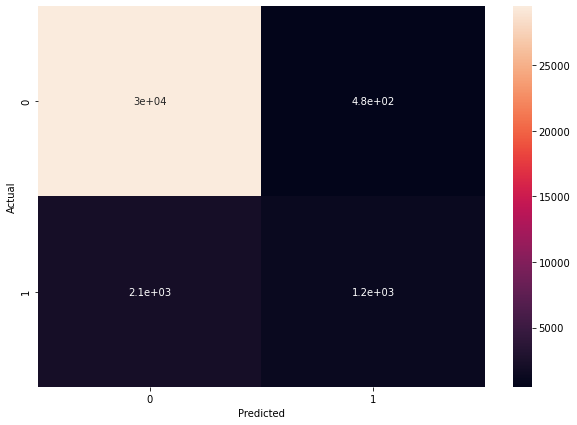


Accuracy     0.921612
TPR          0.362090
FPR          0.015875
Precision    0.718176
Recall       0.362090
F1_Score     0.909748
F2_Score     0.915917
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[29484   500]
 [ 2165  1185]]



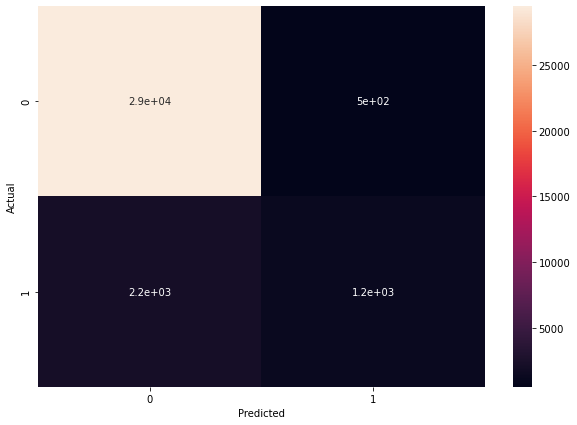


Accuracy     0.920052
TPR          0.353731
FPR          0.016676
Precision    0.703264
Recall       0.353731
F1_Score     0.907913
F2_Score     0.914260
dtype: float64
[[29484   500]
 [ 2165  1185]]



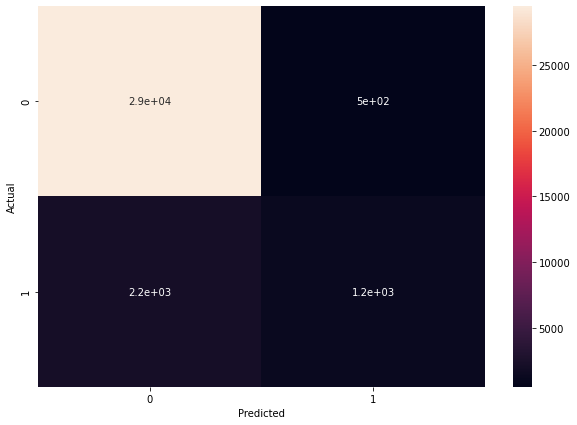


Accuracy     0.920052
TPR          0.353731
FPR          0.016676
Precision    0.703264
Recall       0.353731
F1_Score     0.907913
F2_Score     0.914260
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[29513   471]
 [ 2176  1173]]



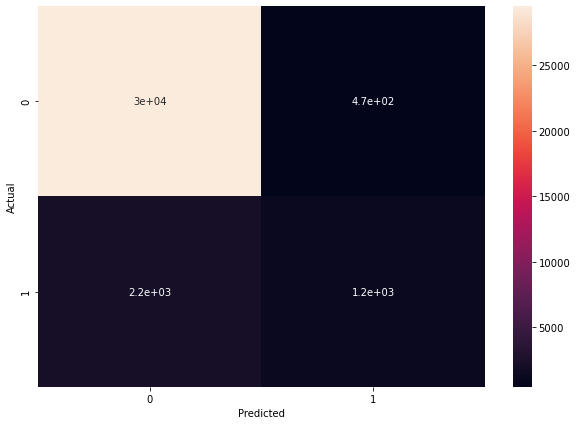


Accuracy     0.920589
TPR          0.350254
FPR          0.015708
Precision    0.713504
Recall       0.350254
F1_Score     0.908128
F2_Score     0.914622
dtype: float64
[[29513   471]
 [ 2176  1173]]



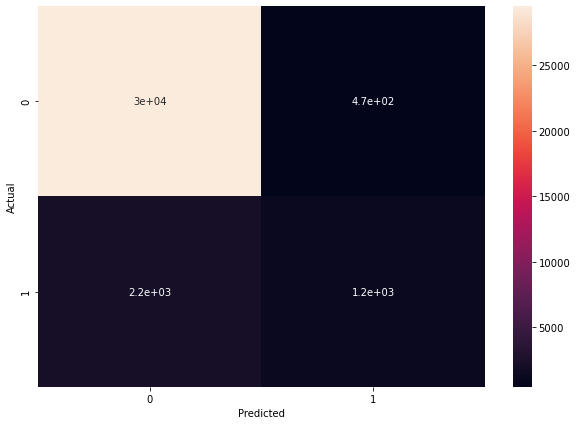


Accuracy     0.920589
TPR          0.350254
FPR          0.015708
Precision    0.713504
Recall       0.350254
F1_Score     0.908128
F2_Score     0.914622
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[29495   489]
 [ 2108  1241]]



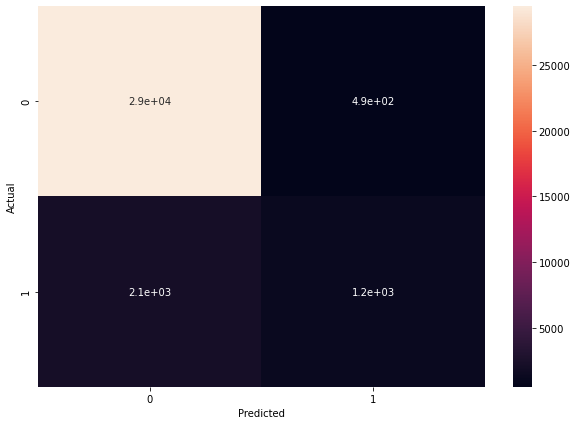


Accuracy     0.922089
TPR          0.370558
FPR          0.016309
Precision    0.717341
Recall       0.370558
F1_Score     0.910696
F2_Score     0.916621
dtype: float64
[[29495   489]
 [ 2108  1241]]



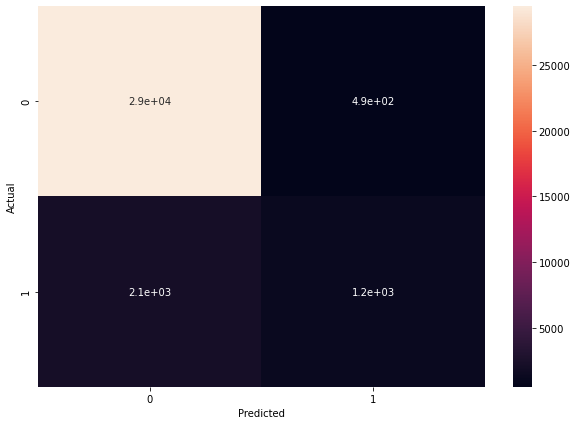


Accuracy     0.922089
TPR          0.370558
FPR          0.016309
Precision    0.717341
Recall       0.370558
F1_Score     0.910696
F2_Score     0.916621
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[29491   492]
 [ 2146  1204]]



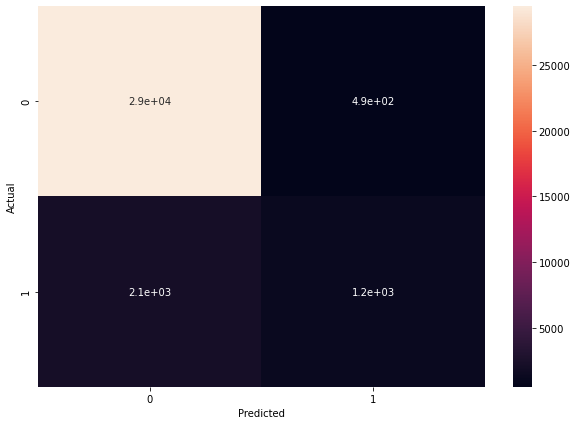


Accuracy     0.920859
TPR          0.359403
FPR          0.016409
Precision    0.709906
Recall       0.359403
F1_Score     0.908951
F2_Score     0.915162
dtype: float64
[[29491   492]
 [ 2146  1204]]



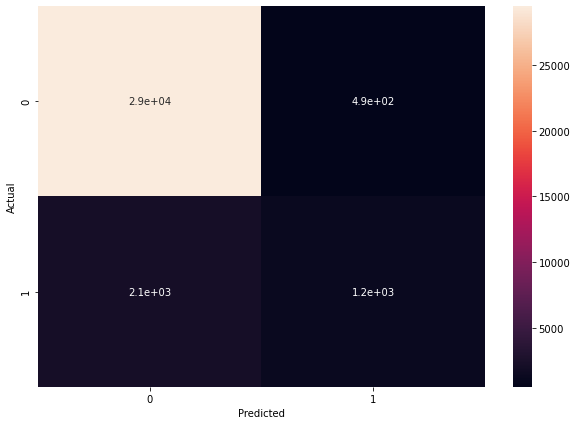


Accuracy     0.920859
TPR          0.359403
FPR          0.016409
Precision    0.709906
Recall       0.359403
F1_Score     0.908951
F2_Score     0.915162
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[29506   477]
 [ 2102  1248]]



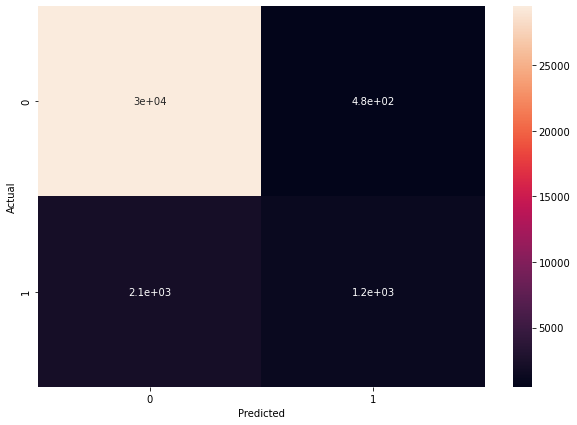


Accuracy     0.922629
TPR          0.372537
FPR          0.015909
Precision    0.723478
Recall       0.372537
F1_Score     0.911263
F2_Score     0.917160
dtype: float64
[[29506   477]
 [ 2102  1248]]



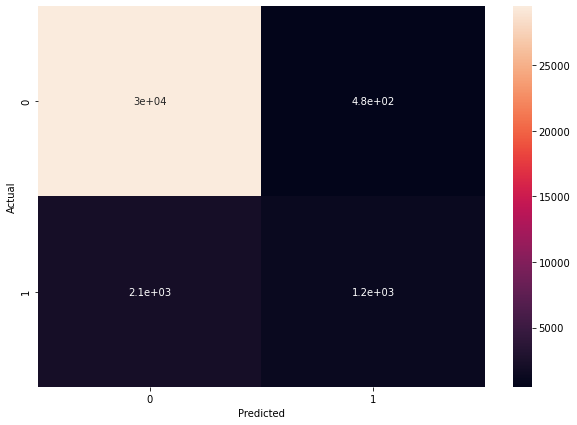


Accuracy     0.922629
TPR          0.372537
FPR          0.015909
Precision    0.723478
Recall       0.372537
F1_Score     0.911263
F2_Score     0.917160
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.67264 


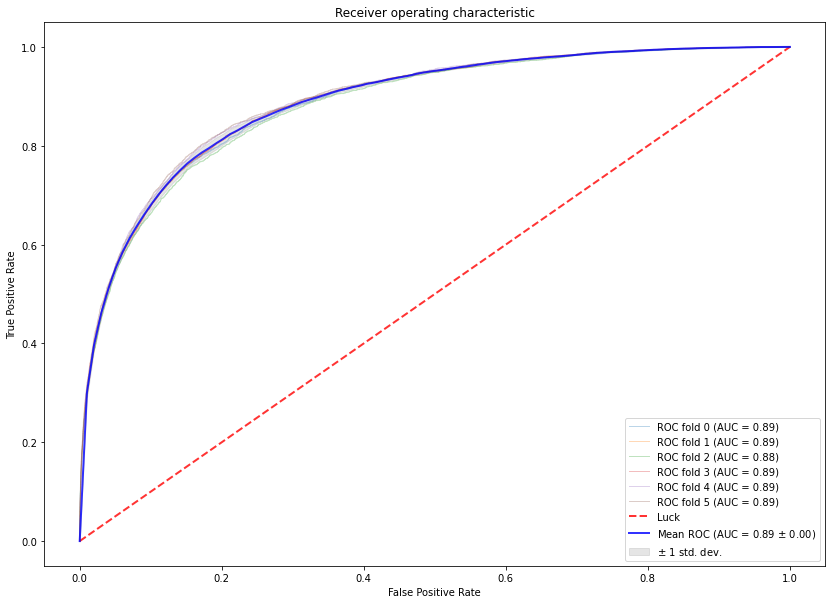

In [52]:
folds = StratifiedKFold(n_splits=6, shuffle=False)


fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_bc1 = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])
    
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        bclf1.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = bclf1.predict(X_train.iloc[val_idx])
        probs[val_idx] = bclf1.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_bc1 += bclf1.predict_proba(X_test)[:, 1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(bclf1,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    
sub_preds = (oof)

plot_roc_curve(fprs, tprs)

sub_preds_test = predictions_bc1
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission7.csv', index=False)

In [53]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.921612  0.920052  0.920589  0.922089  0.920859  0.922629   
TPR        0.362090  0.353731  0.350254  0.370558  0.359403  0.372537   
FPR        0.015875  0.016676  0.015708  0.016309  0.016409  0.015909   
Precision  0.718176  0.703264  0.713504  0.717341  0.709906  0.723478   
Recall     0.362090  0.353731  0.350254  0.370558  0.359403  0.372537   
F1_Score   0.909748  0.907913  0.908128  0.910696  0.908951  0.911263   
F2_Score   0.915917  0.914260  0.914622  0.916621  0.915162  0.917160   

               mean  
Accuracy   0.921305  
TPR        0.361429  
FPR        0.016148  
Precision  0.714278  
Recall     0.361429  
F1_Score   0.909450  
F2_Score   0.915624

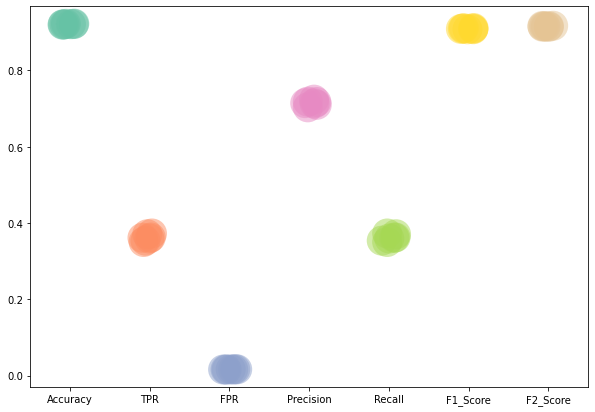

In [54]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [55]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.67264


In [3]:
print('Kaggle accuracy =', 0.88846)

Kaggle accuracy = 0.88846


In [57]:
# using logistic regression
bclf2 = BaggingClassifier(
  base_clf3,
  n_estimators=100,
  max_samples=1.0,
  max_features=1.0,
  random_state=random_state,
  n_jobs=-1
)

Fold number 1

[[29536   448]
 [ 2451   899]]



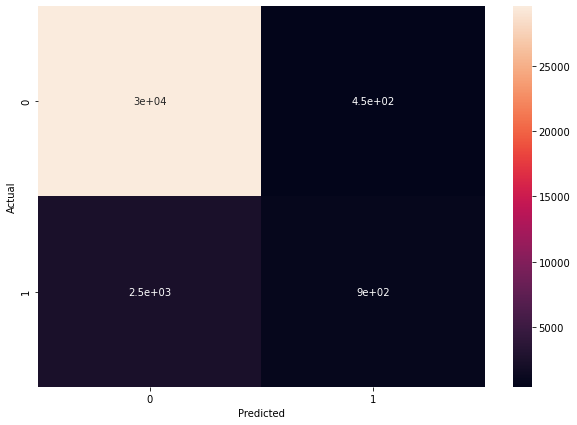


Accuracy     0.913032
TPR          0.268358
FPR          0.014941
Precision    0.667409
Recall       0.268358
F1_Score     0.895894
F2_Score     0.905013
dtype: float64
[[29536   448]
 [ 2451   899]]



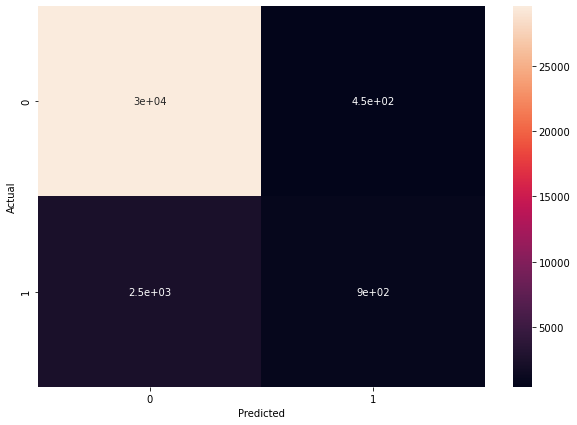


Accuracy     0.913032
TPR          0.268358
FPR          0.014941
Precision    0.667409
Recall       0.268358
F1_Score     0.895894
F2_Score     0.905013
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[29568   416]
 [ 2436   914]]



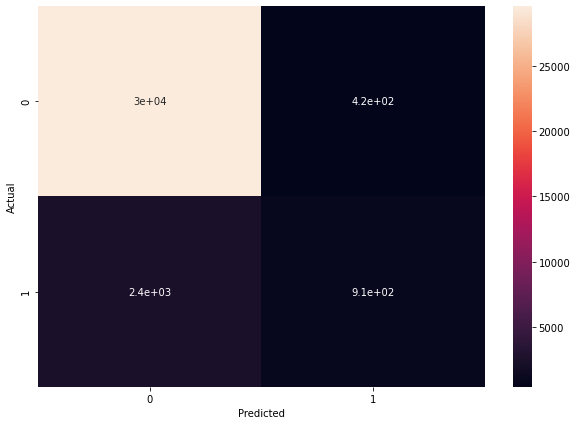


Accuracy     0.914442
TPR          0.272836
FPR          0.013874
Precision    0.687218
Recall       0.272836
F1_Score     0.897371
F2_Score     0.906409
dtype: float64
[[29568   416]
 [ 2436   914]]



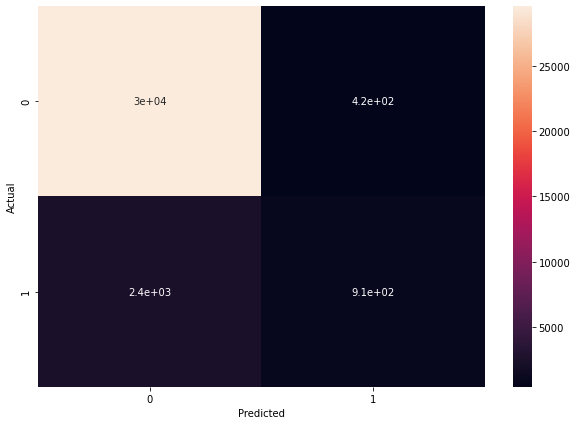


Accuracy     0.914442
TPR          0.272836
FPR          0.013874
Precision    0.687218
Recall       0.272836
F1_Score     0.897371
F2_Score     0.906409
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[29573   411]
 [ 2453   896]]



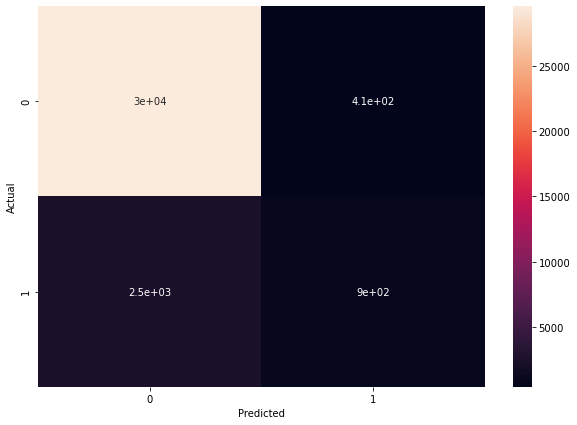


Accuracy     0.914079
TPR          0.267543
FPR          0.013707
Precision    0.685539
Recall       0.267543
F1_Score     0.896653
F2_Score     0.905891
dtype: float64
[[29573   411]
 [ 2453   896]]



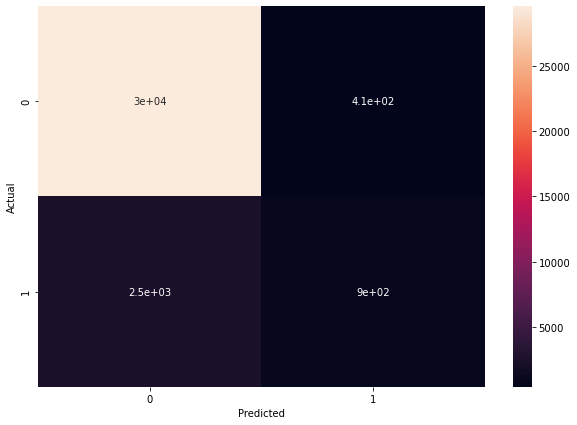


Accuracy     0.914079
TPR          0.267543
FPR          0.013707
Precision    0.685539
Recall       0.267543
F1_Score     0.896653
F2_Score     0.905891
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[29555   429]
 [ 2419   930]]



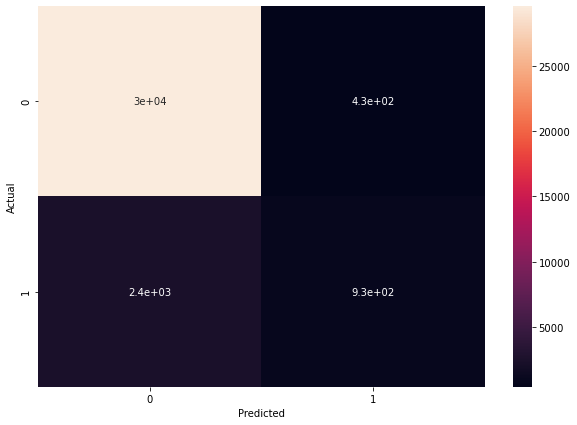


Accuracy     0.914559
TPR          0.277695
FPR          0.014308
Precision    0.684327
Recall       0.277695
F1_Score     0.897874
F2_Score     0.906707
dtype: float64
[[29555   429]
 [ 2419   930]]



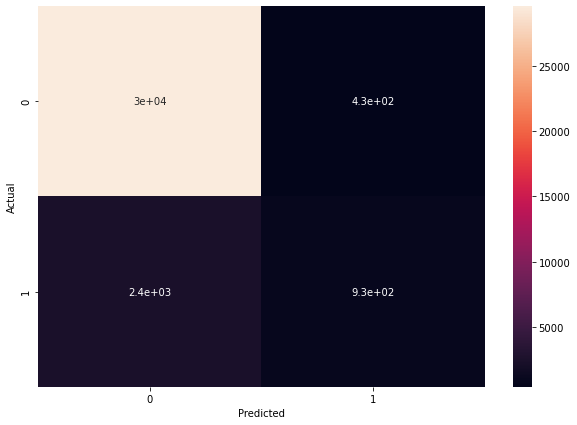


Accuracy     0.914559
TPR          0.277695
FPR          0.014308
Precision    0.684327
Recall       0.277695
F1_Score     0.897874
F2_Score     0.906707
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[29611   372]
 [ 2478   872]]



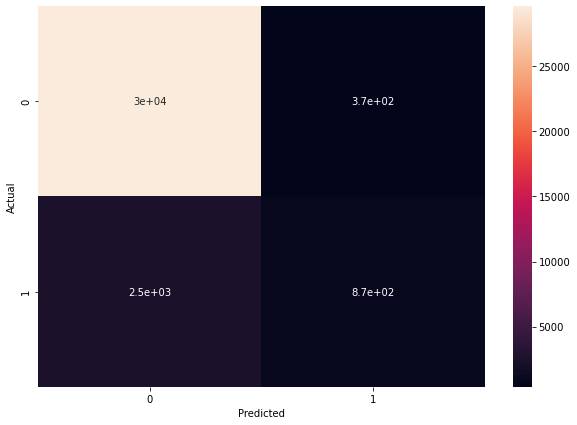


Accuracy     0.914499
TPR          0.260299
FPR          0.012407
Precision    0.700965
Recall       0.260299
F1_Score     0.896352
F2_Score     0.905955
dtype: float64
[[29611   372]
 [ 2478   872]]



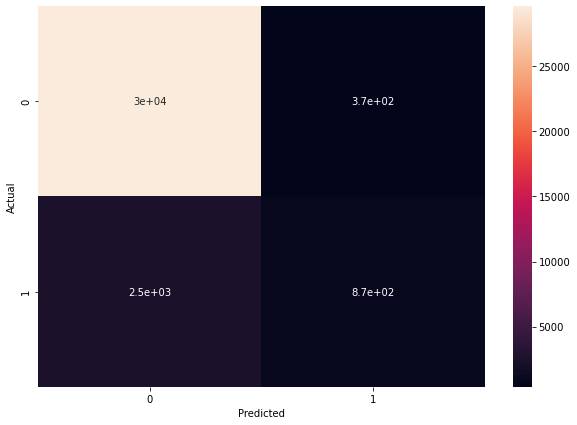


Accuracy     0.914499
TPR          0.260299
FPR          0.012407
Precision    0.700965
Recall       0.260299
F1_Score     0.896352
F2_Score     0.905955
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[29585   398]
 [ 2437   913]]



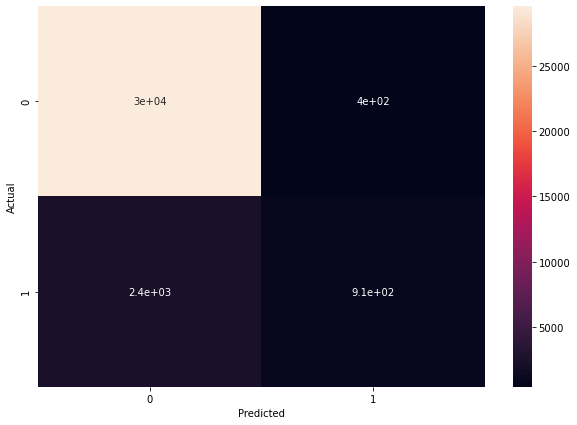


Accuracy     0.914949
TPR          0.272537
FPR          0.013274
Precision    0.696415
Recall       0.272537
F1_Score     0.897744
F2_Score     0.906836
dtype: float64
[[29585   398]
 [ 2437   913]]



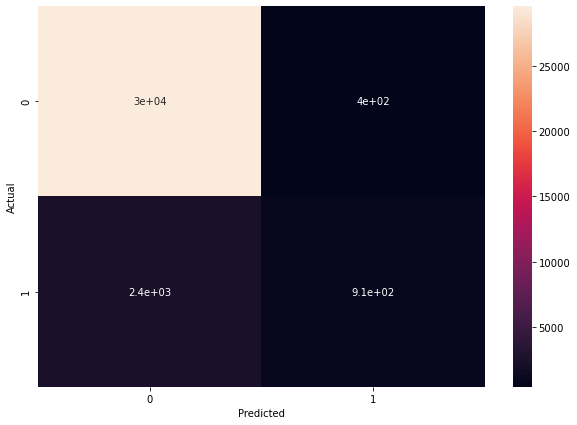


Accuracy     0.914949
TPR          0.272537
FPR          0.013274
Precision    0.696415
Recall       0.272537
F1_Score     0.897744
F2_Score     0.906836
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.62806 


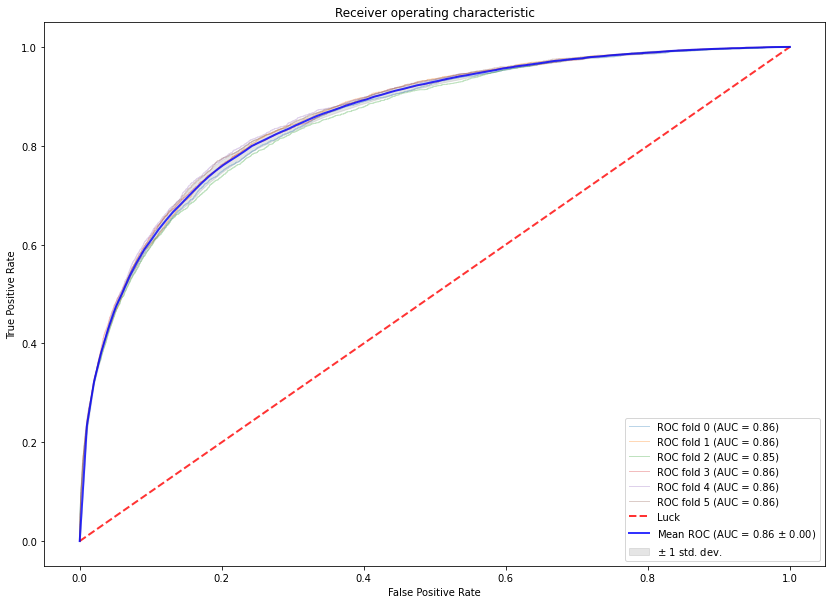

In [58]:
folds = StratifiedKFold(n_splits=6, shuffle=False)



fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_bc2 = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])
    
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        bclf2.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = bclf2.predict(X_train.iloc[val_idx])
        probs[val_idx] = bclf1.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_bc2 += bclf2.predict_proba(X_test)[:,1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(bclf2,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))

sub_preds = (oof)

plot_roc_curve(fprs, tprs)

sub_preds_test = predictions_bc2
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission8.csv', index=False)

In [59]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.913032  0.914442  0.914079  0.914559  0.914499  0.914949   
TPR        0.268358  0.272836  0.267543  0.277695  0.260299  0.272537   
FPR        0.014941  0.013874  0.013707  0.014308  0.012407  0.013274   
Precision  0.667409  0.687218  0.685539  0.684327  0.700965  0.696415   
Recall     0.268358  0.272836  0.267543  0.277695  0.260299  0.272537   
F1_Score   0.895894  0.897371  0.896653  0.897874  0.896352  0.897744   
F2_Score   0.905013  0.906409  0.905891  0.906707  0.905955  0.906836   

               mean  
Accuracy   0.914260  
TPR        0.269878  
FPR        0.013752  
Precision  0.686979  
Recall     0.269878  
F1_Score   0.896981  
F2_Score   0.906135

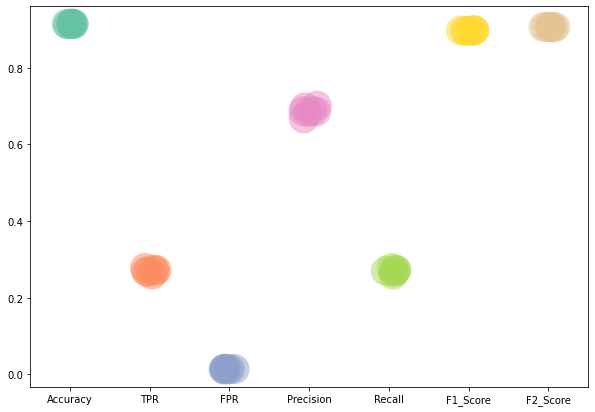

In [60]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [61]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.62806


In [4]:
print('Kaggle accuracy =', 0.86099)

Kaggle accuracy = 0.86099


### AdaBoost

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
model = AdaBoostClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True)

Fold number 1

[[29984     0]
 [ 3350     0]]



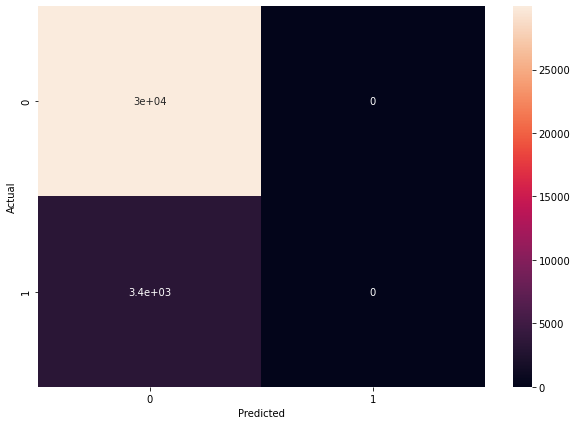


Accuracy     0.899502
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851912
F2_Score     0.879842
dtype: float64
[[29984     0]
 [ 3350     0]]



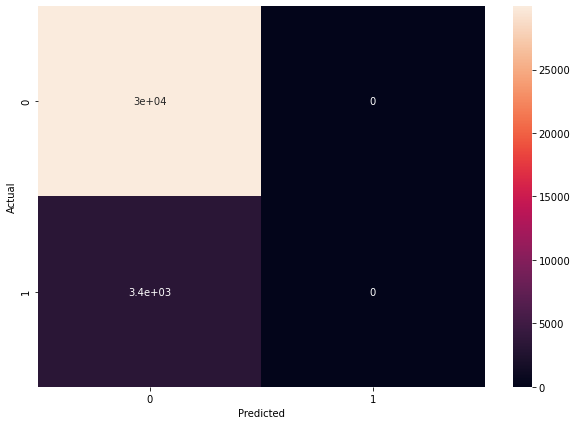


Accuracy     0.899502
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851912
F2_Score     0.879842
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[29984     0]
 [ 3350     0]]



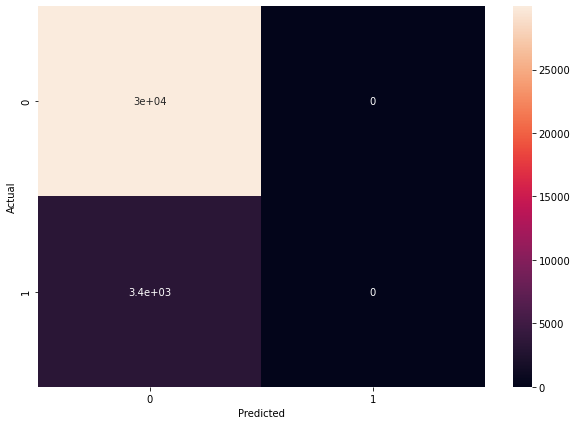


Accuracy     0.899502
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851912
F2_Score     0.879842
dtype: float64
[[29984     0]
 [ 3350     0]]



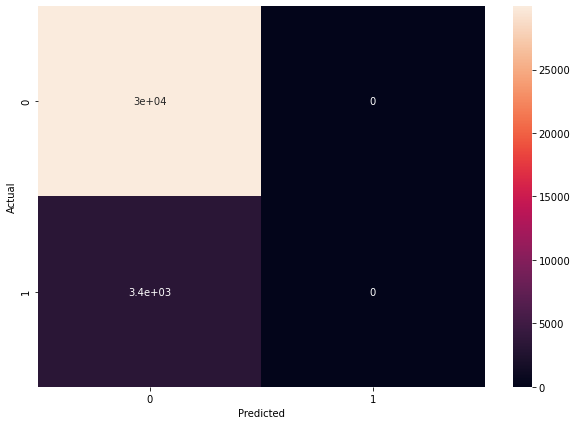


Accuracy     0.899502
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851912
F2_Score     0.879842
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[29984     0]
 [ 3349     0]]



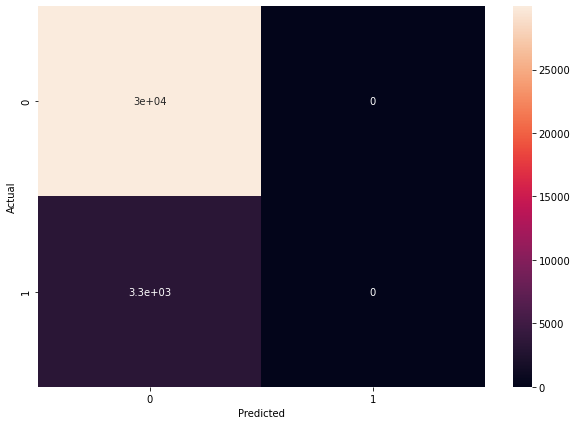


Accuracy     0.899529
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851951
F2_Score     0.879874
dtype: float64
[[29984     0]
 [ 3349     0]]



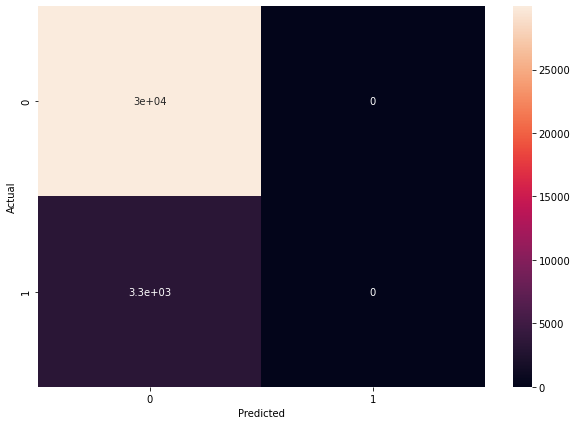


Accuracy     0.899529
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851951
F2_Score     0.879874
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[29984     0]
 [ 3349     0]]



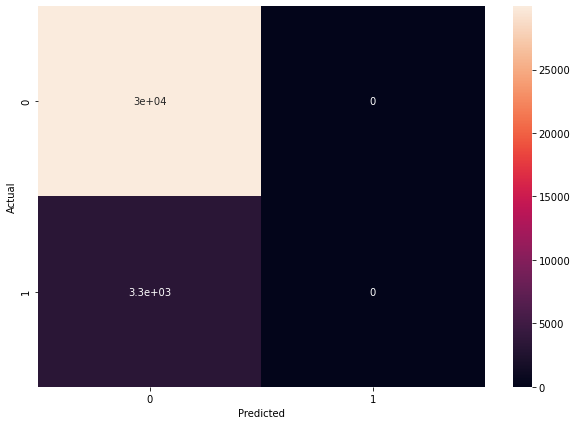


Accuracy     0.899529
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851951
F2_Score     0.879874
dtype: float64
[[29984     0]
 [ 3349     0]]



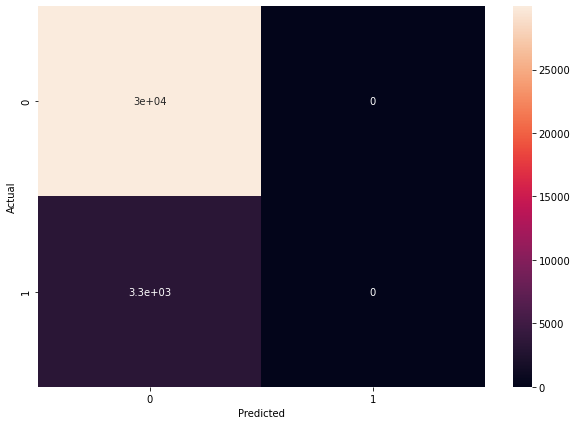


Accuracy     0.899529
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851951
F2_Score     0.879874
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[29983     0]
 [ 3350     0]]



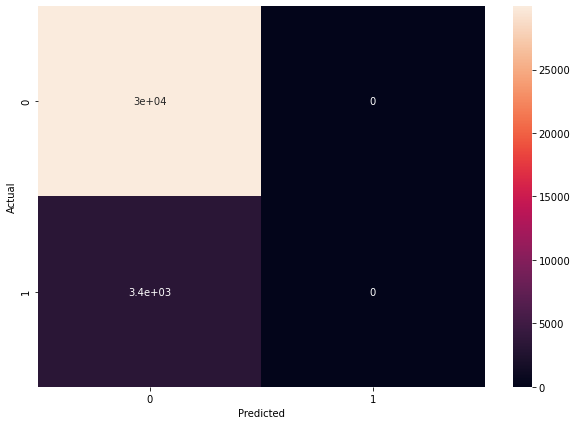


Accuracy     0.899499
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851907
F2_Score     0.879838
dtype: float64
[[29983     0]
 [ 3350     0]]



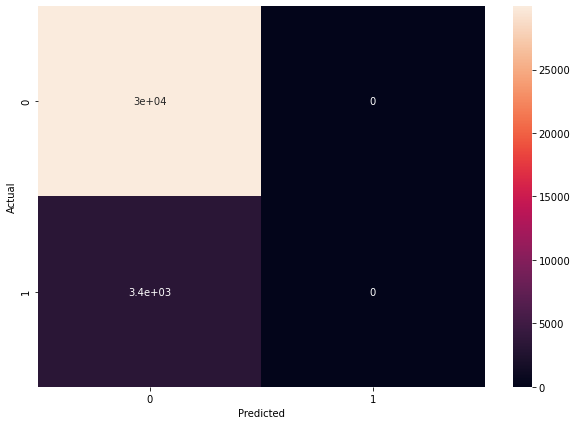


Accuracy     0.899499
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851907
F2_Score     0.879838
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[29983     0]
 [ 3350     0]]



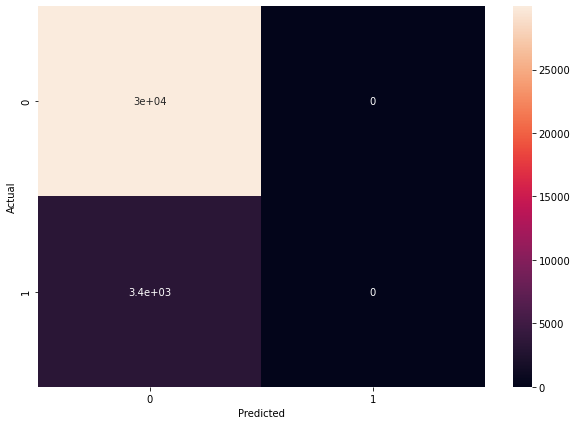


Accuracy     0.899499
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851907
F2_Score     0.879838
dtype: float64
[[29983     0]
 [ 3350     0]]



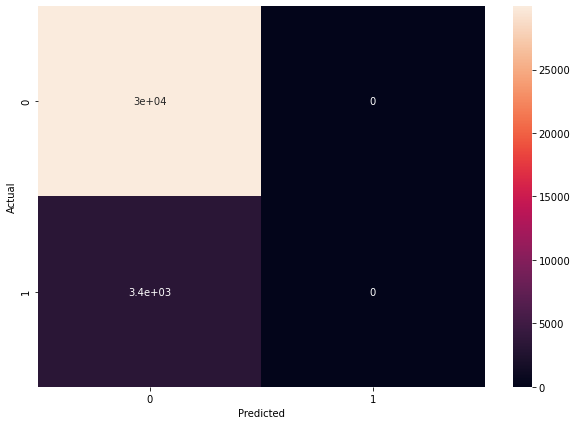


Accuracy     0.899499
TPR          0.000000
FPR          0.000000
Precision         NaN
Recall       0.000000
F1_Score     0.851907
F2_Score     0.879838
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.50000 


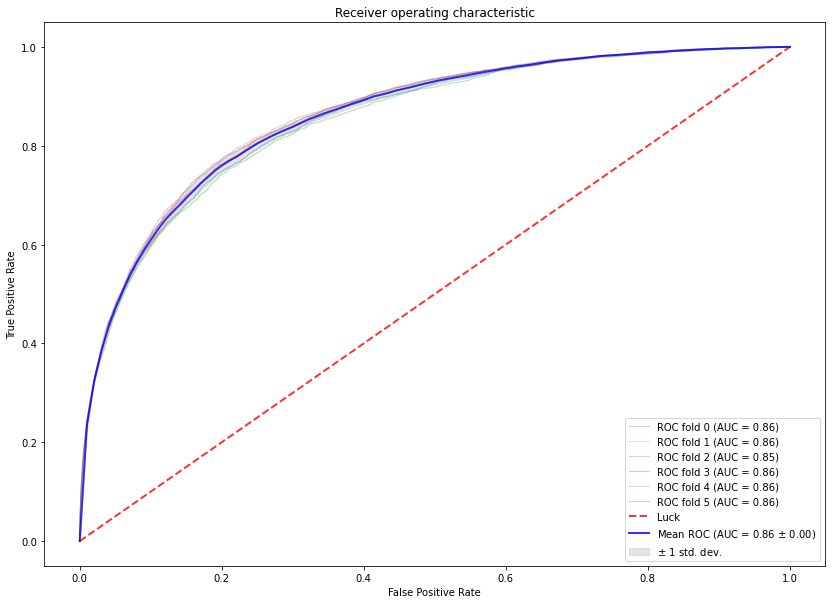

In [64]:
# logistic base model

lr=LogisticRegression()
adaclf = AdaBoostClassifier(base_estimator=lr,learning_rate=0.01)
folds = StratifiedKFold(n_splits=6, shuffle=False)

fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_ab1 = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])
  
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        adaclf.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = adaclf.predict(X_train.iloc[val_idx])
        probs[val_idx] = adaclf.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_ab1 += adaclf.predict_proba(X_test)[:,1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(adaclf,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    
sub_preds = (oof)

plot_roc_curve(fprs, tprs)

sub_preds_test = predictions_ab1
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission9_1.csv', index=False)

In [65]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.899502  0.899502  0.899529  0.899529  0.899499  0.899499   
TPR        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
FPR        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Precision       NaN       NaN       NaN       NaN       NaN       NaN   
Recall     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
F1_Score   0.851912  0.851912  0.851951  0.851951  0.851907  0.851907   
F2_Score   0.879842  0.879842  0.879874  0.879874  0.879838  0.879838   

               mean  
Accuracy   0.899510  
TPR        0.000000  
FPR        0.000000  
Precision       NaN  
Recall     0.000000  
F1_Score   0.851923  
F2_Score   0.879851

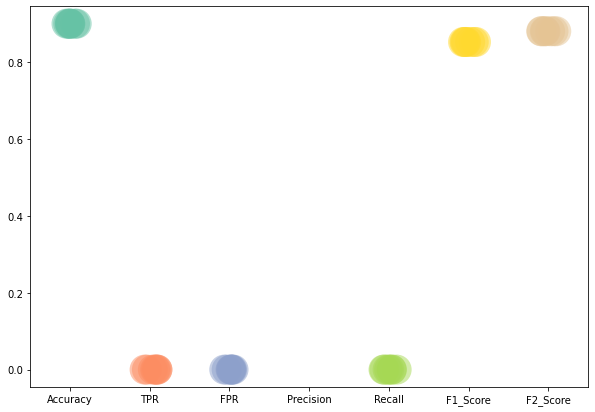

In [66]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [67]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.5


In [5]:
print('Kaggle accuracy =', 0.86141)

Kaggle accuracy = 0.86141


Fold number 1

[[29515   469]
 [ 2131  1219]]



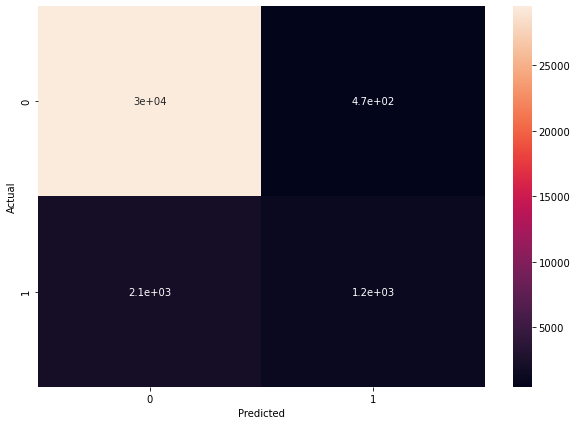


Accuracy     0.922002
TPR          0.363881
FPR          0.015642
Precision    0.722156
Recall       0.363881
F1_Score     0.910188
F2_Score     0.916322
dtype: float64
[[29515   469]
 [ 2131  1219]]



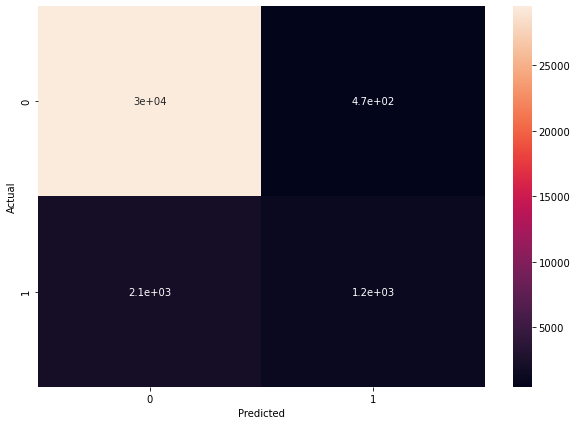


Accuracy     0.922002
TPR          0.363881
FPR          0.015642
Precision    0.722156
Recall       0.363881
F1_Score     0.910188
F2_Score     0.916322
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[29483   501]
 [ 2163  1187]]



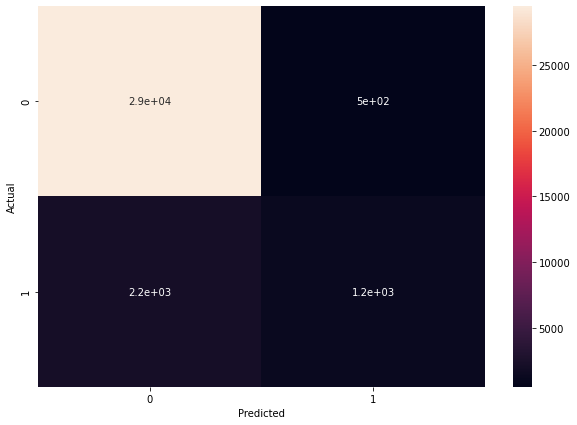


Accuracy     0.920082
TPR          0.354328
FPR          0.016709
Precision    0.703199
Recall       0.354328
F1_Score     0.907977
F2_Score     0.914306
dtype: float64
[[29483   501]
 [ 2163  1187]]



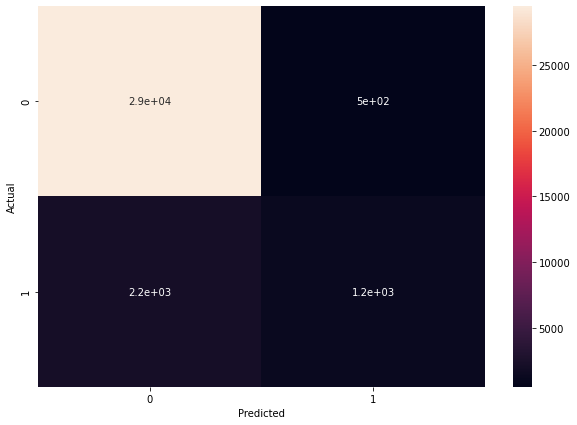


Accuracy     0.920082
TPR          0.354328
FPR          0.016709
Precision    0.703199
Recall       0.354328
F1_Score     0.907977
F2_Score     0.914306
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[29516   468]
 [ 2174  1175]]



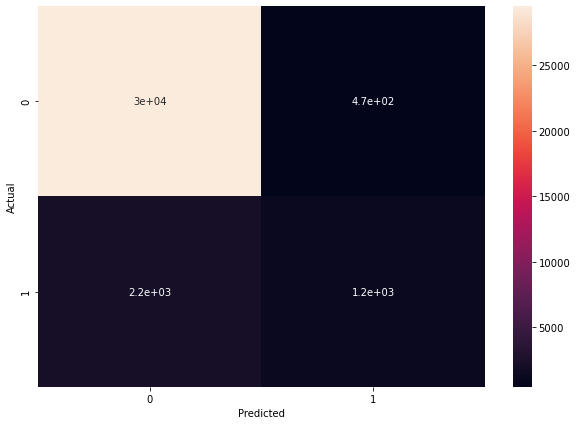


Accuracy     0.920739
TPR          0.350851
FPR          0.015608
Precision    0.715155
Recall       0.350851
F1_Score     0.908292
F2_Score     0.914775
dtype: float64
[[29516   468]
 [ 2174  1175]]



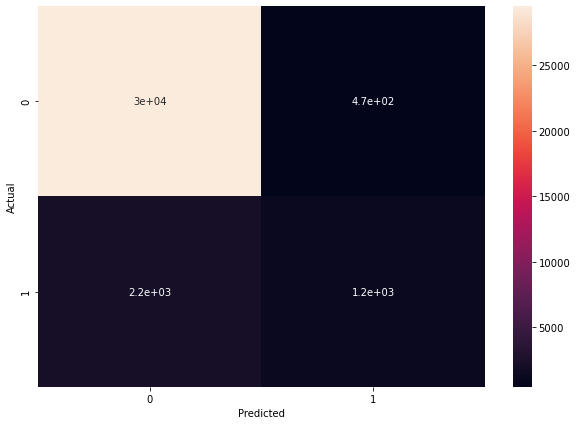


Accuracy     0.920739
TPR          0.350851
FPR          0.015608
Precision    0.715155
Recall       0.350851
F1_Score     0.908292
F2_Score     0.914775
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[29496   488]
 [ 2103  1246]]



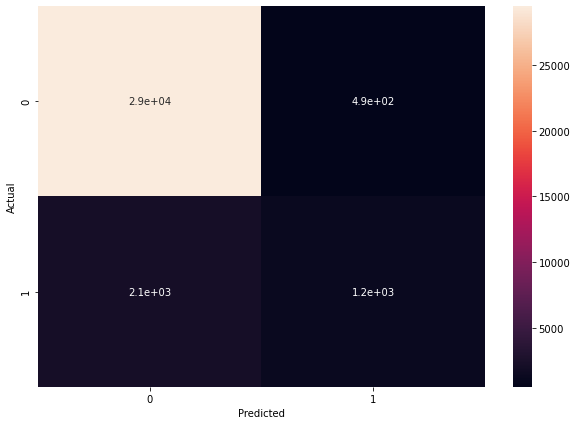


Accuracy     0.922269
TPR          0.372051
FPR          0.016275
Precision    0.718570
Recall       0.372051
F1_Score     0.910940
F2_Score     0.916828
dtype: float64
[[29496   488]
 [ 2103  1246]]



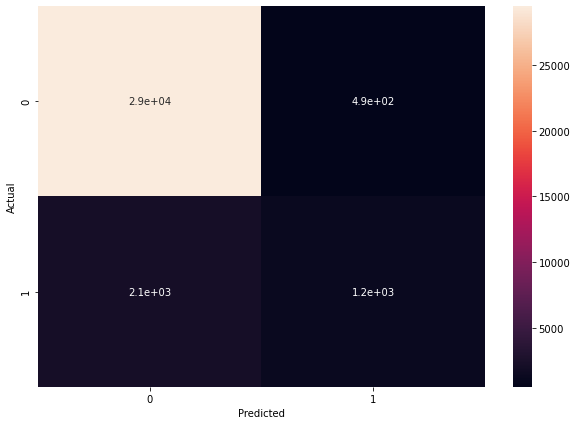


Accuracy     0.922269
TPR          0.372051
FPR          0.016275
Precision    0.718570
Recall       0.372051
F1_Score     0.910940
F2_Score     0.916828
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[29490   493]
 [ 2145  1205]]



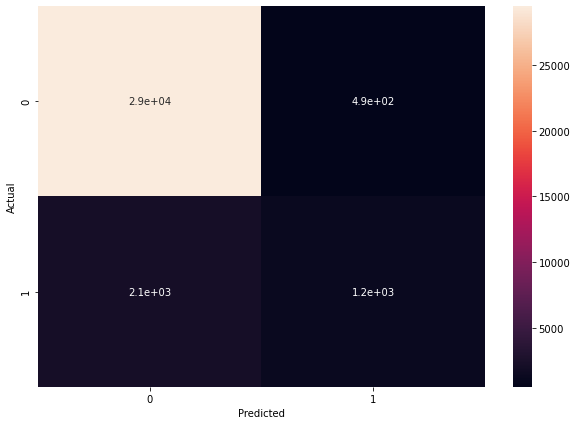


Accuracy     0.920859
TPR          0.359701
FPR          0.016443
Precision    0.709658
Recall       0.359701
F1_Score     0.908970
F2_Score     0.915172
dtype: float64
[[29490   493]
 [ 2145  1205]]



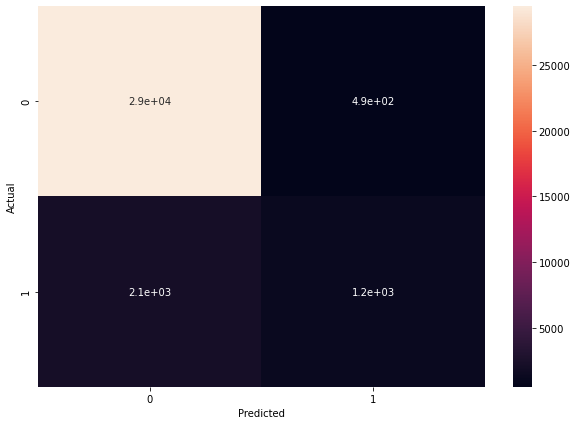


Accuracy     0.920859
TPR          0.359701
FPR          0.016443
Precision    0.709658
Recall       0.359701
F1_Score     0.908970
F2_Score     0.915172
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[29500   483]
 [ 2104  1246]]



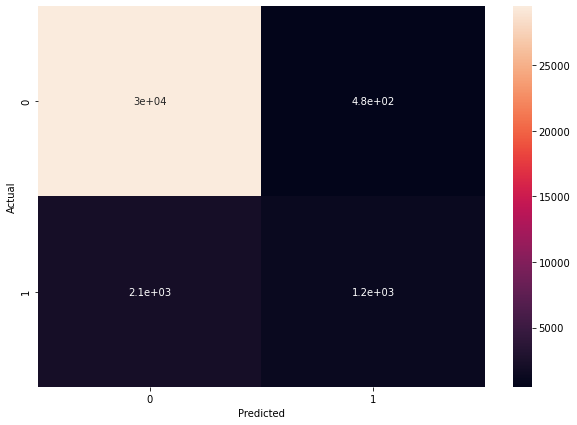


Accuracy     0.922389
TPR          0.371940
FPR          0.016109
Precision    0.720648
Recall       0.371940
F1_Score     0.911026
F2_Score     0.916927
dtype: float64
[[29500   483]
 [ 2104  1246]]



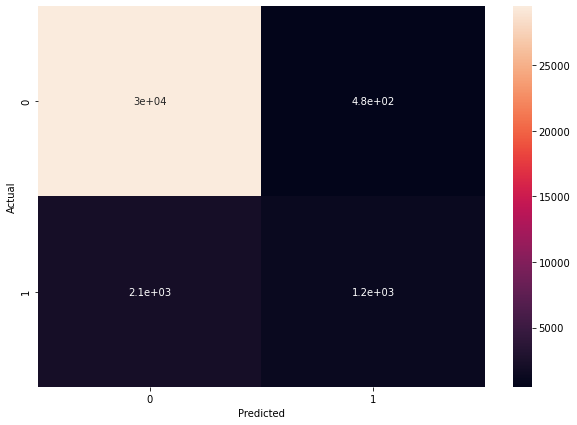


Accuracy     0.922389
TPR          0.371940
FPR          0.016109
Precision    0.720648
Recall       0.371940
F1_Score     0.911026
F2_Score     0.916927
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.67300 


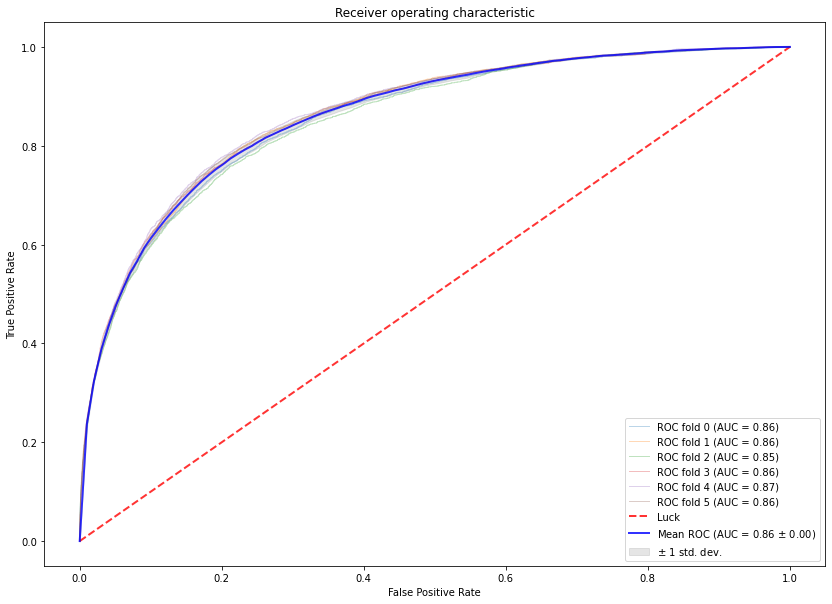

In [69]:
gnb = GaussianNB()
adaclf2 = AdaBoostClassifier(base_estimator=gnb,learning_rate=0.01)
folds = StratifiedKFold(n_splits=6, shuffle=False)

fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_ab2 = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])
  
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        adaclf2.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = adaclf2.predict(X_train.iloc[val_idx])
        probs[val_idx] = adaclf2.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_ab2 += adaclf2.predict_proba(X_test)[:,1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(adaclf,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    
sub_preds = (oof)

plot_roc_curve(fprs, tprs)

sub_preds_test = predictions_ab2
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission9_2.csv', index=False)

In [70]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.922002  0.920082  0.920739  0.922269  0.920859  0.922389   
TPR        0.363881  0.354328  0.350851  0.372051  0.359701  0.371940   
FPR        0.015642  0.016709  0.015608  0.016275  0.016443  0.016109   
Precision  0.722156  0.703199  0.715155  0.718570  0.709658  0.720648   
Recall     0.363881  0.354328  0.350851  0.372051  0.359701  0.371940   
F1_Score   0.910188  0.907977  0.908292  0.910940  0.908970  0.911026   
F2_Score   0.916322  0.914306  0.914775  0.916828  0.915172  0.916927   

               mean  
Accuracy   0.921390  
TPR        0.362126  
FPR        0.016131  
Precision  0.714898  
Recall     0.362126  
F1_Score   0.909565  
F2_Score   0.915722

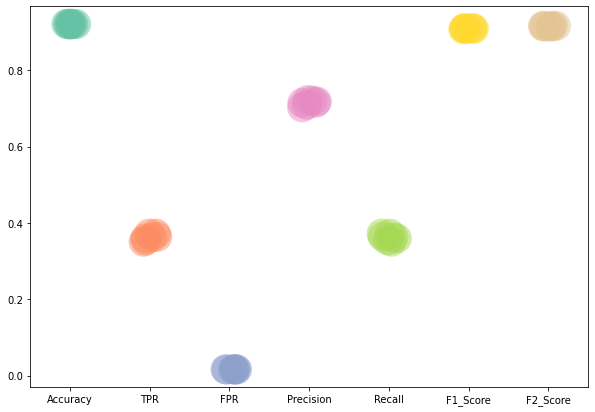

In [71]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [72]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.673


In [6]:
print('Kaggle accuracy =', 0.88883)

Kaggle accuracy = 0.88883


**LGBM**

In [93]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [94]:
from bayes_opt import BayesianOptimization
import lightgbm as lgb
from skopt import BayesSearchCV
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=5, opt_round=10, n_folds=3, random_seed=6,n_estimators=10000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] bagging_fraction is set=0.9895264513703341, subsample=0.4615201756036703 will be ignored. Current value: bagging_fraction=0.9895264513703341
[LightGBM] [Warning] bagging_fraction is set=0.9895264513703341, subsample=0.4615201756036703 will be ignored. Current value: bagging_fraction=0.9895264513703341
[LightGBM] [Warning] bagging_fraction is set=0.9895264513703341, subsample=0.4615201756036703 will be ignored. Current value: bagging_fraction=0.9895264513703341
[LightGBM] [Info] Number of positive: 13399, number of negative: 119934
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.152665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM

[LightGBM] [Info] Total Bins 5400
[LightGBM] [Info] Number of data points in the train set: 133333, number of used features: 200
[LightGBM] [Warning] bagging_fraction is set=0.8192059420307759, subsample=0.4252313651032907 will be ignored. Current value: bagging_fraction=0.8192059420307759
[LightGBM] [Warning] bagging_fraction is set=0.8192059420307759, subsample=0.4252313651032907 will be ignored. Current value: bagging_fraction=0.8192059420307759
[LightGBM] [Warning] bagging_fraction is set=0.8192059420307759, subsample=0.4252313651032907 will be ignored. Current value: bagging_fraction=0.8192059420307759
[LightGBM] [Info] Number of positive: 13398, number of negative: 119935
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5400
[LightGBM] [Info] Number of data points in the train set: 133333, number of used features: 200
[LightGBM] [Warning

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2000
[LightGBM] [Info] Number of data points in the train set: 133333, number of used features: 200
[LightGBM] [Warning] bagging_fraction is set=0.994565837939734, subsample=0.8559475937048635 will be ignored. Current value: bagging_fraction=0.994565837939734
[LightGBM] [Warning] bagging_fraction is set=0.994565837939734, subsample=0.8559475937048635 will be ignored. Current value: bagging_fraction=0.994565837939734
[LightGBM] [Warning] bagging_fraction is set=0.994565837939734, subsample=0.8559475937048635 will be ignored. Current value: bagging_fraction=0.994565837939734
[LightGBM] [Info] Number of positive: 13399, number of negative: 119935
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100493 -> initscore=-2.191762
[LightGBM] [Info] Start training from score -2.191762
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100485 -> initscore=-2.191844
[LightGBM] [Info] Start training from score -2.191844
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100492 -> initscore=-2.191770
[LightGBM] [Info] Start training from score -2.191770
|  7        |  0.8688   |  1.0      |  0.1      |  0.3648   |  88.63    |  18.33    |  50.65    |  35.03    |  24.0     |  1.0      |
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Number of positive: 13398, number of negative: 119935
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.179721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5600
[LightGBM] [Info] Number of data points in the train set: 133333, number of used features: 200
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Number of positive: 13399, numb

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100493 -> initscore=-2.191762
[LightGBM] [Info] Start training from score -2.191762
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100485 -> initscore=-2.191844
[LightGBM] [Info] Start training from score -2.191844
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100492 -> initscore=-2.191770
[LightGBM] [Info] Start training from score -2.191770
|  12       |  0.8034   |  0.9198   |  0.6879   |  0.5861   |  87.56    |  6.208    |  43.03    |  45.1     |  25.64    |  0.7077   |
[LightGBM] [Warning] bagging_fraction is set=0.9197628298371147, subsample=0.7076924857225977 will be ignored. Current value: bagging_fraction=0.9197628298371147
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4400
[LightGBM] [Info] Number of data points in the train set: 133333, number of used features: 200
[LightGBM] [Warning] bagging_fraction is set=0.9965917409919468, subsample=0.7588156878060435 will be ignored. Current value: bagging_fraction=0.9965917409919468
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_fraction is set=0.9965917409919468, subsample=0.7588156878060435 will be ignored. Current value: bagging_fraction=0.9965917409919468
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_fraction is set=0.9965917409919468, subsample=0.7588156878060435 will be ignored. Current val

In [95]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 1.0,
 'feature_fraction': 0.1,
 'learning_rate': 0.36481118517220046,
 'max_bin': 89,
 'max_depth': 18,
 'min_data_in_leaf': 51,
 'min_sum_hessian_in_leaf': 35.02849015383992,
 'num_leaves': 24,
 'subsample': 1.0,
 'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'boost_from_average': False}

In [23]:
import lightgbm as lgb
param1={'bagging_fraction': 1.0,
 'feature_fraction': 0.1,
 'learning_rate': 0.36481118517220046,
 'max_bin': 89,
 'max_depth': 18,
 'min_data_in_leaf': 51,
 'min_sum_hessian_in_leaf': 35.02849015383992,
 'num_leaves': 24,
 'subsample': 1.0,
 'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
        'verbosity': -1,
 'boost_from_average': False
        
      }

var_0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.54311 
var_1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.54167 
var_2
[LightGB

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.50860 
var_17
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.50046 
var_18
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.53429 
var_34
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.54123 
var_35
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.51172 
var_51
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.51907 
var_52
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [

CV score: 0.51639 
var_67
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.53548 
var_68
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.51395 
var_84
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.50704 
var_85
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.49975 
var_101
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.50413 
var_102
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM]

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.50556 
var_118
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.53301 
var_119
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM]

CV score: 0.54291 
var_134
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.50921 
var_135
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.52106 
var_151
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.51425 
var_152
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM]

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.52225 
var_168
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.51276 
var_169
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM]

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.54164 
var_185
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
CV score: 0.49585 
var_186
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM]

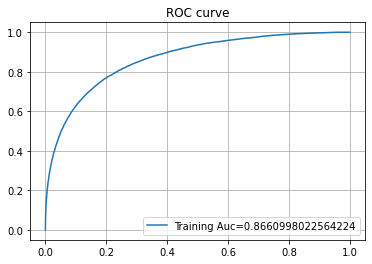

Your CV score is 0.8660998022564224


In [24]:
folds = StratifiedKFold(n_splits=4, shuffle=False)

y_hat = np.zeros([200000, 200])
test_hat = np.zeros([200000, 200])
# Looping over features
i=0
for feature in ['var_' + str(x) for x in range(200)]: # loop over all features
    print(feature)
    feat_choices = [feature]
    oof = np.zeros(len(train))
    predictions = np.zeros(len(test))
    
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train[feat_choices].values, target.values)):
        trn_data = lgb.Dataset(train.iloc[trn_idx][feat_choices], label=target.iloc[trn_idx])
        val_data = lgb.Dataset(train.iloc[val_idx][feat_choices], label=target.iloc[val_idx])
        clf = lgb.train(param1, trn_data, 126, valid_sets = [trn_data, val_data], verbose_eval=-1)
        oof[val_idx] = clf.predict(train.iloc[val_idx][feat_choices], num_iteration=clf.best_iteration)
        predictions += clf.predict(test[feat_choices], num_iteration=clf.best_iteration) / folds.n_splits
        
    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))
    
    y_hat[:, i] = oof
    test_hat[:, i] = predictions
    i += 1
    
sub_preds = (y_hat).sum(axis=1)/200
fpr,tpr,thresholds=roc_curve(target,sub_preds)
plt.plot(fpr,tpr, label='Training Auc='+str(auc(fpr,tpr)))
plt.legend()
plt.ylabel('')
plt.xlabel('')
plt.title('ROC curve')
plt.grid()
plt.show()
print('Your CV score is', roc_auc_score(target, sub_preds))


sub_preds_test = (test_hat).sum(axis=1)/200
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission11.csv', index=False)

[[155218  24684]
 [  6196  13902]]



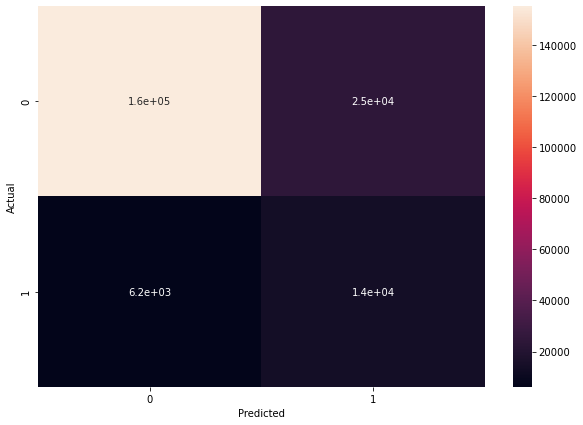


Accuracy     0.845600
TPR          0.691711
FPR          0.137208
Precision    0.360286
Recall       0.691711
F1_Score     0.865740
F2_Score     0.851085
dtype: float64


Accuracy     0.845600
TPR          0.691711
FPR          0.137208
Precision    0.360286
Recall       0.691711
F1_Score     0.865740
F2_Score     0.851085
dtype: float64

In [25]:
comp_metrics(np.round(sub_preds), y_train)

In [38]:
# before baysian optimaization
import lightgbm as lgb
param2 = {'bagging_fraction': 0.5166,
   'bagging_freq': 3,
   'lambda_l1': 3.968,
   'lambda_l2': 1.263,
   'learning_rate': 0.00141,
   'max_depth': 3,
   'min_data_in_leaf': 17,
   'min_gain_to_split': 0.2525,
   'min_sum_hessian_in_leaf': 19.55,
   'num_leaves': 20,
   'feature_fraction': 1,
   'save_binary': True,
   'seed': 2319,
   'feature_fraction_seed': 2319,
   'bagging_seed': 2319,
   'drop_seed': 2319,
   'data_random_seed': 2319,
   'objective': 'binary',
   'boosting_type': 'gbdt',
   'verbosity': -1,
   'metric': 'auc',
   'is_unbalance': True,
   'boost_from_average': 'false',
   'num_threads': 6}

var_0
CV score: 0.54108 
var_1
CV score: 0.54301 
var_2
CV score: 0.54817 
var_3
CV score: 0.50881 
var_4
CV score: 0.50626 
var_5
CV score: 0.52420 
var_6
CV score: 0.55655 
var_7
CV score: 0.49944 
var_8
CV score: 0.51551 
var_9
CV score: 0.54026 
var_10
CV score: 0.49956 
var_11
CV score: 0.51801 
var_12
CV score: 0.55867 
var_13
CV score: 0.55005 
var_14
CV score: 0.50425 
var_15
CV score: 0.51318 
var_16
CV score: 0.50718 
var_17
CV score: 0.49647 
var_18
CV score: 0.53635 
var_19
CV score: 0.50923 
var_20
CV score: 0.51685 
var_21
CV score: 0.55082 
var_22
CV score: 0.55025 
var_23
CV score: 0.52224 
var_24
CV score: 0.52625 
var_25
CV score: 0.50718 
var_26
CV score: 0.55012 
var_27
CV score: 0.49856 
var_28
CV score: 0.52084 
var_29
CV score: 0.49869 
var_30
CV score: 0.49756 
var_31
CV score: 0.52388 
var_32
CV score: 0.52605 
var_33
CV score: 0.53827 
var_34
CV score: 0.54515 
var_35
CV score: 0.53222 
var_36
CV score: 0.53485 
var_37
CV score: 0.50318 
var_38
CV score: 0.501

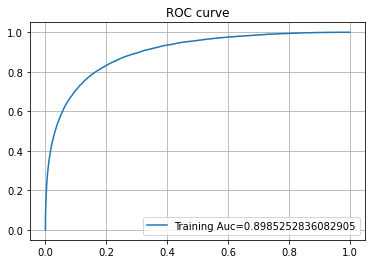

Your CV score is 0.8985252836082905


In [40]:
folds = StratifiedKFold(n_splits=6, shuffle=False)

predictions_lgbm = np.zeros([200000, 200])
test_hat = np.zeros([200000, 200])
# Looping over features
i=0
for feature in ['var_' + str(x) for x in range(200)]: # loop over all features
    print(feature)
    feat_choices = [feature]
    oof = np.zeros(len(train))
    predictions = np.zeros(len(test))
    
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train[feat_choices].values, target.values)):
        trn_data = lgb.Dataset(train.iloc[trn_idx][feat_choices], label=target.iloc[trn_idx])
        val_data = lgb.Dataset(train.iloc[val_idx][feat_choices], label=target.iloc[val_idx])
        clf = lgb.train(param2, trn_data, 126, valid_sets = [trn_data, val_data], verbose_eval=-1)
        oof[val_idx] = clf.predict(train.iloc[val_idx][feat_choices], num_iteration=clf.best_iteration)
        predictions += clf.predict(test[feat_choices], num_iteration=clf.best_iteration) / folds.n_splits
        
    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))
    predictions_lgbm[:, i] = oof
    test_hat[:, i] = predictions
    i += 1
    
sub_preds = (predictions_lgbm).sum(axis=1)/200
fpr,tpr,thresholds=roc_curve(target,sub_preds)
plt.plot(fpr,tpr, label='Training Auc='+str(auc(fpr,tpr)))
plt.legend()
plt.ylabel('')
plt.xlabel('')
plt.title('ROC curve')
plt.grid()
plt.show()
print('Your CV score is', roc_auc_score(target, sub_preds))


sub_preds_test = (test_hat).sum(axis=1)/200
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission11.csv', index=False)    

In [ ]:
comp_metrics(sub_preds,y_train)

In [7]:
print('Kaggle accuracy =', 0.89914)

Kaggle accuracy = 0.89914


**Ensemble voting**

In [74]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

Fold number 1

[[29815   169]
 [ 2621   729]]



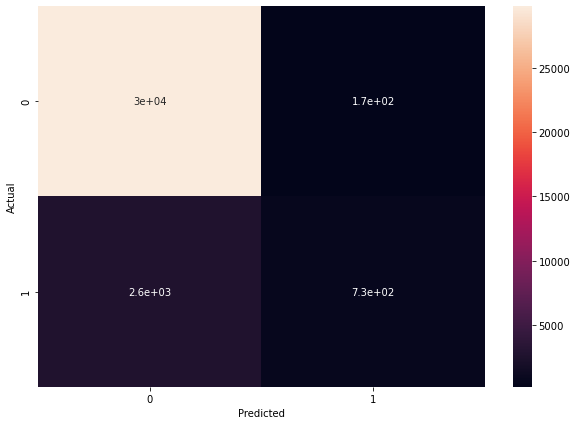


Accuracy     0.916302
TPR          0.217612
FPR          0.005636
Precision    0.811804
Recall       0.217612
F1_Score     0.893790
F2_Score     0.905659
dtype: float64
[[29815   169]
 [ 2621   729]]



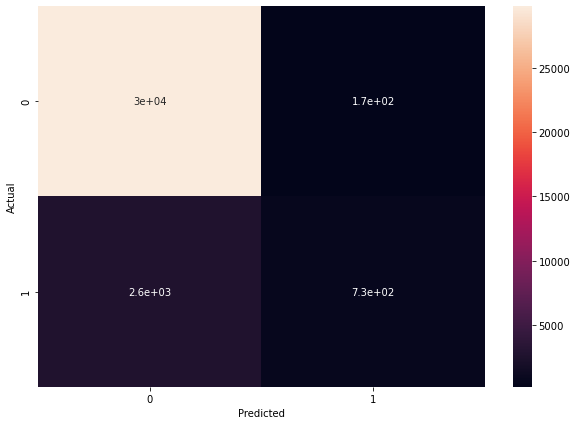


Accuracy     0.916302
TPR          0.217612
FPR          0.005636
Precision    0.811804
Recall       0.217612
F1_Score     0.893790
F2_Score     0.905659
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 2

[[29821   163]
 [ 2660   690]]



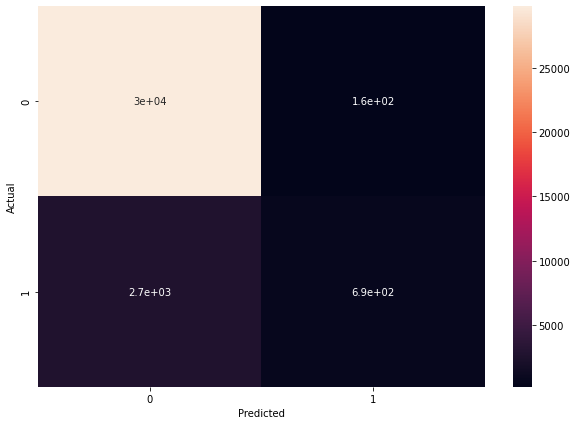


Accuracy     0.915312
TPR          0.205970
FPR          0.005436
Precision    0.808910
Recall       0.205970
F1_Score     0.891848
F2_Score     0.904282
dtype: float64
[[29821   163]
 [ 2660   690]]



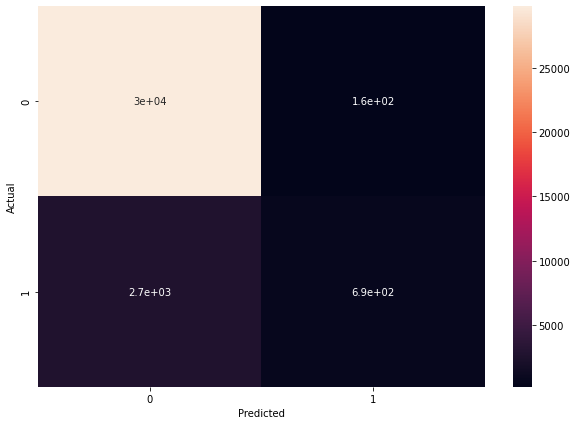


Accuracy     0.915312
TPR          0.205970
FPR          0.005436
Precision    0.808910
Recall       0.205970
F1_Score     0.891848
F2_Score     0.904282
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 3

[[29840   144]
 [ 2654   695]]



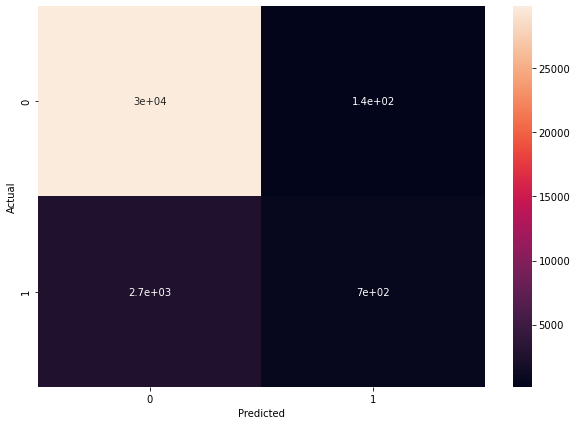


Accuracy     0.916059
TPR          0.207525
FPR          0.004803
Precision    0.828367
Recall       0.207525
F1_Score     0.892591
F2_Score     0.904995
dtype: float64
[[29840   144]
 [ 2654   695]]



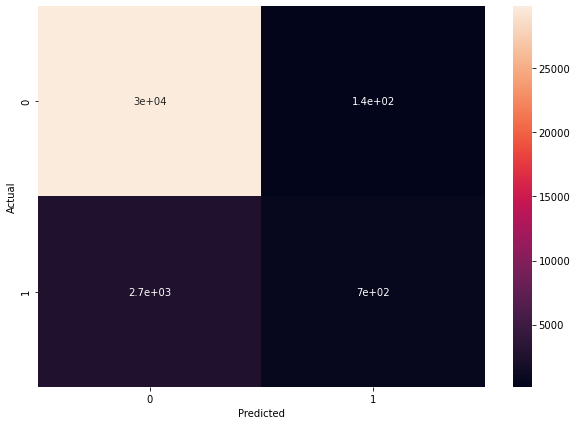


Accuracy     0.916059
TPR          0.207525
FPR          0.004803
Precision    0.828367
Recall       0.207525
F1_Score     0.892591
F2_Score     0.904995
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 4

[[29837   147]
 [ 2613   736]]



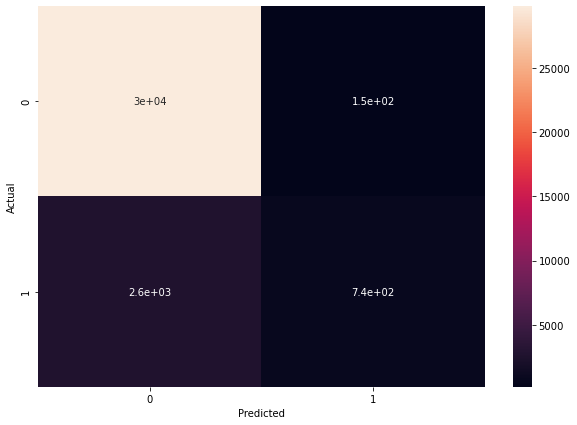


Accuracy     0.917199
TPR          0.219767
FPR          0.004903
Precision    0.833522
Recall       0.219767
F1_Score     0.894710
F2_Score     0.906527
dtype: float64
[[29837   147]
 [ 2613   736]]



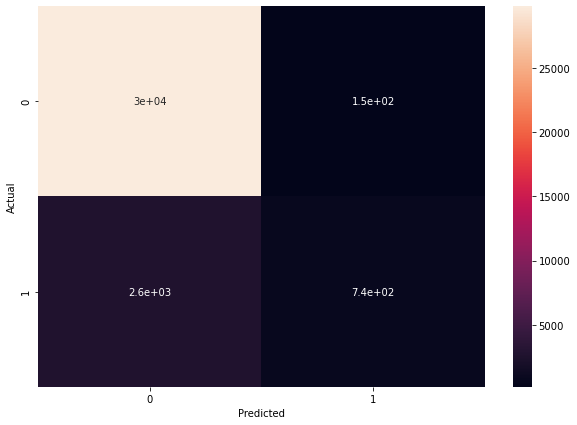


Accuracy     0.917199
TPR          0.219767
FPR          0.004903
Precision    0.833522
Recall       0.219767
F1_Score     0.894710
F2_Score     0.906527
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 5

[[29834   149]
 [ 2654   696]]



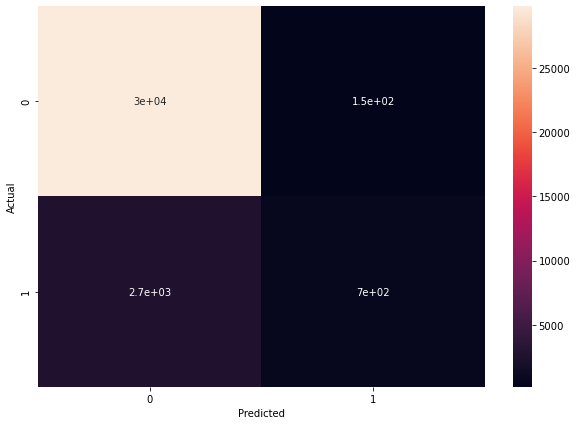


Accuracy     0.915909
TPR          0.207761
FPR          0.004969
Precision    0.823669
Recall       0.207761
F1_Score     0.892488
F2_Score     0.904871
dtype: float64
[[29834   149]
 [ 2654   696]]



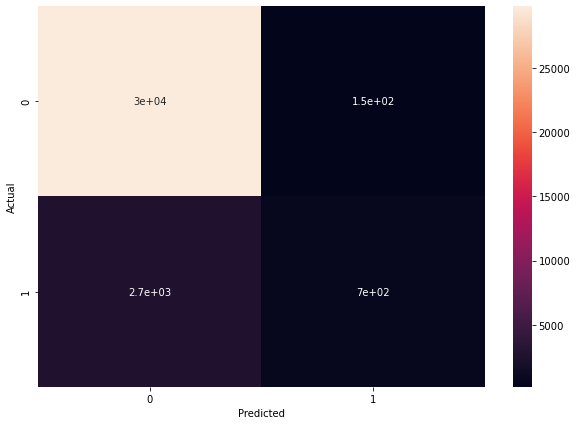


Accuracy     0.915909
TPR          0.207761
FPR          0.004969
Precision    0.823669
Recall       0.207761
F1_Score     0.892488
F2_Score     0.904871
dtype: float64
------------------------------------------------------------------------------------------------------



Fold number 6

[[29855   128]
 [ 2624   726]]



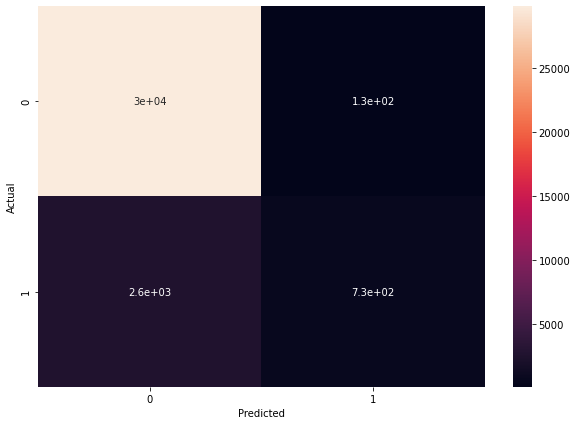


Accuracy     0.917439
TPR          0.216716
FPR          0.004269
Precision    0.850117
Recall       0.216716
F1_Score     0.894580
F2_Score     0.906585
dtype: float64
[[29855   128]
 [ 2624   726]]



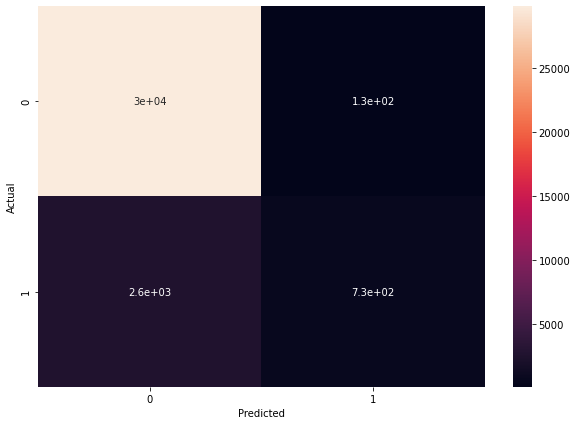


Accuracy     0.917439
TPR          0.216716
FPR          0.004269
Precision    0.850117
Recall       0.216716
F1_Score     0.894580
F2_Score     0.906585
dtype: float64
------------------------------------------------------------------------------------------------------



CV score: 0.60378 


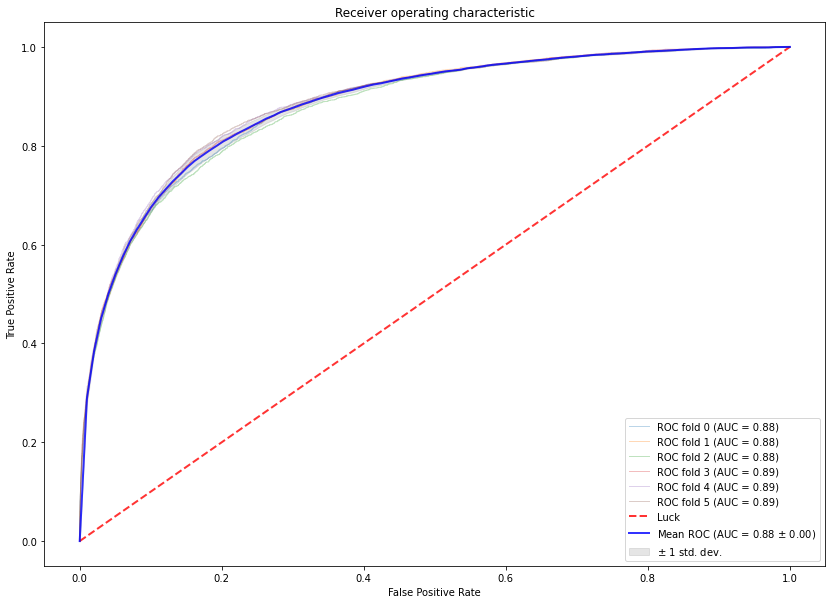

In [75]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

folds = StratifiedKFold(n_splits=6, shuffle=False)

fprs, tprs, scores = [], [], []
auc_score = []
precision = []
oof = np.zeros(len(train))
probs = np.zeros(len(train))
predictions_vc = np.zeros(len(test))
comp_metrics_df = pd.DataFrame(columns=['fold1'])

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        print('Fold number {}'.format(fold_ + 1))
        eclf1.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        oof[val_idx] = eclf1.predict(X_train.iloc[val_idx])
        probs[val_idx] = eclf1.predict_proba(X_train.iloc[val_idx])[:, 1]
        predictions_vc += eclf1.predict_proba(X_test)[:,1] / folds.n_splits
        fpr, tpr, auc_score = compute_roc_auc(eclf1,val_idx)
        fprs.append(fpr)
        tprs.append(tpr)
        print()
        comp_metrics(oof[val_idx], y_train[val_idx])
        comp_metrics_df['fold{}'.format(fold_ + 1)] = comp_metrics(oof[val_idx], y_train[val_idx])
        print('------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))
    

sub_preds = (oof)

plot_roc_curve(fprs, tprs)

sub_preds_test = predictions_vc
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = sub_preds_test
sub.to_csv('submission12.csv', index=False)

In [76]:
# average metrics values
comp_metrics_df['mean'] = comp_metrics_df.mean(axis=1)
comp_metrics_df

fold1     fold2     fold3     fold4     fold5     fold6  \
Accuracy   0.916302  0.915312  0.916059  0.917199  0.915909  0.917439   
TPR        0.217612  0.205970  0.207525  0.219767  0.207761  0.216716   
FPR        0.005636  0.005436  0.004803  0.004903  0.004969  0.004269   
Precision  0.811804  0.808910  0.828367  0.833522  0.823669  0.850117   
Recall     0.217612  0.205970  0.207525  0.219767  0.207761  0.216716   
F1_Score   0.893790  0.891848  0.892591  0.894710  0.892488  0.894580   
F2_Score   0.905659  0.904282  0.904995  0.906527  0.904871  0.906585   

               mean  
Accuracy   0.916370  
TPR        0.212559  
FPR        0.005003  
Precision  0.826065  
Recall     0.212559  
F1_Score   0.893334  
F2_Score   0.905486

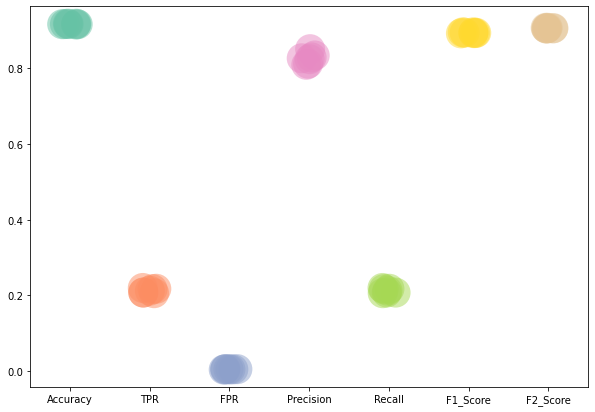

In [77]:
# Strip plot for the fold metrics
plt.figure(figsize=(10,7))
sns.stripplot(data=comp_metrics_df.T, size=30, alpha=0.5, palette="Set2")
plt.show()

In [78]:
# training accuracy and Kaggle accuracy
print('Training accuracy =' ,np.round(roc_auc_score(y_train, sub_preds), 5))

Training accuracy = 0.60378


In [8]:
print('Kaggle accuracy =', 0.88695)

Kaggle accuracy = 0.88695
